In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
from sklearn import preprocessing as s_prep

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
sns.set_style('darkgrid')

In [4]:
from project_methods import MSc_Proj as proj

In [5]:
# file_loc = proj.show_saved_csv()
# display(file_loc)

In [6]:
data_dir = os.getcwd() #[str(k) for k, v in file_loc.items()][0]
data_dir

'W:\\MSc-AIDS-UoH\\Trimester_3\\Submit'

## OVERALL OBSERVATIONS in enroll.csv

In [7]:
fname = '\\enr_part_prof.csv'
main_df = pd.read_csv(data_dir+fname)
display(main_df.info(), main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55026 entries, 0 to 55025
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subjid                       55026 non-null  object 
 1   ccdep                        55026 non-null  int64  
 2   ccdepage                     55026 non-null  float64
 3   cccog                        55026 non-null  int64  
 4   cccogage                     55026 non-null  float64
 5   ccapt                        55026 non-null  int64  
 6   ccaptage                     55026 non-null  float64
 7   ccmtr                        55026 non-null  int64  
 8   ccmtrage                     55026 non-null  float64
 9   weight                       55026 non-null  float64
 10  height                       55026 non-null  float64
 11  bmi                          55026 non-null  float64
 12  seq                          55026 non-null  int64  
 13  visdy           

None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0      R000024542      0       0.0      0       0.0      0       0.0      1   
1      R000024542      0       0.0      0       0.0      0       0.0      1   
2      R000024542      0       0.0      0       0.0      0       0.0      1   
3      R000024542      0       0.0      0       0.0      0       0.0      1   
4      R000024542      0       0.0      0       0.0      0       0.0      1   
...           ...    ...       ...    ...       ...    ...       ...    ...   
55021  R999989129      1      38.0      1      40.0      1      38.0      1   
55022  R999993234      1      48.0      0       0.0      1      50.0      0   
55023  R999993234      1      48.0      0       0.0      1      50.0      0   
55024  R999993234      1      48.0      0       0.0      1      50.0      0   
55025  R999993234      1      48.0      0       0.0      1      50.0      0   

       ccmtrage  weight  height   bmi  seq  visdy  age  chorea_score  \
0          42.0    67.9   185.4  19.8    1      0   48            11   
1          42.0    67.2   185.0  19.6    2    371   49            10   
2          42.0    65.4   185.0  19.1    3    734   50            21   
3          42.0    63.8   185.0  18.6    4   1098   51            18   
4          42.0    62.5   185.0  18.3    5   1469   52            17   
...         ...     ...     ...   ...  ...    ...  ...           ...   
55021      34.0    73.0   180.0  22.5    1      0   44            11   
55022       0.0    57.0   168.0  20.2    1      0   47             0   
55023       0.0    57.3   167.6  20.4    2    380   48             1   
55024       0.0    57.0   167.0  20.4    3    777   49             2   
55025       0.0    60.0   167.0  21.5    4   1158   50             0   

       motscore  miscore  indepscl  fiscore  fascore  tfcscore  feedself  \
0            28       28        95       24       24        11         1   
1            32       32        80       22       22        11         1   
2            45       45        75       20       20        11         1   
3            45       45        65       12       12         8         1   
4            47       47        70       15       15         6         1   
...         ...      ...       ...      ...      ...       ...       ...   
55021        32       32        80       20       20         9         1   
55022         0        0       100       25       25        13         1   
55023         1        1       100       25       25        13         1   
55024         2        2       100       25       25        13         1   
55025         0        0       100       25       25        13         1   

       study_timeyr       bmi_level  bmi_outcome  bmi_diff  bmi_change  \
0               5.2       1. normal            0      -2.3        -1.0   
1               5.2       1. normal            0      -2.3        -1.0   
2               5.2       1. normal            0      -2.3        -1.0   
3               5.2       1. normal            0      -2.3        -1.0   
4               5.2  0. underweight           -1      -2.3        -1.0   
...             ...             ...          ...       ...         ...   
55021           0.0       1. normal            0    -999.0      -999.0   
55022           3.2       1. normal            0       1.3         1.0   
55023           3.2       1. normal            0       1.3         1.0   
55024           3.2       1. normal            0       1.3         1.0   
55025           3.2       1. normal            0       1.3         1.0   

       bmi_diff_class   bmi_diff_band  age_bucket  baseline_age_above29  \
0                  27  [-3.0 to -2.0)  2. 40 - 49                     1   
1                  27  [-3.0 to -2.0)  2. 40 - 49                     1   
2                  27  [-3.0 to -2.0)  3. 50 - 59                     1   
3                  27  [-3.0 to -2.0)  3. 50 - 59                     1   
4                  2

In [8]:
cond = (main_df['visitnum'] >= 6)
vis6_main_df = main_df.loc[cond].reset_index(drop=True)
display(vis6_main_df)

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R000024542      0       0.0      0       0.0      0       0.0      1   
2     R000024542      0       0.0      0       0.0      0       0.0      1   
3     R000024542      0       0.0      0       0.0      0       0.0      1   
4     R000024542      0       0.0      0       0.0      0       0.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
8267  R99871078X      0       0.0      0       0.0      0       0.0      0   
8268  R99871078X      0       0.0      0       0.0      0       0.0      0   
8269  R99871078X      0       0.0      0       0.0      0       0.0      0   
8270  R99871078X      0       0.0      0       0.0      0       0.0      0   
8271  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  weight  height   bmi  seq  visdy  age  chorea_score  motscore  \
0         42.0    67.9   185.4  19.8    1      0   48            11        28   
1         42.0    67.2   185.0  19.6    2    371   49            10        32   
2         42.0    65.4   185.0  19.1    3    734   50            21        45   
3         42.0    63.8   185.0  18.6    4   1098   51            18        45   
4         42.0    62.5   185.0  18.3    5   1469   52            17        47   
...        ...     ...     ...   ...  ...    ...  ...           ...       ...   
8267       0.0    65.0   174.0  21.5    2    288   19             0         0   
8268       0.0    63.0   174.0  20.8    3    721   20             0         0   
8269       0.0    65.0   174.0  21.5    4   1057   21             0         0   
8270       0.0    69.0   174.0  22.8    5   1458   22             0         0   
8271       0.0    72.0   174.0  23.8    6   1879   23             0         0   

      miscore  indepscl  fiscore  fascore  tfcscore  feedself  study_timeyr  \
0          28        95       24       24        11         1           5.2   
1          32        80       22       22        11         1           5.2   
2          45        75       20       20        11         1           5.2   
3          45        65       12       12         8         1           5.2   
4          47        70       15       15         6         1           5.2   
...       ...       ...      ...      ...       ...       ...           ...   
8267        0       100       25       25        13         1           5.1   
8268        0       100       25       25        13         1           5.1   
8269        0       100       25       25        13         1           5.1   
8270        0       100       25       25        13         1           5.1   
8271        0       100       25       25        13         1           5.1   

           bmi_level  bmi_outcome  bmi_diff  bmi_change  bmi_diff_class  \
0          1. normal            0      -2.3        -1.0              27   
1          1. normal            0      -2.3        -1.0              27   
2          1. normal            0      -2.3        -1.0              27   
3          1. normal            0      -2.3        -1.0              27   
4     0. underweight           -1      -2.3        -1.0              27   
...              ...          ...       ...         ...             ...   
8267       1. normal            0       1.3         1.0              31   
8268       1. normal            0       1.3         1.0              31   
8269       1. normal            0       1.3         1.0              31   
8270       1. normal            0       1.3         1.0              31   
8271       1. normal            0       1.3         1.0              31   

       bmi_diff_band  age_bucket  baseline_age_above29  independent_feeding  \
0     [-3.0 to -2.0)  2. 40 - 49                     1                    1   
1     [-3.0 to -2.0)  2. 40 - 49                     1                    1   
2     [-3.0 t

In [9]:
fname = '\\enrl_per_vis.csv'
all_vis = pd.read_csv(data_dir+fname)
display(all_vis.info(), all_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20620 entries, 0 to 20619
Columns: 306 entries, subjid to hd_status_vis_14
dtypes: float64(245), int64(16), object(45)
memory usage: 48.1+ MB


C:\Users\welcome\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (214,215,216,217,218,219,220,221,242,243,244,245,246,247,248,249,298,299,300,301,302,303,304,305) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0      R000024542      0       0.0      0       0.0      0       0.0      1   
1      R00010372X      1      59.0      1      63.0      0       0.0      1   
2      R000147438      1      33.0      0       0.0      1      80.0      1   
3      R00021725X      0       0.0      0       0.0      0       0.0      0   
4      R00023946X      0       0.0      0       0.0      1      75.0      1   
...           ...    ...       ...    ...       ...    ...       ...    ...   
20615  R999841810      1      51.0      0       0.0      1      51.0      1   
20616  R999891140      1      62.0      0       0.0      1      62.0      1   
20617  R99990772X      1      47.0      0       0.0      0       0.0      1   
20618  R999989129      1      38.0      1      40.0      1      38.0      1   
20619  R999993234      1      48.0      0       0.0      1      50.0      0   

       ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0          42.0           5.2      -2.3        -1.0              27   
1          61.0           5.0      -3.6        -1.0              26   
2          76.0           0.0    -999.0      -999.0              30   
3           0.0           3.7       1.2         1.0              31   
4          65.0           3.9      -0.3        -1.0              29   
...         ...           ...       ...         ...             ...   
20615      40.0           1.1       3.5         1.0              33   
20616      59.0           0.0    -999.0      -999.0              30   
20617      67.0           3.9      -0.9        -1.0              29   
20618      34.0           0.0    -999.0      -999.0              30   
20619       0.0           3.2       1.3         1.0              31   

        bmi_diff_band  baseline_age_above29  visitnum       hd_status0  \
0      [-3.0 to -2.0)                     1         6      3. manifest   
1      [-4.0 to -3.0)                     1         6      3. manifest   
2        [0.0 to 1.0)                     1         1      3. manifest   
3        [1.0 to 2.0)                     1         3  2. pre-manifest   
4       [-1.0 to 0.0)                     1         5      3. manifest   
...               ...                   ...       ...              ...   
20615    [3.0 to 4.0)                     1         2      3. manifest   
20616    [0.0 to 1.0)                     1         1      3. manifest   
20617   [-1.0 to 0.0)                     1         5      3. manifest   
20618    [0.0 to 1.0)                     1         1      3. manifest   
20619    [1.0 to 2.0)                     1         4  2. pre-manifest   

       baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                         1                0               1   
1                         1                0               1   
2                         1                0               0   
3                         0                0               0   
4                         1                0               0   
...                     ...              ...             ...   
20615                     1                0               1   
20616                     1                0               0   
20617                     1                0               1   
20618                     1                0               1   
20619                     0                0               0   

       tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
0                      1                            0               0   
1                      0                            0               0   
2                      0                            0               1   
3                      0                            0               0   
4                      0                            0               1   
...                  ...                          ...             ...   
20615                  0                

In [10]:
fname = '\\only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Columns: 152 entries, subjid to hd_status_gen
dtypes: float64(105), int64(23), object(24)
memory usage: 1.5+ MB


None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

In [11]:
first6_vis

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

In [12]:
# include only baseline and last visit variables
first6_vis = proj.get_baseline_last_vis(first6_vis)
display(proj.null_checker(first6_vis, only_nulls=True))
display(proj.get_columns_with_pattern(first6_vis, 'vis_'), first6_vis)

# drop pps with missing variables
first6_vis = first6_vis.dropna().reset_index(drop=True)
display(first6_vis)

Series([], dtype: int64)

age_vis_1  age_vis_6 age_bucket_vis_1 age_bucket_vis_6  \
0            48         53       2. 40 - 49       3. 50 - 59   
1            64         69       4. 60 - 69       4. 60 - 69   
2            51         56       3. 50 - 59       3. 50 - 59   
3            48         53       2. 40 - 49       3. 50 - 59   
4            43         48       2. 40 - 49       2. 40 - 49   
...         ...        ...              ...              ...   
1308         64         69       4. 60 - 69       4. 60 - 69   
1309         72         77           5. >69           5. >69   
1310         57         62       3. 50 - 59       4. 60 - 69   
1311         46         51       2. 40 - 49       3. 50 - 59   
1312         18         23           0. <30           0. <30   

      behaviour_score_vis_1  behaviour_score_vis_6  bmi_vis_1  bmi_vis_6  \
0                      25.0                    1.0       19.8       17.5   
1                       2.0                    0.0       28.1       24.5   
2                       0.0                   18.0       20.8       24.3   
3                      27.0                    2.0       19.6       23.1   
4                      10.0                    6.0       36.7       23.7   
...                     ...                    ...        ...        ...   
1308                    4.0                    9.0       22.9       23.0   
1309                    0.0                    2.0       27.9       23.2   
1310                   21.0                   60.0       27.0       28.6   
1311                    0.0                    0.0       19.5       20.8   
1312                    0.0                    1.0       22.5       23.8   

     bmi_level_vis_1 bmi_level_vis_6  bmi_outcome_vis_1  bmi_outcome_vis_6  \
0          1. normal  0. underweight                0.0               -1.0   
1      2. overweight       1. normal                1.0                0.0   
2          1. normal       1. normal                0.0                0.0   
3          1. normal       1. normal                0.0                0.0   
4           3. obese       1. normal                1.0                0.0   
...              ...             ...                ...                ...   
1308       1. normal       1. normal                0.0                0.0   
1309   2. overweight       1. normal                1.0                0.0   
1310   2. overweight   2. overweight                1.0                1.0   
1311       1. normal       1. normal                0.0                0.0   
1312       1. normal       1. normal                0.0                0.0   

      chorea_score_vis_1  chorea_score_vis_6  cognitive_score_vis_1  \
0                   11.0                28.0                  120.0   
1                    8.0                 7.0                  178.0   
2                   22.0                22.0                    0.0   
3                    3.0                 4.0                  264.0   
4                    5.0                 4.0                  108.0   
...                  ...                 ...                    ...   
1308                 5.0                 4.0                  257.0   
1309                 0.0                 0.0                  248.0   
1310                 0.0                 2.0                  231.0   
1311                 0.0                 0.0                  218.0   
1312                 0.0                 0.0                  243.0   

      cognitive_score_vis_6  fascore_vis_1  fascore_vis_6  feedself_vis_1  \
0                      35.0           24.0            7.0             1.0   
1                     149.0           25.0           20.0             1.0   
2                       0.0            3.0            0.0             0.0   
3                     264.0           23.0           20.0             1.0   
4                      36.0           19.0            1.0             1.0   
...                     ...            ...            ...             ..

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

### Descriptive Statistics

In [13]:
proj.cagrepeat_band_cmap

{'0. normal': 'green',
 '1. intermediate': 'yellow',
 '2. reduced penetrance': 'gray',
 '3. full penetrance': 'red'}

In [14]:
# ctrl
ctl = ((first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls'])) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mctl = ((first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls'])) &
        (first6_vis['is_male'] == 1) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fctl = ((first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls'])) &
        (first6_vis['is_male'] == 0) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))      

ctrl = first6_vis.loc[ctl].reset_index(drop=True)
male_ctrl = first6_vis.loc[mctl]
female_ctrl = first6_vis.loc[fctl]

# reduced and full penetrance
nl = ((first6_vis['caghigh_band'] == '0. normal') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

inm = ((first6_vis['caghigh_band'] == '1. intermediate') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

nml = first6_vis.loc[nl].reset_index(drop=True)
itmt = first6_vis.loc[inm].reset_index(drop=True)

display(ctrl, len(male_ctrl), len(female_ctrl), len(nml), len(itmt))

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R002995975      1       0.0      0       0.0      0       0.0      1   
1    R013633600      0       0.0      0       0.0      0       0.0      0   
2    R021820966      1       0.0      0       0.0      0       0.0      1   
3    R02679911X      0       0.0      0       0.0      0       0.0      0   
4    R026933811      0       0.0      0       0.0      0       0.0      0   
..          ...    ...       ...    ...       ...    ...       ...    ...   
315  R98296028X      1       0.0      0       0.0      0       0.0      1   
316  R983486749      1       0.0      0       0.0      0       0.0      1   
317  R984684709      1      58.0      0       0.0      0       0.0      0   
318  R985917130      1      25.0      0       0.0      0       0.0      0   
319  R995458444      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         0.0           6.2       1.9         1.0              31   
1         0.0           5.1       1.9         1.0              31   
2         0.0           7.1       2.0         1.0              32   
3         0.0           6.2     -22.1        -1.0               7   
4         0.0           5.0       1.7         1.0              31   
..        ...           ...       ...         ...             ...   
315       0.0           5.9       1.2         1.0              31   
316       0.0           5.0       1.6         1.0              31   
317       0.0           5.2       1.8         1.0              31   
318       0.0           5.9       3.7         1.0              33   
319       0.0           4.9      -4.7        -1.0              25   

        bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0        [1.0 to 2.0)                     1         6  5. family controls   
1        [1.0 to 2.0)                     1         6     4. genotype -ve   
2        [2.0 to 3.0)                     1         8  5. family controls   
3    [-23.0 to -22.0)                     1         7     4. genotype -ve   
4        [1.0 to 2.0)                     1         6     4. genotype -ve   
..                ...                   ...       ...                 ...   
315      [1.0 to 2.0)                     1         7  5. family controls   
316      [1.0 to 2.0)                     1         6  5. family controls   
317      [1.0 to 2.0)                     1         6     4. genotype -ve   
318      [3.0 to 4.0)                     1         6     4. genotype -ve   
319    [-5.0 to -4.0)                     1         6  5. family controls   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       0                0               0                  0   
1                       0                0               0                  0   
2                       0                0               0                  0   
3                       0                0               0                  0   
4                       0                0               0                  0   
..                    ...              ...             ...                ...   
315                     0                0               0                  0   
316                     0                0               0                  0   
317                     0                0               0                  0   
318                     0                0               0                  0   
319                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          18   
1                              0               0        1          17   
2                              0               1        1          15   
3                              0               0        0        

115

205

303

17

In [15]:
# genotype -ve
geno = ((first6_vis['hd_status0'].isin(['4. genotype -ve'])) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mgeno = ((first6_vis['hd_status0'].isin(['4. genotype -ve'])) &
        (first6_vis['is_male'] == 1) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fgeno = ((first6_vis['hd_status0'].isin(['4. genotype -ve'])) &
        (first6_vis['is_male'] == 0) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

geno = first6_vis.loc[geno].reset_index(drop=True)
male_geno = first6_vis.loc[mgeno]
female_geno = first6_vis.loc[fgeno]

# cag
nl = ((geno['caghigh_band'] == '0. normal') &
       (geno['baseline_age_above29'] == 1) &
      (geno['is_high_calorie'] == 0) &
      (geno['received_swallowing_therapy'] == 0))

inm = ((geno['caghigh_band'] == '1. intermediate') &
       (geno['baseline_age_above29'] == 1) &
      (geno['is_high_calorie'] == 0) &
      (geno['received_swallowing_therapy'] == 0))

nml_g = geno.loc[nl].reset_index(drop=True)
itmt_g = geno.loc[inm].reset_index(drop=True)

display(geno, len(male_geno), len(female_geno), len(nml_g), len(itmt_g))

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R013633600      0       0.0      0       0.0      0       0.0      0   
1    R02679911X      0       0.0      0       0.0      0       0.0      0   
2    R026933811      0       0.0      0       0.0      0       0.0      0   
3    R029085333      0       0.0      0       0.0      0       0.0      0   
4    R036555826      0       0.0      0       0.0      0       0.0      0   
..          ...    ...       ...    ...       ...    ...       ...    ...   
139  R960082605      0       0.0      0       0.0      0       0.0      0   
140  R966984669      0       0.0      0       0.0      0       0.0      0   
141  R982244629      0       0.0      0       0.0      0       0.0      0   
142  R984684709      1      58.0      0       0.0      0       0.0      0   
143  R985917130      1      25.0      0       0.0      0       0.0      0   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         0.0           5.1       1.9         1.0              31   
1         0.0           6.2     -22.1        -1.0               7   
2         0.0           5.0       1.7         1.0              31   
3         0.0           5.3       3.7         1.0              33   
4         0.0           5.1       0.3         1.0              30   
..        ...           ...       ...         ...             ...   
139       0.0           5.0      -2.0        -1.0              28   
140       0.0           5.3       4.9         1.0              34   
141       0.0           5.1       1.8         1.0              31   
142       0.0           5.2       1.8         1.0              31   
143       0.0           5.9       3.7         1.0              33   

        bmi_diff_band  baseline_age_above29  visitnum       hd_status0  \
0        [1.0 to 2.0)                     1         6  4. genotype -ve   
1    [-23.0 to -22.0)                     1         7  4. genotype -ve   
2        [1.0 to 2.0)                     1         6  4. genotype -ve   
3        [3.0 to 4.0)                     1         6  4. genotype -ve   
4        [0.0 to 1.0)                     1         6  4. genotype -ve   
..                ...                   ...       ...              ...   
139    [-2.0 to -1.0)                     1         6  4. genotype -ve   
140      [4.0 to 5.0)                     1         6  4. genotype -ve   
141      [1.0 to 2.0)                     1         7  4. genotype -ve   
142      [1.0 to 2.0)                     1         6  4. genotype -ve   
143      [3.0 to 4.0)                     1         6  4. genotype -ve   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       0                0               0                  0   
1                       0                0               0                  0   
2                       0                0               0                  0   
3                       0                0               0                  0   
4                       0                0               0                  0   
..                    ...              ...             ...                ...   
139                     0                0               0                  0   
140                     0                0               0                  0   
141                     0                0               0                  0   
142                     0                0               0                  0   
143                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          17   
1                              0               0        0          19   
2                              0               0        0          17   
3                              0               0        0          15   
4                           

44

100

134

10

In [16]:
# family controls
fcon = ((first6_vis['hd_status0'].isin(['5. family controls'])) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mfcon = ((first6_vis['hd_status0'].isin(['5. family controls'])) &
        (first6_vis['is_male'] == 1) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

ffcon = ((first6_vis['hd_status0'].isin(['5. family controls'])) &
        (first6_vis['is_male'] == 0) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

fcon = first6_vis.loc[fcon].reset_index(drop=True)
male_fcon = first6_vis.loc[mfcon]
female_fcon = first6_vis.loc[ffcon]

# cag
nl = ((fcon['caghigh_band'] == '0. normal') &
       (fcon['baseline_age_above29'] == 1) &
      (fcon['is_high_calorie'] == 0) &
      (fcon['received_swallowing_therapy'] == 0))

inm = ((fcon['caghigh_band'] == '1. intermediate') &
       (fcon['baseline_age_above29'] == 1) &
      (fcon['is_high_calorie'] == 0) &
      (fcon['received_swallowing_therapy'] == 0))

nml_f = fcon.loc[nl].reset_index(drop=True)
itmt_f = fcon.loc[inm].reset_index(drop=True)

display(fcon, len(male_fcon), len(female_fcon), len(nml_f), len(itmt_f))

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R002995975      1       0.0      0       0.0      0       0.0      1   
1    R021820966      1       0.0      0       0.0      0       0.0      1   
2    R030957782      1       0.0      0       0.0      0       0.0      1   
3    R036093070      1       0.0      0       0.0      0       0.0      1   
4    R04274326X      1       0.0      0       0.0      0       0.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
171  R976702171      1       0.0      0       0.0      0       0.0      1   
172  R98290549X      1       0.0      0       0.0      0       0.0      1   
173  R98296028X      1       0.0      0       0.0      0       0.0      1   
174  R983486749      1       0.0      0       0.0      0       0.0      1   
175  R995458444      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         0.0           6.2       1.9         1.0              31   
1         0.0           7.1       2.0         1.0              32   
2         0.0           5.0       1.6         1.0              31   
3         0.0           6.2       0.1         1.0              30   
4         0.0           7.0       2.2         1.0              32   
..        ...           ...       ...         ...             ...   
171       0.0           5.1      -0.3        -1.0              29   
172       0.0           6.1      -1.2        -1.0              28   
173       0.0           5.9       1.2         1.0              31   
174       0.0           5.0       1.6         1.0              31   
175       0.0           4.9      -4.7        -1.0              25   

      bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0      [1.0 to 2.0)                     1         6  5. family controls   
1      [2.0 to 3.0)                     1         8  5. family controls   
2      [1.0 to 2.0)                     1         6  5. family controls   
3      [0.0 to 1.0)                     1         6  5. family controls   
4      [2.0 to 3.0)                     1         8  5. family controls   
..              ...                   ...       ...                 ...   
171   [-1.0 to 0.0)                     1         6  5. family controls   
172  [-2.0 to -1.0)                     1         6  5. family controls   
173    [1.0 to 2.0)                     1         7  5. family controls   
174    [1.0 to 2.0)                     1         6  5. family controls   
175  [-5.0 to -4.0)                     1         6  5. family controls   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       0                0               0                  0   
1                       0                0               0                  0   
2                       0                0               0                  0   
3                       0                0               0                  0   
4                       0                0               0                  0   
..                    ...              ...             ...                ...   
171                     0                0               0                  0   
172                     0                0               0                  0   
173                     0                0               0                  0   
174                     0                0               0                  0   
175                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          18   
1                              0               1        1          15   
2                              0               0        1           9   
3                              0               0        0          21   
4               

71

105

169

7

In [17]:
# manifest
mnf = ((first6_vis['hd_status0'] == '3. manifest') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['is_male'] == 1) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['is_male'] == 0) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))      

mnft = first6_vis.loc[mnf].reset_index(drop=True)
male_mnft = first6_vis.loc[mmnf]
female_mnft = first6_vis.loc[fmnf]

# reduced and full penetrance
rp = ((mnft['caghigh_band'] == '2. reduced penetrance') &
       (mnft['baseline_age_above29'] == 1) &
      (mnft['is_high_calorie'] == 0) &
      (mnft['received_swallowing_therapy'] == 0))

fp = ((mnft['caghigh_band'] == '3. full penetrance') &
       (mnft['baseline_age_above29'] == 1) &
      (mnft['is_high_calorie'] == 0) &
      (mnft['received_swallowing_therapy'] == 0))

redpent = mnft.loc[rp].reset_index(drop=True)
fulpent = mnft.loc[fp].reset_index(drop=True)

display(mnft, len(male_mnft), len(female_mnft), len(redpent), len(fulpent))

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R000024542      0       0.0      0       0.0      0       0.0      1   
1    R00010372X      1      59.0      1      63.0      0       0.0      1   
2    R001225384      1      45.0      1      44.0      0       0.0      1   
3    R00170741X      1      44.0      1      41.0      1      41.0      1   
4    R003894598      1      48.0      0       0.0      0       0.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
541  R98492492X      0       0.0      1      38.0      1      43.0      1   
542  R987969439      1      46.0      0       0.0      1      68.0      1   
543  R991644661      1      18.0      0       0.0      0       0.0      1   
544  R994223767      1      43.0      1      58.0      1      55.0      1   
545  R994514445      1      39.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        42.0           5.2      -2.3        -1.0              27   
1        61.0           5.0      -3.6        -1.0              26   
2        45.0           5.2       3.5         1.0              33   
3        35.0           6.3      -8.4        -1.0              21   
4        43.0           6.6      -1.9        -1.0              28   
..        ...           ...       ...         ...             ...   
541      37.0           5.8       0.4         1.0              30   
542      51.0           5.1      -2.6        -1.0              27   
543      33.0           5.0      -5.8        -1.0              24   
544      47.0           5.3       5.4         1.0              35   
545      62.0           5.2       0.1         1.0              30   

      bmi_diff_band  baseline_age_above29  visitnum   hd_status0  \
0    [-3.0 to -2.0)                     1         6  3. manifest   
1    [-4.0 to -3.0)                     1         6  3. manifest   
2      [3.0 to 4.0)                     1         6  3. manifest   
3    [-9.0 to -8.0)                     1         7  3. manifest   
4    [-2.0 to -1.0)                     1         8  3. manifest   
..              ...                   ...       ...          ...   
541    [0.0 to 1.0)                     1         6  3. manifest   
542  [-3.0 to -2.0)                     1         6  3. manifest   
543  [-6.0 to -5.0)                     1         6  3. manifest   
544    [5.0 to 6.0)                     1         6  3. manifest   
545    [0.0 to 1.0)                     1         6  3. manifest   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               1                  1   
1                       1                0               1                  0   
2                       1                0               0                  0   
3                       1                0               1                  0   
4                       1                0               1                  0   
..                    ...              ...             ...                ...   
541                     1                0               0                  0   
542                     1                0               0                  0   
543                     1                0               1                  1   
544                     1                0               0                  0   
545                     1                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          19   
1                              0               0        1          22   
2                              0               0        1          17   
3                              0               0        1          18   
4                              0               0        1          23   
..                         

286

260

17

529

In [18]:
desc_stat = first6_vis.describe(include='all').round(1)
display(desc_stat)

subjid   ccdep  ccdepage   cccog  cccogage   ccapt  ccaptage  \
count         1313  1313.0    1313.0  1313.0    1313.0  1313.0    1313.0   
unique        1313     NaN       NaN     NaN       NaN     NaN       NaN   
top     R000024542     NaN       NaN     NaN       NaN     NaN       NaN   
freq             1     NaN       NaN     NaN       NaN     NaN       NaN   
mean           NaN     0.7      24.9     0.4      17.6     0.5      21.8   
std            NaN     0.4      22.8     0.5      24.4     0.5      24.9   
min            NaN     0.0       0.0     0.0       0.0     0.0       0.0   
25%            NaN     0.0       0.0     0.0       0.0     0.0       0.0   
50%            NaN     1.0      27.0     0.0       0.0     0.0       0.0   
75%            NaN     1.0      45.0     1.0      42.0     1.0      45.0   
max            NaN     1.0      81.0     1.0      79.0     1.0      83.0   

         ccmtr  ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count   1313.0    1313.0        1313.0    1313.0      1313.0          1313.0   
unique     NaN       NaN           NaN       NaN         NaN             NaN   
top        NaN       NaN           NaN       NaN         NaN             NaN   
freq       NaN       NaN           NaN       NaN         NaN             NaN   
mean       0.7      27.4           5.4      -0.0         0.0            29.5   
std        0.4      24.3           0.6       3.3         1.0             3.3   
min        0.0       0.0           3.0     -23.1        -1.0             6.0   
25%        0.0       0.0           5.0      -1.6        -1.0            28.0   
50%        1.0      34.0           5.1       0.0         0.0            30.0   
75%        1.0      49.0           5.9       1.7         1.0            31.0   
max        1.0      79.0           7.8      14.5         1.0            44.0   

       bmi_diff_band  baseline_age_above29  visitnum   hd_status0  \
count           1313                1313.0    1313.0         1313   
unique            31                   NaN       NaN            4   
top     [0.0 to 1.0)                   NaN       NaN  3. manifest   
freq             243                   NaN       NaN          645   
mean             NaN                   0.9       6.3          NaN   
std              NaN                   0.3       0.5          NaN   
min              NaN                   0.0       6.0          NaN   
25%              NaN                   1.0       6.0          NaN   
50%              NaN                   1.0       6.0          NaN   
75%              NaN                   1.0       7.0          NaN   
max              NaN                   1.0       9.0          NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                 1313.0           1313.0          1313.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     0.5              0.0             0.2   
std                      0.5              0.1             0.4   
min                      0.0              0.0             0.0   
25%                      0.0              0.0             0.0   
50%                      0.0              0.0             0.0   
75%                      1.0              0.0             0.0   
max                      1.0              1.0             1.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count              1313.0                       1313.0          1313.0   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.1                          0.0             0.3   
std                   0.3                          0.2             0.5   
min       

In [19]:
mnf_desc_stat = mnft.describe(include='all').round(1)
display(mnf_desc_stat)

ctl_desc_stat = ctrl.describe(include='all').round(1)
display(ctl_desc_stat)

geno_desc_stat = geno.describe(include='all').round(1)
display(geno_desc_stat)

fcon_desc_stat = fcon.describe(include='all').round(1)
display(fcon_desc_stat)

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
count          546  546.0     546.0  546.0     546.0  546.0     546.0  546.0   
unique         546    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
top     R000024542    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
freq             1    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
mean           NaN    0.8      35.1    0.7      32.4    0.7      34.6    1.0   
std            NaN    0.4      21.5    0.5      25.4    0.5      25.0    0.1   
min            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
25%            NaN    1.0      22.2    0.0       0.0    0.0       0.0    1.0   
50%            NaN    1.0      40.0    1.0      40.5    1.0      42.0    1.0   
75%            NaN    1.0      51.0    1.0      53.0    1.0      54.8    1.0   
max            NaN    1.0      81.0    1.0      78.0    1.0      83.0    1.0   

        ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count      546.0         546.0     546.0       546.0           546.0   
unique       NaN           NaN       NaN         NaN             NaN   
top          NaN           NaN       NaN         NaN             NaN   
freq         NaN           NaN       NaN         NaN             NaN   
mean        46.8           5.3      -0.6        -0.1            28.9   
std         11.0           0.6       3.2         1.0             3.2   
min          0.0           3.0     -13.0        -1.0            17.0   
25%         39.0           4.9      -2.5        -1.0            27.0   
50%         47.0           5.1      -0.4        -1.0            29.0   
75%         54.8           5.7       1.2         1.0            31.0   
max         77.0           7.4      14.5         1.0            44.0   

       bmi_diff_band  baseline_age_above29  visitnum   hd_status0  \
count            546                 546.0     546.0          546   
unique            25                   NaN       NaN            1   
top     [0.0 to 1.0)                   NaN       NaN  3. manifest   
freq              91                   NaN       NaN          546   
mean             NaN                   1.0       6.2          NaN   
std              NaN                   0.0       0.5          NaN   
min              NaN                   1.0       6.0          NaN   
25%              NaN                   1.0       6.0          NaN   
50%              NaN                   1.0       6.0          NaN   
75%              NaN                   1.0       6.0          NaN   
max              NaN                   1.0       8.0          NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                  546.0            546.0           546.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     1.0              0.0             0.4   
std                      0.0              0.0             0.5   
min                      1.0              0.0             0.0   
25%                      1.0              0.0             0.0   
50%                      1.0              0.0             0.0   
75%                      1.0              0.0             1.0   
max                      1.0              0.0             1.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count               546.0                        546.0           546.0   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.2                          0.0             0.4   
std                   0.4                          0.0             0.5   
min                   0.0                          0.0    

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
count          320  320.0     320.0  320.0     320.0  320.0     320.0  320.0   
unique         320    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
top     R002995975    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
freq             1    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
mean           NaN    0.7       8.4    0.0       0.2    0.0       2.1    0.6   
std            NaN    0.4      18.1    0.1       4.4    0.2      10.0    0.5   
min            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
25%            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
50%            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
75%            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
max            NaN    1.0      77.0    1.0      78.0    1.0      60.0    1.0   

        ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count      320.0         320.0     320.0       320.0           320.0   
unique       NaN           NaN       NaN         NaN             NaN   
top          NaN           NaN       NaN         NaN             NaN   
freq         NaN           NaN       NaN         NaN             NaN   
mean         1.1           5.6       0.5         0.2            30.0   
std          8.0           0.7       3.4         1.0             3.4   
min          0.0           4.4     -22.1        -1.0             7.0   
25%          0.0           5.0      -1.1        -1.0            28.0   
50%          0.0           5.4       0.5         1.0            30.0   
75%          0.0           6.1       2.0         1.0            32.0   
max         73.0           7.8      11.7         1.0            41.0   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
count            320                 320.0     320.0                 320   
unique            24                   NaN       NaN                   2   
top     [0.0 to 1.0)                   NaN       NaN  5. family controls   
freq              61                   NaN       NaN                 176   
mean             NaN                   1.0       6.5                 NaN   
std              NaN                   0.0       0.6                 NaN   
min              NaN                   1.0       6.0                 NaN   
25%              NaN                   1.0       6.0                 NaN   
50%              NaN                   1.0       6.0                 NaN   
75%              NaN                   1.0       7.0                 NaN   
max              NaN                   1.0       9.0                 NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                  320.0            320.0           320.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     0.0              0.0             0.0   
std                      0.0              0.0             0.0   
min                      0.0              0.0             0.0   
25%                      0.0              0.0             0.0   
50%                      0.0              0.0             0.0   
75%                      0.0              0.0             0.0   
max                      0.0              0.0             0.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count               320.0                        320.0           320.0   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.0                          0.0             0.3   
std                   0.0                       

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
count          144  144.0     144.0  144.0     144.0  144.0     144.0  144.0   
unique         144    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
top     R013633600    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
freq             1    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
mean           NaN    0.4      18.6    0.0       0.5    0.1       4.8    0.0   
std            NaN    0.5      23.3    0.1       6.5    0.3      14.5    0.2   
min            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
25%            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
50%            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
75%            NaN    1.0      37.2    0.0       0.0    0.0       0.0    0.0   
max            NaN    1.0      77.0    1.0      78.0    1.0      60.0    1.0   

        ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count      144.0         144.0     144.0       144.0           144.0   
unique       NaN           NaN       NaN         NaN             NaN   
top          NaN           NaN       NaN         NaN             NaN   
freq         NaN           NaN       NaN         NaN             NaN   
mean         2.4           5.6       0.6         0.2            30.2   
std         11.7           0.6       3.8         1.0             3.8   
min          0.0           4.4     -22.1        -1.0             7.0   
25%          0.0           5.0      -0.7        -1.0            29.0   
50%          0.0           5.4       0.4         1.0            30.0   
75%          0.0           6.0       1.9         1.0            31.2   
max         73.0           7.1      11.7         1.0            41.0   

       bmi_diff_band  baseline_age_above29  visitnum       hd_status0  \
count            144                 144.0     144.0              144   
unique            19                   NaN       NaN                1   
top     [0.0 to 1.0)                   NaN       NaN  4. genotype -ve   
freq              38                   NaN       NaN              144   
mean             NaN                   1.0       6.4              NaN   
std              NaN                   0.0       0.6              NaN   
min              NaN                   1.0       6.0              NaN   
25%              NaN                   1.0       6.0              NaN   
50%              NaN                   1.0       6.0              NaN   
75%              NaN                   1.0       7.0              NaN   
max              NaN                   1.0       8.0              NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                  144.0            144.0           144.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     0.0              0.0             0.0   
std                      0.0              0.0             0.0   
min                      0.0              0.0             0.0   
25%                      0.0              0.0             0.0   
50%                      0.0              0.0             0.0   
75%                      0.0              0.0             0.0   
max                      0.0              0.0             0.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count               144.0                        144.0           144.0   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.0                          0.0             0.3   
std                   0.0                          0.0             0.5   
min       

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
count          176  176.0     176.0  176.0     176.0  176.0     176.0  176.0   
unique         176    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
top     R002995975    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
freq             1    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
mean           NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
std            NaN    0.1       0.0    0.0       0.0    0.0       0.0    0.1   
min            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
25%            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
50%            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
75%            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
max            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   

        ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count      176.0         176.0     176.0       176.0           176.0   
unique       NaN           NaN       NaN         NaN             NaN   
top          NaN           NaN       NaN         NaN             NaN   
freq         NaN           NaN       NaN         NaN             NaN   
mean         0.0           5.6       0.3         0.1            29.9   
std          0.0           0.7       3.1         1.0             3.1   
min          0.0           4.7      -9.3        -1.0            20.0   
25%          0.0           5.0      -1.2        -1.0            28.0   
50%          0.0           5.4       0.5         1.0            30.0   
75%          0.0           6.1       2.1         1.0            32.0   
max          0.0           7.8       9.6         1.0            39.0   

        bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
count             176                 176.0     176.0                 176   
unique             18                   NaN       NaN                   1   
top     [-1.0 to 0.0)                   NaN       NaN  5. family controls   
freq               28                   NaN       NaN                 176   
mean              NaN                   1.0       6.5                 NaN   
std               NaN                   0.0       0.6                 NaN   
min               NaN                   1.0       6.0                 NaN   
25%               NaN                   1.0       6.0                 NaN   
50%               NaN                   1.0       6.0                 NaN   
75%               NaN                   1.0       7.0                 NaN   
max               NaN                   1.0       9.0                 NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                  176.0            176.0           176.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     0.0              0.0             0.0   
std                      0.0              0.0             0.0   
min                      0.0              0.0             0.0   
25%                      0.0              0.0             0.0   
50%                      0.0              0.0             0.0   
75%                      0.0              0.0             0.0   
max                      0.0              0.0             0.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count               176.0                        176.0           176.0   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.0                          0.0             0.3   
std                   0.0           

In [20]:
analyze_df = pd.concat([mnft, ctrl], ignore_index=True).reset_index(drop=True)
analyze_df

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R000024542      0       0.0      0       0.0      0       0.0      1   
1    R00010372X      1      59.0      1      63.0      0       0.0      1   
2    R001225384      1      45.0      1      44.0      0       0.0      1   
3    R00170741X      1      44.0      1      41.0      1      41.0      1   
4    R003894598      1      48.0      0       0.0      0       0.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
861  R98296028X      1       0.0      0       0.0      0       0.0      1   
862  R983486749      1       0.0      0       0.0      0       0.0      1   
863  R984684709      1      58.0      0       0.0      0       0.0      0   
864  R985917130      1      25.0      0       0.0      0       0.0      0   
865  R995458444      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        42.0           5.2      -2.3        -1.0              27   
1        61.0           5.0      -3.6        -1.0              26   
2        45.0           5.2       3.5         1.0              33   
3        35.0           6.3      -8.4        -1.0              21   
4        43.0           6.6      -1.9        -1.0              28   
..        ...           ...       ...         ...             ...   
861       0.0           5.9       1.2         1.0              31   
862       0.0           5.0       1.6         1.0              31   
863       0.0           5.2       1.8         1.0              31   
864       0.0           5.9       3.7         1.0              33   
865       0.0           4.9      -4.7        -1.0              25   

      bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0    [-3.0 to -2.0)                     1         6         3. manifest   
1    [-4.0 to -3.0)                     1         6         3. manifest   
2      [3.0 to 4.0)                     1         6         3. manifest   
3    [-9.0 to -8.0)                     1         7         3. manifest   
4    [-2.0 to -1.0)                     1         8         3. manifest   
..              ...                   ...       ...                 ...   
861    [1.0 to 2.0)                     1         7  5. family controls   
862    [1.0 to 2.0)                     1         6  5. family controls   
863    [1.0 to 2.0)                     1         6     4. genotype -ve   
864    [3.0 to 4.0)                     1         6     4. genotype -ve   
865  [-5.0 to -4.0)                     1         6  5. family controls   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               1                  1   
1                       1                0               1                  0   
2                       1                0               0                  0   
3                       1                0               1                  0   
4                       1                0               1                  0   
..                    ...              ...             ...                ...   
861                     0                0               0                  0   
862                     0                0               0                  0   
863                     0                0               0                  0   
864                     0                0               0                  0   
865                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          19   
1                              0               0        1          22   
2                              0               0        1          17   
3                              0               0        1          18   
4               

In [21]:
desc_stat = analyze_df.loc[cond].describe(include='all').round(1)
display(desc_stat)

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
count          140  140.0     140.0  140.0     140.0  140.0     140.0  140.0   
unique         140    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
top     R000024542    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
freq             1    NaN       NaN    NaN       NaN    NaN       NaN    NaN   
mean           NaN    0.8      29.0    0.5      23.8    0.5      23.5    0.9   
std            NaN    0.4      24.0    0.5      26.3    0.5      26.4    0.3   
min            NaN    0.0       0.0    0.0       0.0    0.0       0.0    0.0   
25%            NaN    1.0       0.0    0.0       0.0    0.0       0.0    1.0   
50%            NaN    1.0      39.0    0.0       0.0    0.0       0.0    1.0   
75%            NaN    1.0      48.0    1.0      49.0    1.0      49.5    1.0   
max            NaN    1.0      77.0    1.0      78.0    1.0      78.0    1.0   

        ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count      140.0         140.0     140.0       140.0           140.0   
unique       NaN           NaN       NaN         NaN             NaN   
top          NaN           NaN       NaN         NaN             NaN   
freq         NaN           NaN       NaN         NaN             NaN   
mean        35.0           5.3      -0.6        -0.1            29.0   
std         22.9           0.7       3.0         1.0             3.0   
min          0.0           3.0     -10.2        -1.0            19.0   
25%          0.0           4.9      -2.1        -1.0            27.0   
50%         43.5           5.1      -0.2        -1.0            29.0   
75%         52.0           6.0       1.2         1.0            31.0   
max         76.0           7.2       7.1         1.0            37.0   

       bmi_diff_band  baseline_age_above29  visitnum   hd_status0  \
count            140                 140.0     140.0          140   
unique            17                   NaN       NaN            3   
top     [1.0 to 2.0)                   NaN       NaN  3. manifest   
freq              24                   NaN       NaN          102   
mean             NaN                   1.0       6.3          NaN   
std              NaN                   0.0       0.5          NaN   
min              NaN                   1.0       6.0          NaN   
25%              NaN                   1.0       6.0          NaN   
50%              NaN                   1.0       6.0          NaN   
75%              NaN                   1.0       7.0          NaN   
max              NaN                   1.0       8.0          NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                  140.0            140.0           140.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     0.7              0.0             0.3   
std                      0.4              0.0             0.5   
min                      0.0              0.0             0.0   
25%                      0.0              0.0             0.0   
50%                      1.0              0.0             0.0   
75%                      1.0              0.0             1.0   
max                      1.0              0.0             1.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count               140.0                        140.0           140.0   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.1                          0.0             0.4   
std                   0.3                          0.0             0.5   
min                   0.0                          0.0    

In [22]:
first6_vis['hd_status0'].value_counts().sort_index()

2. pre-manifest       325
3. manifest           645
4. genotype -ve       165
5. family controls    178
Name: hd_status0, dtype: int64

#### Baseline

### Age

In [23]:
cols = 'age_vis_1'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       53.3
std        11.1
min        30.0
25%        45.0
50%        53.0
75%        62.0
max        82.0
Name: age_vis_1, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean       53.9
std        11.9
min        30.0
25%        46.0
50%        55.0
75%        62.0
max        83.0
Name: age_vis_1, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean       50.4
std        12.1
min        30.0
25%        40.0
50%        52.0
75%        59.2
max        83.0
Name: age_vis_1, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean       56.8
std        11.0
min        30.0
25%        49.0
50%        57.5
75%        65.0
max        79.0
Name: age_vis_1, dtype: float64

### Sex

In [24]:
cols = 'is_male'
guide = {1:'m', 0:'f'}
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].map(guide).value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1))

count  percentage
m    286        52.4
f    260        47.6

count  percentage
f    205        64.1
m    115        35.9

count  percentage
f    100        69.4
m     44        30.6

count  percentage
f    105        59.7
m     71        40.3

### BMI

In [25]:
cols = 'bmi_vis_1'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       25.8
std         5.2
min        15.8
25%        22.4
50%        25.1
75%        28.3
max        51.3
Name: bmi_vis_1, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean       29.4
std         6.6
min        16.9
25%        24.7
50%        27.9
75%        32.4
max        57.1
Name: bmi_vis_1, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean       29.2
std         7.1
min        16.9
25%        24.0
50%        27.2
75%        32.4
max        57.1
Name: bmi_vis_1, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean       29.5
std         6.2
min        18.3
25%        24.9
50%        28.3
75%        33.2
max        52.8
Name: bmi_vis_1, dtype: float64

### BMI Classes

In [26]:
cols = 'bmi_level_vis_1'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0. underweight        21         3.8
1. normal            245        44.9
2. overweight        183        33.5
3. obese              91        16.7
4. severely obese      6         1.1

100.0

count  percentage
0. underweight         3         0.9
1. normal             88        27.5
2. overweight        100        31.2
3. obese             107        33.4
4. severely obese     22         6.9

99.9

count  percentage
0. underweight         2         1.4
1. normal             43        29.9
2. overweight         41        28.5
3. obese              47        32.6
4. severely obese     11         7.6

100.0

count  percentage
0. underweight         1         0.6
1. normal             45        25.6
2. overweight         59        33.5
3. obese              60        34.1
4. severely obese     11         6.2

99.99999999999999

### GI Illness

In [27]:
cols = 'had_gi_illness'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0    340        62.3
1    206        37.7

100.0

count  percentage
0    222        69.4
1     98        30.6

100.0

count  percentage
0     96        66.7
1     48        33.3

100.0

count  percentage
0    126        71.6
1     50        28.4

100.0

### Nutritional Supplements

In [28]:
cols = 'is_high_calorie'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0    546       100.0

100.0

count  percentage
0    320       100.0

100.0

count  percentage
0    144       100.0

100.0

count  percentage
0    176       100.0

100.0

### Swallowing Therapy

In [29]:
cols = 'received_swallowing_therapy'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0    546       100.0

100.0

count  percentage
0    320       100.0

100.0

count  percentage
0    144       100.0

100.0

count  percentage
0    176       100.0

100.0

### Motor Impairment

In [30]:
display(ctrl['ccmtrage'],
        fcon['ccmtrage'],
       fcon['ccmtr'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
315    0.0
316    0.0
317    0.0
318    0.0
319    0.0
Name: ccmtrage, Length: 320, dtype: float64

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
171    0.0
172    0.0
173    0.0
174    0.0
175    0.0
Name: ccmtrage, Length: 176, dtype: float64

0      1
1      1
2      1
3      1
4      1
      ..
171    1
172    1
173    1
174    1
175    1
Name: ccmtr, Length: 176, dtype: int64

In [31]:
cols = 'ccmtr'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0      3         0.5
1    543        99.5

100.0

count  percentage
0    138        43.1
1    182        56.9

100.0

count  percentage
0    137        95.1
1      7         4.9

100.0

count  percentage
0      1         0.6
1    175        99.4

100.0

In [32]:
cols = 'ccmtrage'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       46.8
std        11.0
min         0.0
25%        39.0
50%        47.0
75%        54.8
max        77.0
Name: ccmtrage, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean        1.1
std         8.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        73.0
Name: ccmtrage, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean        2.4
std        11.7
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        73.0
Name: ccmtrage, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ccmtrage, dtype: float64

### Cognitive Impairment

In [33]:
cols = 'cccog'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0    190        34.8
1    356        65.2

100.0

count  percentage
0    319        99.7
1      1         0.3

100.0

count  percentage
0    143        99.3
1      1         0.7

100.0

count  percentage
0    176       100.0

100.0

In [34]:
cols = 'cccogage'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       32.4
std        25.4
min         0.0
25%         0.0
50%        40.5
75%        53.0
max        78.0
Name: cccogage, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean        0.2
std         4.4
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        78.0
Name: cccogage, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean        0.5
std         6.5
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        78.0
Name: cccogage, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: cccogage, dtype: float64

### Apathetic

In [35]:
cols = 'ccapt'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0    165        30.2
1    381        69.8

100.0

count  percentage
0    305        95.3
1     15         4.7

100.0

count  percentage
0    129        89.6
1     15        10.4

100.0

count  percentage
0    176       100.0

100.0

In [36]:
cols = 'ccaptage'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       34.6
std        25.0
min         0.0
25%         0.0
50%        42.0
75%        54.8
max        83.0
Name: ccaptage, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean        2.1
std        10.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        60.0
Name: ccaptage, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean        4.8
std        14.5
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        60.0
Name: ccaptage, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ccaptage, dtype: float64

### Depressed

In [37]:
cols = 'ccdep'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0    115        21.1
1    431        78.9

100.0

count  percentage
0     81        25.3
1    239        74.7

100.0

count  percentage
0     80        55.6
1     64        44.4

100.0

count  percentage
0      1         0.6
1    175        99.4

100.0

In [38]:
cols = 'ccdepage'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       35.1
std        21.5
min         0.0
25%        22.2
50%        40.0
75%        51.0
max        81.0
Name: ccdepage, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean        8.4
std        18.1
min         0.0
25%         0.0
50%         0.0
75%         0.0
max        77.0
Name: ccdepage, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean       18.6
std        23.3
min         0.0
25%         0.0
50%         0.0
75%        37.2
max        77.0
Name: ccdepage, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ccdepage, dtype: float64

### caglow_num

In [39]:
cols = 'caglow_num'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       18.4
std         3.2
min         9.0
25%        17.0
50%        17.0
75%        20.0
max        29.0
Name: caglow_num, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean       16.8
std         2.2
min         9.0
25%        16.0
50%        17.0
75%        17.0
max        29.0
Name: caglow_num, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean       16.7
std         2.5
min         9.0
25%        16.0
50%        17.0
75%        17.0
max        29.0
Name: caglow_num, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean       16.9
std         1.9
min         9.0
25%        17.0
50%        17.0
75%        17.2
max        22.0
Name: caglow_num, dtype: float64

In [40]:
cols = 'caglow_num'

result = proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols], 
                                          precision=None)
print(result)


Equal Variance Detected! -> Student T-Test

{'t_statistic': 7.792827827584582, 'pvalue': 1.87869971767827e-14}


### caghigh_num

In [41]:
cols = 'caghigh_num'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       43.2
std         2.9
min        37.0
25%        41.0
50%        43.0
75%        45.0
max        58.0
Name: caghigh_num, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean       19.7
std         3.5
min        15.0
25%        17.0
50%        19.0
75%        21.0
max        35.0
Name: caghigh_num, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean       19.9
std         3.7
min        15.0
25%        17.0
50%        19.0
75%        21.0
max        35.0
Name: caghigh_num, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean       19.6
std         3.4
min        15.0
25%        17.0
50%        19.0
75%        21.0
max        35.0
Name: caghigh_num, dtype: float64

In [42]:
cols = 'caghigh_num'

result = proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols], 
                                          precision=None)
print(result)


Equal Variance Detected! -> Student T-Test

{'t_statistic': 105.35003861863717, 'pvalue': 0.0}


### CAG High Band

In [43]:
cols = 'caghigh_band'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
2. reduced penetrance     17         3.1
3. full penetrance       529        96.9

100.0

count  percentage
0. normal          303        94.7
1. intermediate     17         5.3

100.0

count  percentage
0. normal          134        93.1
1. intermediate     10         6.9

100.0

count  percentage
0. normal          169        96.0
1. intermediate      7         4.0

100.0

#### Correlation Between Smaller & Larger Allele CAG Repeat Extensions in Control & Manifest

In [44]:
display(proj.get_correlcoeff_with_pvalues(mnft['caglow_num'], mnft['caghigh_num']))
display(proj.get_correlcoeff_with_pvalues(ctrl['caglow_num'], ctrl['caghigh_num']))

r  pval
caglow_num -0.02  0.62

r      pval
caglow_num  0.39  8.64e-13

### Fifth Follow-up

### BMI

In [45]:
cols = 'bmi_vis_6'
display(mnf_desc_stat[cols],
        ctl_desc_stat[cols],
        geno_desc_stat[cols],
        fcon_desc_stat[cols])

count     546.0
unique      NaN
top         NaN
freq        NaN
mean       25.4
std         5.4
min        13.2
25%        21.6
50%        24.5
75%        28.2
max        51.4
Name: bmi_vis_6, dtype: float64

count     320.0
unique      NaN
top         NaN
freq        NaN
mean       29.8
std         6.9
min        17.5
25%        24.8
50%        28.4
75%        33.7
max        57.4
Name: bmi_vis_6, dtype: float64

count     144.0
unique      NaN
top         NaN
freq        NaN
mean       29.8
std         7.4
min        17.5
25%        24.9
50%        27.8
75%        34.2
max        57.4
Name: bmi_vis_6, dtype: float64

count     176.0
unique      NaN
top         NaN
freq        NaN
mean       29.7
std         6.4
min        17.5
25%        24.8
50%        29.0
75%        33.6
max        52.0
Name: bmi_vis_6, dtype: float64

### BMI Classes

In [46]:
cols = 'bmi_level_vis_6'
for j in [mnft, ctrl, geno, fcon]:
    freq = pd.Series(j[cols].value_counts(), name='count')
    perc = pd.Series(proj.give_percentage(freq, perc_total=len(j), precision=1),
                     name='percentage')
    display(pd.concat([freq, perc], axis=1).sort_index(), perc.sum())

count  percentage
0. underweight        31         5.7
1. normal            268        49.1
2. overweight        153        28.0
3. obese              84        15.4
4. severely obese     10         1.8

100.0

count  percentage
0. underweight         3         0.9
1. normal             84        26.2
2. overweight        103        32.2
3. obese             101        31.6
4. severely obese     29         9.1

100.0

count  percentage
0. underweight         2         1.4
1. normal             37        25.7
2. overweight         51        35.4
3. obese              39        27.1
4. severely obese     15        10.4

100.00000000000001

count  percentage
0. underweight         1         0.6
1. normal             47        26.7
2. overweight         52        29.5
3. obese              62        35.2
4. severely obese     14         8.0

100.0

['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI per HD Status (Fifth Follow-up)'}, xlabel='Participant category', ylabel='BMI (fifth follow-up)'>

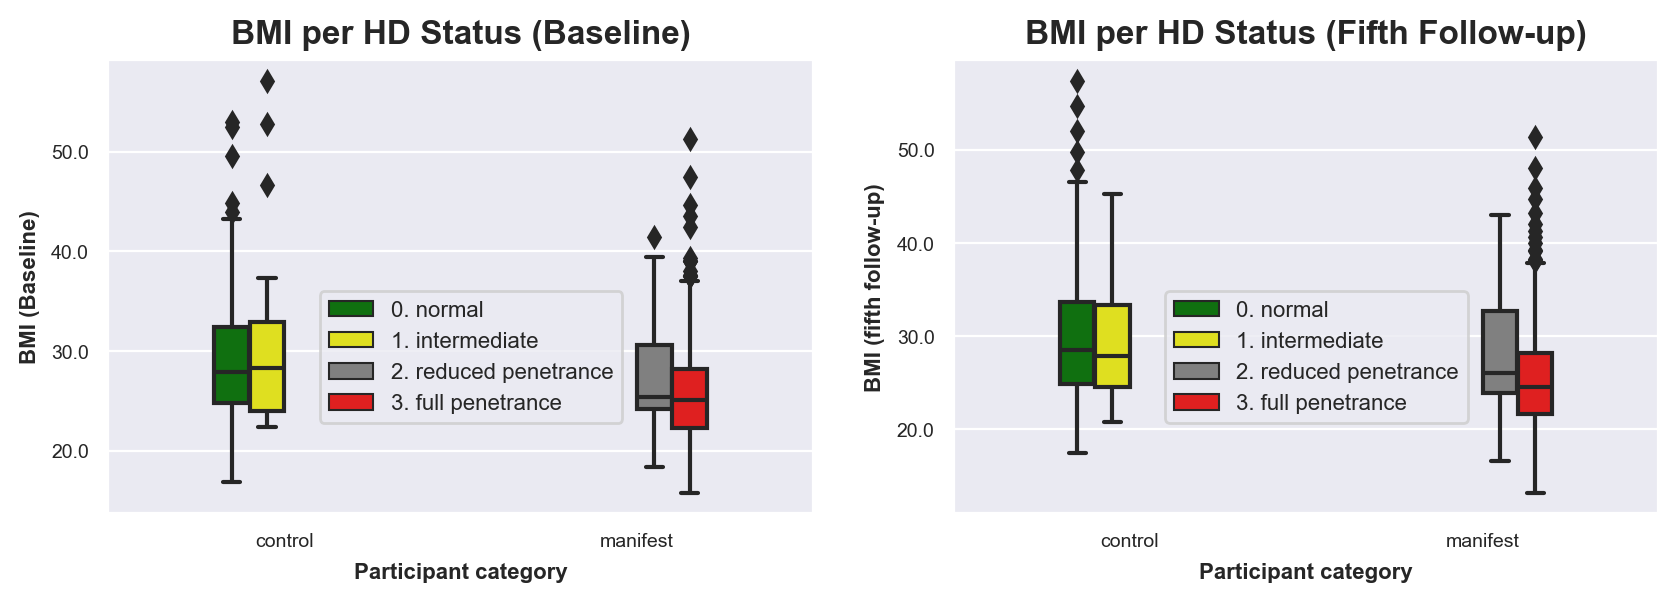

In [47]:
# BMI per hd status per caghigh band
cols = ['hd_status_gen', 'bmi_vis_1', 'caghigh_band']
order = sorted([c for c in analyze_df[cols[-1]].unique()])
x_order = sorted([labe for labe in analyze_df[cols[0]].unique()])
display(order)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 3], dpi=200)
proj.plot_box(axis=l, x=analyze_df[cols[0]], y=analyze_df[cols[1]], condition_on=analyze_df[cols[-1]],
              plot_title="BMI per HD Status (Baseline)",
             orientation='v', x_labe_order=x_order, paletter=proj.cagrepeat_band_cmap, condition_order=order,
             x_labe='Participant category', y_labe='BMI (Baseline)', xy_labe_size=8, xy_ticksize=7,
              box_width=0.4, show_legend_at=[0.3, 0.2], legend_size=8)


cols = ['hd_status_gen', 'bmi_vis_6', 'caghigh_band']
proj.plot_box(axis=r, x=analyze_df[cols[0]], y=analyze_df[cols[1]], condition_on=analyze_df[cols[-1]],
              plot_title="BMI per HD Status (Fifth Follow-up)",
             orientation='v', x_labe_order=x_order, paletter=proj.cagrepeat_band_cmap, condition_order=order,
             x_labe='Participant category', y_labe='BMI (fifth follow-up)',  xy_labe_size=8, xy_ticksize=7,
              box_width=0.4, show_legend_at=[0.3, 0.2], legend_size=8)

['control', 'manifest']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Fifth Follow-up BMI per Subject Category'}, xlabel='BMI Class', ylabel='Larger allele CAG'>

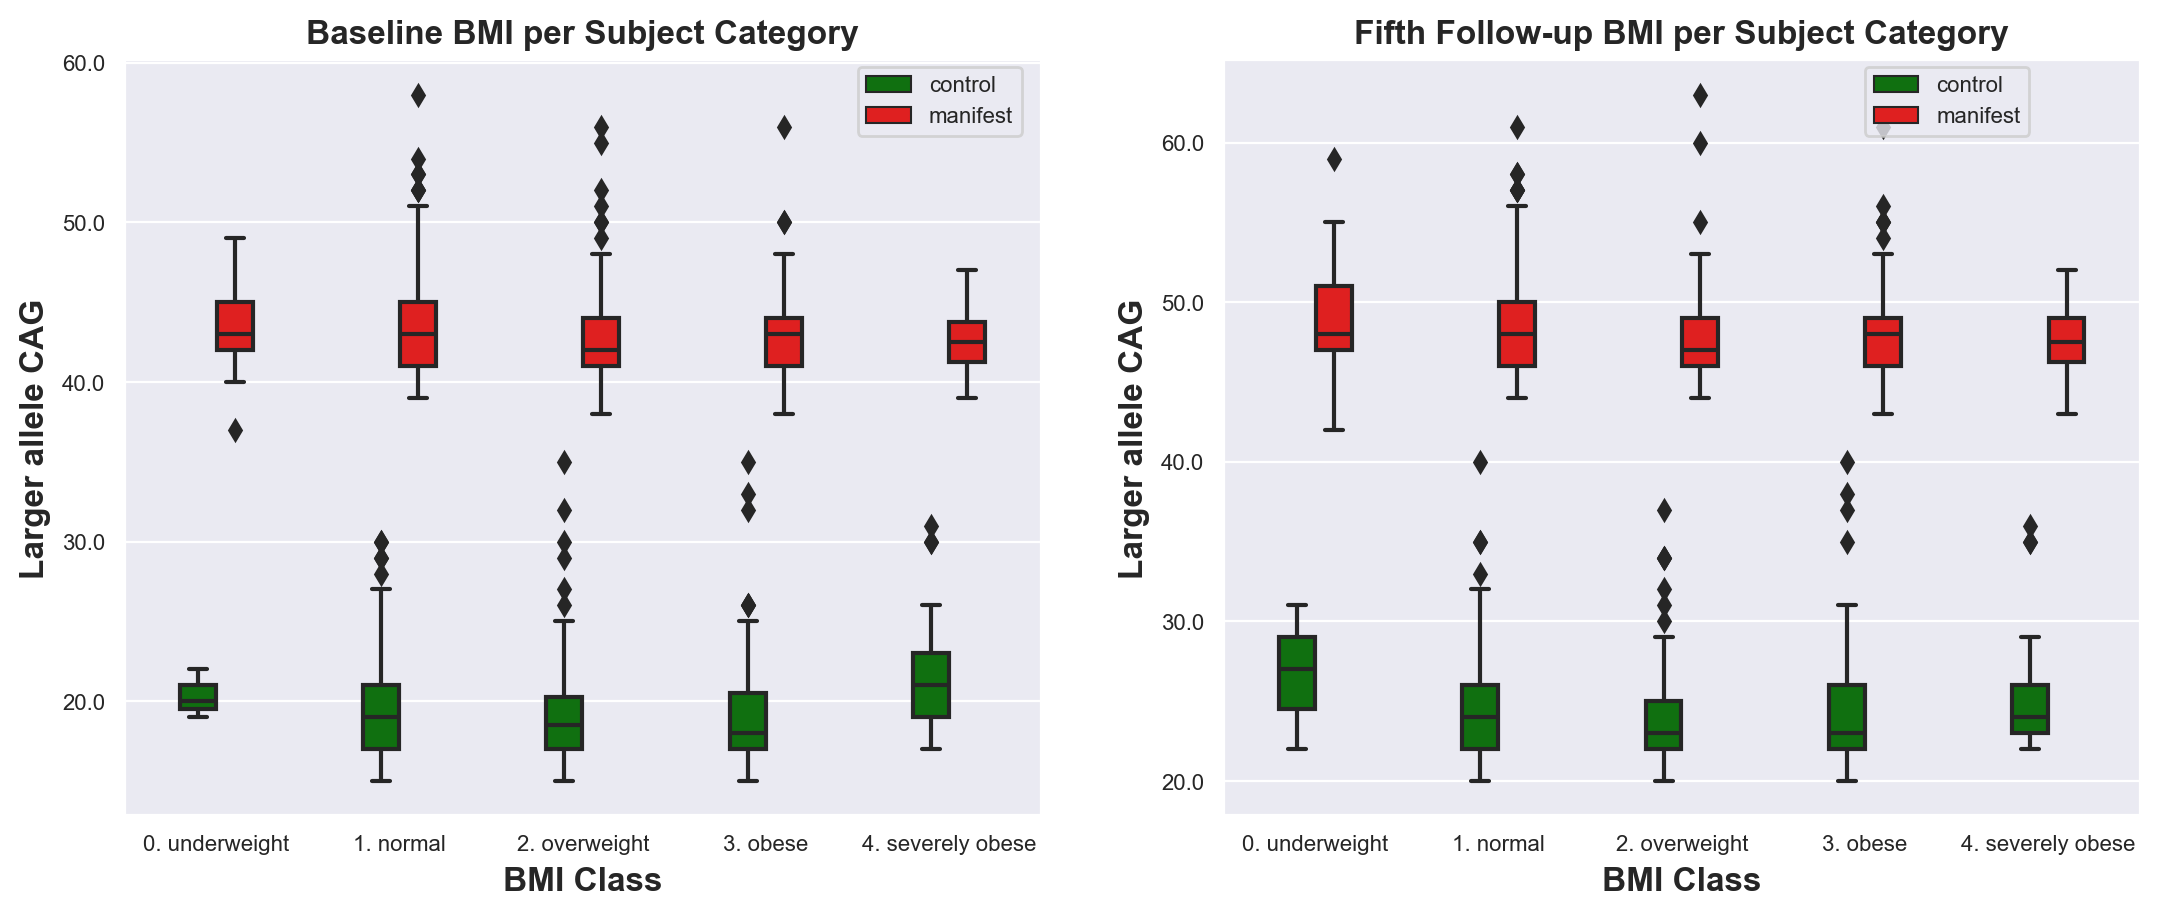

In [48]:
# BMI per hd status per caghigh band
cols = ['bmi_level_vis_1', 'caghigh_num', 'hd_status_gen']
order = sorted([c for c in analyze_df[cols[-1]].unique()])
x_order = sorted(analyze_df[cols[0]].unique())
cmap = {'control':'green', 'manifest':'red'}
display(order)

fig, (l, r) = plt.subplots(1, 2, figsize=[13, 5], dpi=200)
proj.plot_box(axis=l, x=analyze_df[cols[0]], y=analyze_df[cols[1]], condition_on=analyze_df[cols[-1]],
              plot_title="Baseline BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='Larger allele CAG', xy_ticksize=8, xy_labe_size=12,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.8, 0.9], legend_size=8)

cols = ['bmi_level_vis_6', 'caghigh_num', 'hd_status_gen',]
new_age = analyze_df[cols[1]] + 5
proj.plot_box(axis=r, x=analyze_df[cols[0]], y=new_age, condition_on=analyze_df[cols[-1]],
              plot_title="Fifth Follow-up BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='Larger allele CAG', xy_ticksize=8, xy_labe_size=12,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.7, 0.9], legend_size=8)

['control', 'manifest']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Fifth Follow-up BMI per Subject Category'}, xlabel='BMI Class', ylabel='CCC'>

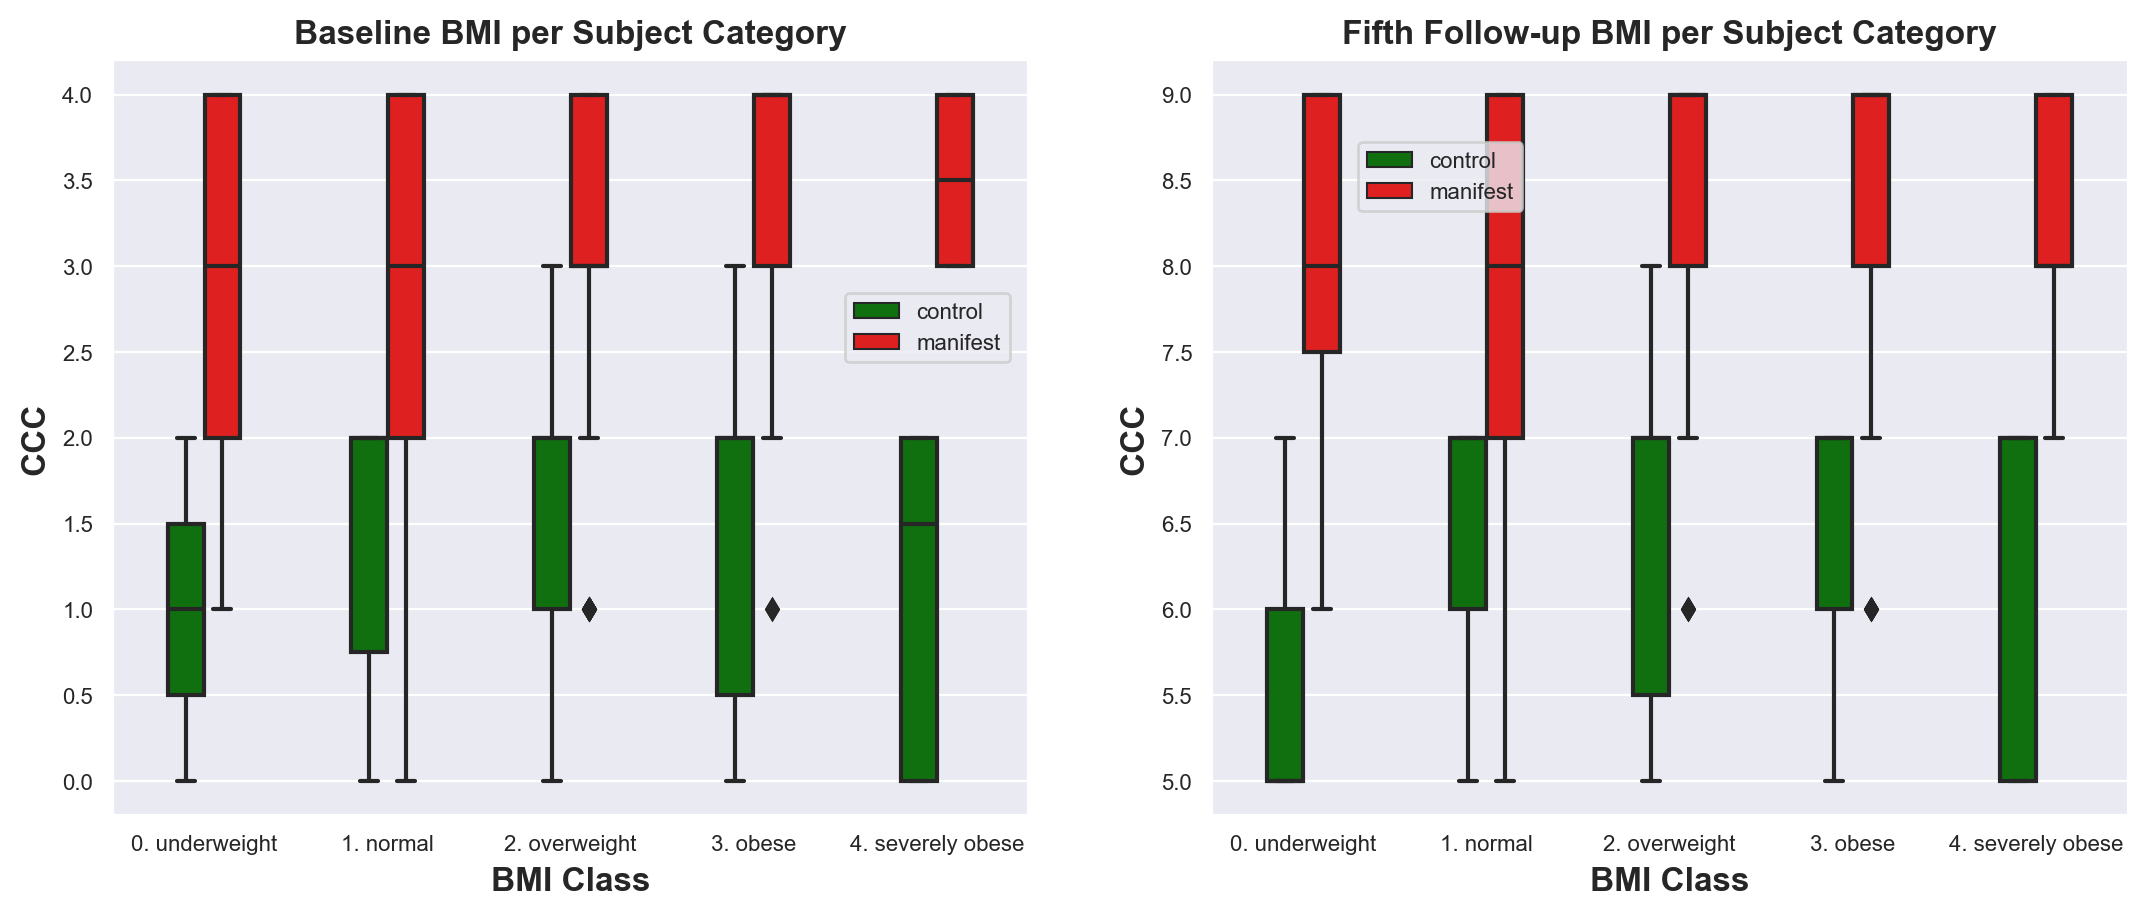

In [49]:
# BMI per hd status per caghigh band
cols = ['bmi_level_vis_1', 'CCC', 'hd_status_gen']
order = sorted([c for c in analyze_df[cols[-1]].unique()])
x_order = sorted(analyze_df[cols[0]].unique())
cmap = {'control':'green', 'manifest':'red'}
display(order)

fig, (l, r) = plt.subplots(1, 2, figsize=[13, 5], dpi=200)
proj.plot_box(axis=l, x=analyze_df[cols[0]], y=analyze_df[cols[1]], condition_on=analyze_df[cols[-1]],
              plot_title="Baseline BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='CCC', xy_ticksize=8, xy_labe_size=12,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.8, 0.6], legend_size=8)

cols = ['bmi_level_vis_6', 'CCC', 'hd_status_gen',]
new_age = analyze_df[cols[1]] + 5
proj.plot_box(axis=r, x=analyze_df[cols[0]], y=new_age, condition_on=analyze_df[cols[-1]],
              plot_title="Fifth Follow-up BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='CCC', 
              xy_ticksize=8, xy_labe_size=12, orientation='v', x_labe_order=x_order, 
              paletter=cmap, condition_order=order, show_legend_at=[0.16, 0.8], legend_size=8)

['control', 'manifest']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Fifth Follow-up BMI per Subject Category'}, xlabel='BMI Class', ylabel='Age'>

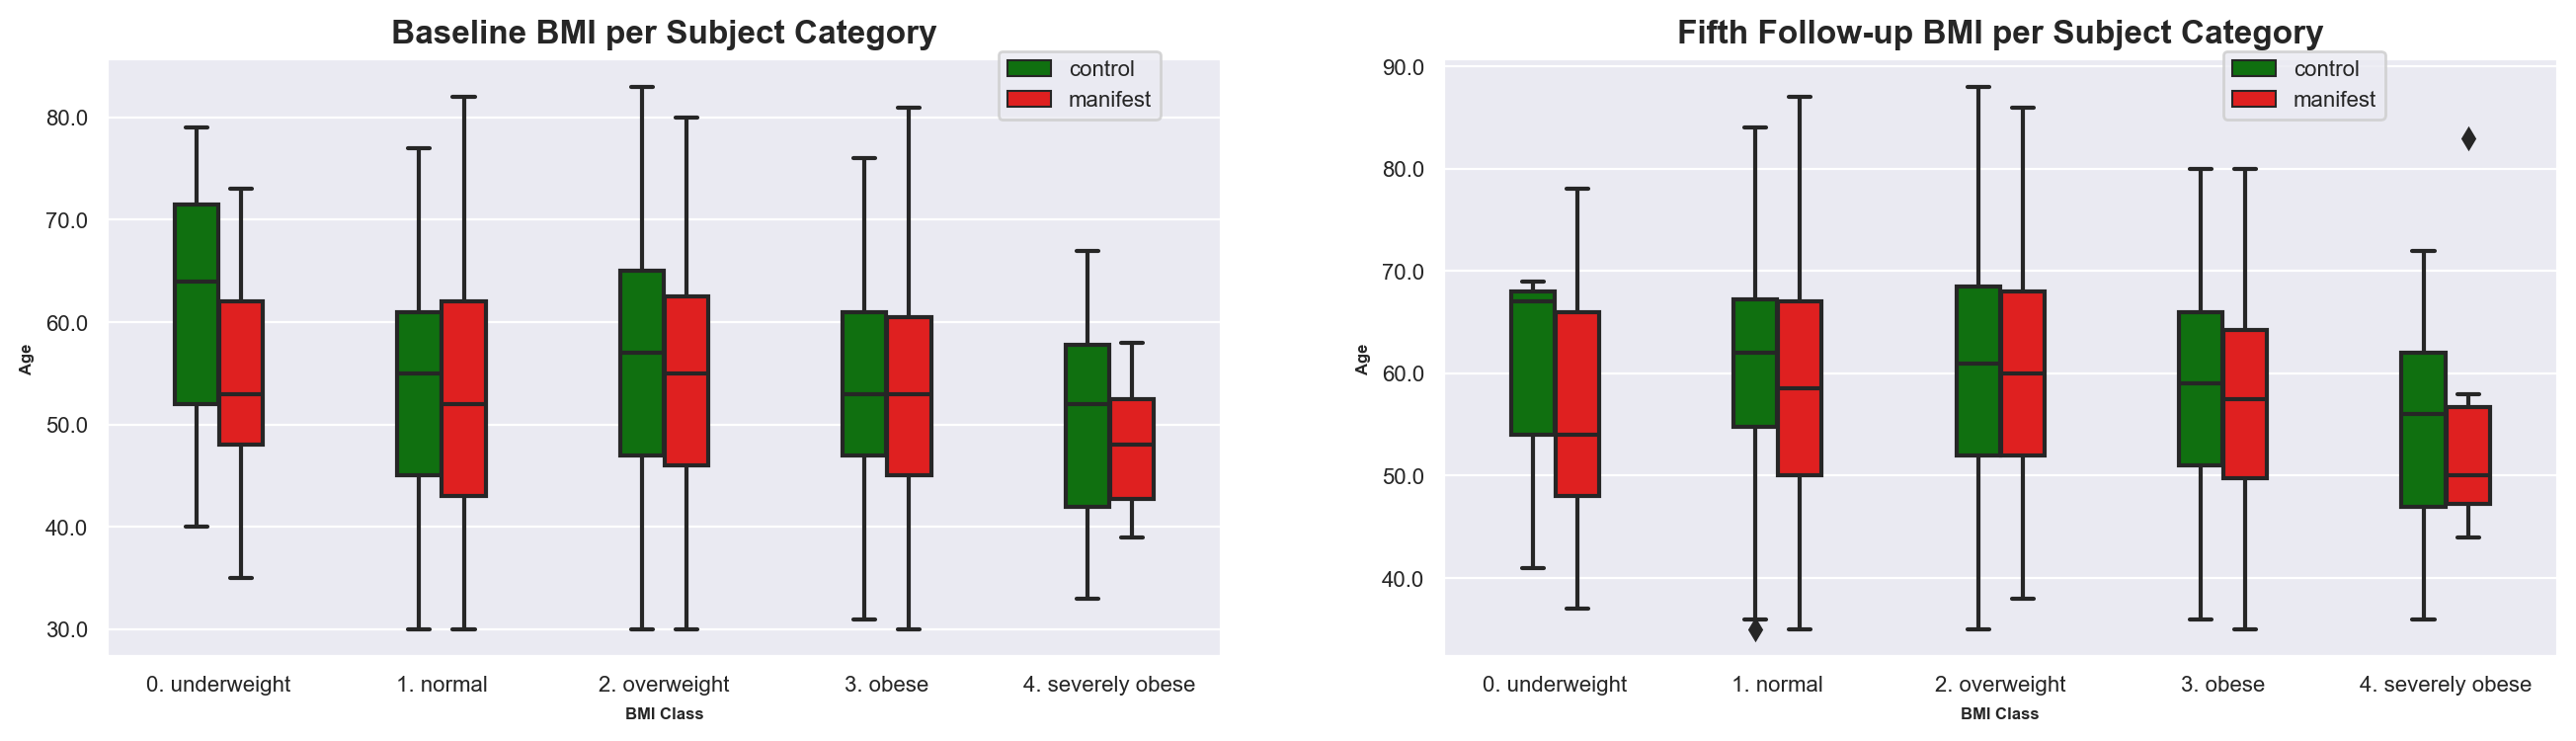

In [50]:
# BMI per hd status per caghigh band
cols = ['bmi_level_vis_1', 'age_vis_1', 'hd_status_gen']
order = sorted([c for c in analyze_df[cols[-1]].unique()])
x_order = sorted(analyze_df[cols[0]].unique())
cmap = {'control':'green', 'manifest':'red'}
display(order)

fig, (l, r) = plt.subplots(1, 2, figsize=[16, 4], dpi=200)
proj.plot_box(axis=l, x=analyze_df[cols[0]], y=analyze_df[cols[1]], condition_on=analyze_df[cols[-1]],
              plot_title="Baseline BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='Age', xy_ticksize=8,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.8, 0.9], legend_size=8)

cols = ['bmi_level_vis_6', 'age_vis_1', 'hd_status_gen',]
new_age = analyze_df[cols[1]] + 5
proj.plot_box(axis=r, x=analyze_df[cols[0]], y=new_age, condition_on=analyze_df[cols[-1]],
              plot_title="Fifth Follow-up BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='Age', xy_ticksize=8,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.7, 0.9], legend_size=8)

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Fifth Follow-up BMI per Subject Category'}, xlabel='BMI Class', ylabel='Age'>

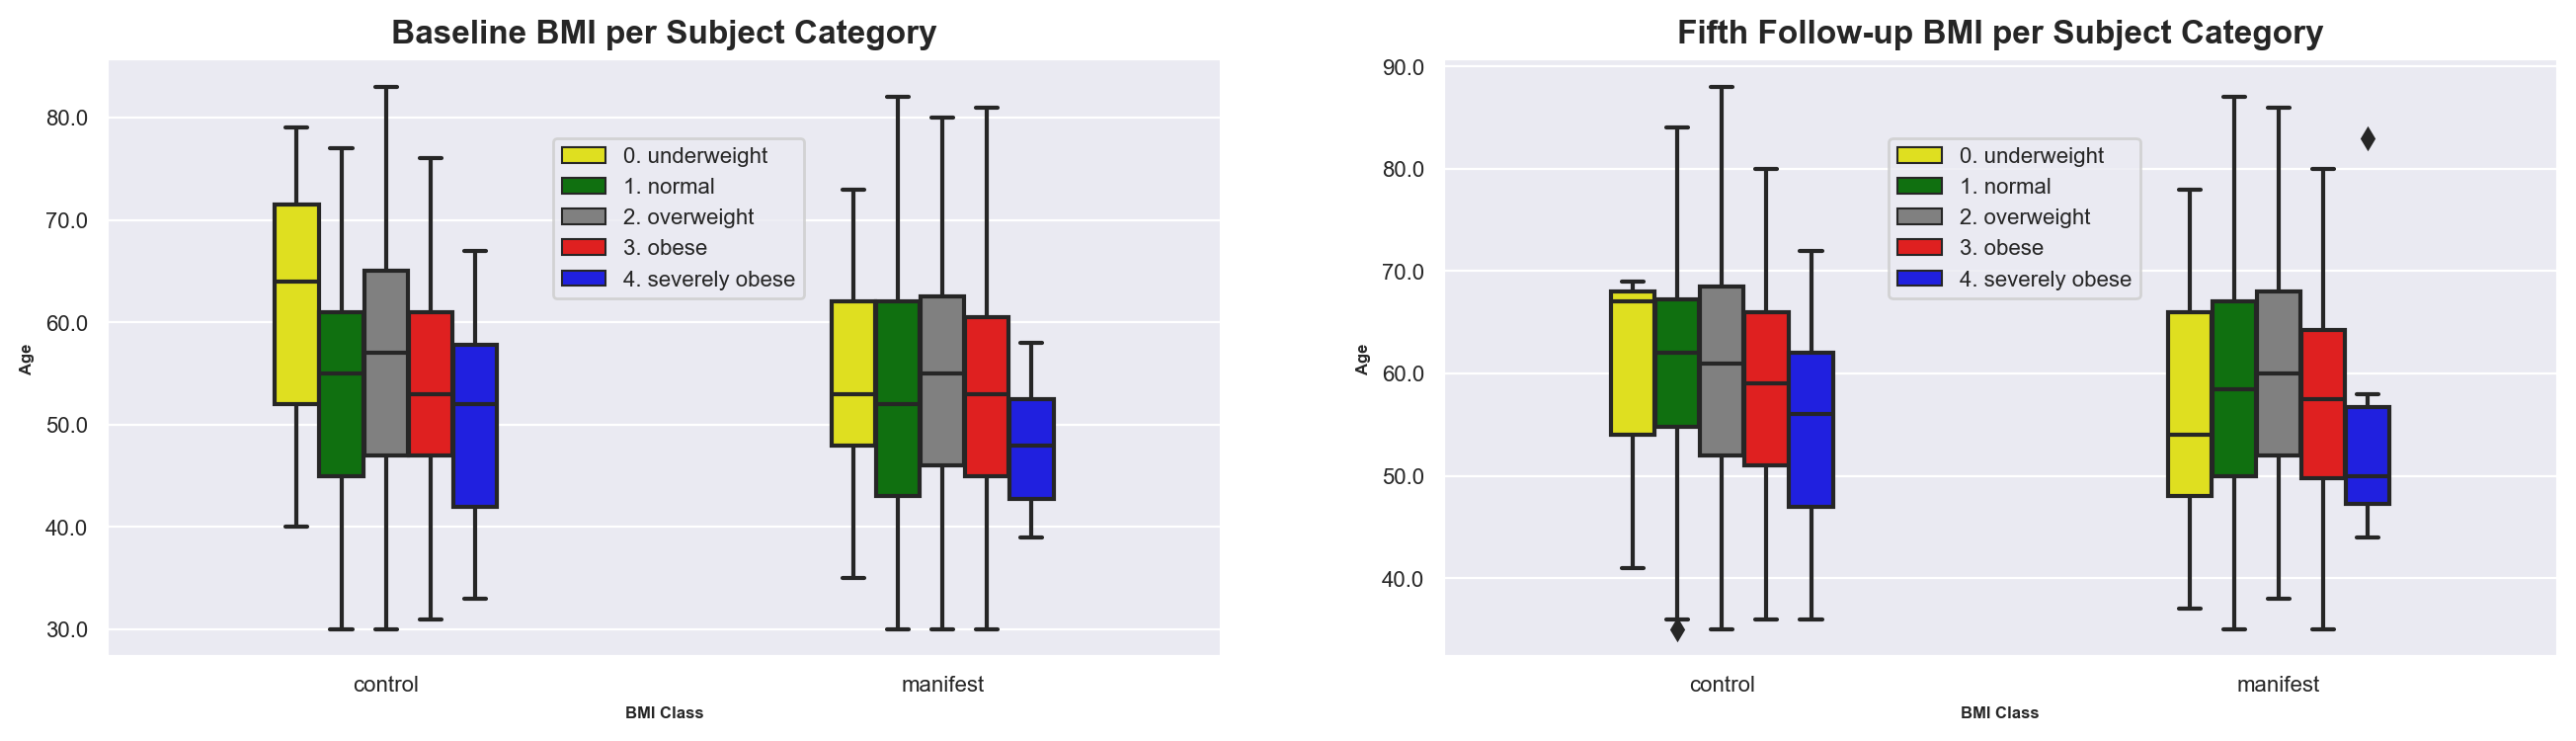

In [51]:
# BMI per hd status per caghigh band
cols = ['bmi_level_vis_1', 'age_vis_1', 'hd_status_gen']
order = sorted([c for c in analyze_df[cols[0]].unique()])
x_order = sorted(analyze_df[cols[-1]].unique())
cmap = {'0. underweight': 'yellow', '1. normal': 'green', '2. overweight': 'gray', 
        '3. obese': 'red', '4. severely obese': 'blue'}
display(order)

fig, (l, r) = plt.subplots(1, 2, figsize=[16, 4], dpi=200)
proj.plot_box(axis=l, x=analyze_df[cols[-1]], y=analyze_df[cols[1]], condition_on=analyze_df[cols[0]],
              plot_title="Baseline BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='Age', xy_ticksize=8,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.4, 0.6], legend_size=8)

cols = ['bmi_level_vis_6', 'age_vis_1', 'hd_status_gen',]
new_age = analyze_df[cols[1]] + 5
proj.plot_box(axis=r, x=analyze_df[cols[-1]], y=new_age, condition_on=analyze_df[cols[0]],
              plot_title="Fifth Follow-up BMI per Subject Category", box_width=0.4,
              x_labe='BMI Class', y_labe='Age', xy_ticksize=8,
             orientation='v', x_labe_order=x_order, paletter=cmap, condition_order=order,
             show_legend_at=[0.4, 0.6], legend_size=8)

### Statistically Significant Diffference 

#### BMI

In [52]:
cols = proj.get_columns_with_pattern(mnft, 'bmi_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],
                                alternative_hypothesis='less')

Index(['bmi_vis_1', 'bmi_vis_6'], dtype='object')


{'t_statistic': array([ -8.75045   , -10.46402655]),
 'pvalue': array([5.50305760e-18, 1.64713059e-24])}

In [53]:
cols = proj.get_columns_with_pattern(mnft, 'bmi_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['bmi_vis_1', 'bmi_vis_6'], dtype='object')


{'t_statistic': array([-1.42255914, -0.29211512]),
 'pvalue': array([0.15584417, 0.77038909])}

In [54]:
cols = proj.get_columns_with_pattern(mnft, 'bmi_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['bmi_vis_1', 'bmi_vis_6'], dtype='object')


{'t_statistic': array([0.45530969, 0.89878355]),
 'pvalue': array([0.64919717, 0.369448  ])}

In [55]:
cols = proj.get_columns_with_pattern(mnft, 'bmi_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['bmi_vis_1', 'bmi_vis_6'], dtype='object')


{'t_statistic': array([0.99159192, 0.8087007 ]),
 'pvalue': array([0.32883582, 0.42465927])}

In [56]:
cols = proj.get_columns_with_pattern(mnft, 'bmi_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['bmi_vis_1', 'bmi_vis_6'], dtype='object')


{'t_statistic': array([2.19646806, 2.21464241]),
 'pvalue': array([0.02847965, 0.02719827])}

#### tfcscore

In [57]:
cols = proj.get_columns_with_pattern(mnft, 'tfc').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['tfcscore_vis_1', 'tfcscore_vis_6'], dtype='object')


{'t_statistic': array([-21.49713244, -30.2168646 ]),
 'pvalue': array([1.89996196e-082, 1.90736819e-137])}

In [58]:
cols = proj.get_columns_with_pattern(mnft, 'tfc').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['tfcscore_vis_1', 'tfcscore_vis_6'], dtype='object')


{'t_statistic': array([-0.51056651, -0.95947605]),
 'pvalue': array([0.61000887, 0.33804791])}

In [59]:
cols = proj.get_columns_with_pattern(mnft, 'tfc').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['tfcscore_vis_1', 'tfcscore_vis_6'], dtype='object')


{'t_statistic': array([18.31783386, 20.26646291]),
 'pvalue': array([1.12508855e-51, 3.24867510e-59])}

In [60]:
cols = proj.get_columns_with_pattern(mnft, 'tfc').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['tfcscore_vis_1', 'tfcscore_vis_6'], dtype='object')


{'t_statistic': array([5.27987549, 7.02509964]),
 'pvalue': array([8.80154526e-06, 5.79520587e-08])}

In [61]:
cols = proj.get_columns_with_pattern(mnft, 'tfc').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['tfcscore_vis_1', 'tfcscore_vis_6'], dtype='object')


{'t_statistic': array([-0.07623296,  1.09427736]),
 'pvalue': array([0.93926179, 0.27431763])}

#### motscore

In [62]:
cols = proj.get_columns_with_pattern(mnft, 'mot').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['motscore_vis_1', 'motscore_vis_6'], dtype='object')


{'t_statistic': array([30.06615492, 33.86184116]),
 'pvalue': array([1.75038492e-136, 1.23058847e-160])}

In [63]:
cols = proj.get_columns_with_pattern(mnft, 'mot').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['motscore_vis_1', 'motscore_vis_6'], dtype='object')


{'t_statistic': array([-0.31847601,  0.12101804]),
 'pvalue': array([0.75033295, 0.90375317])}

In [64]:
cols = proj.get_columns_with_pattern(mnft, 'mot').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['motscore_vis_1', 'motscore_vis_6'], dtype='object')


{'t_statistic': array([-19.83103289, -22.2929432 ]),
 'pvalue': array([1.55027002e-57, 5.90023694e-67])}

In [65]:
cols = proj.get_columns_with_pattern(mnft, 'mot').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['motscore_vis_1', 'motscore_vis_6'], dtype='object')


{'t_statistic': array([-6.58868541, -6.24294751]),
 'pvalue': array([1.99699206e-07, 5.38214353e-07])}

In [66]:
cols = proj.get_columns_with_pattern(mnft, 'mot').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['motscore_vis_1', 'motscore_vis_6'], dtype='object')


{'t_statistic': array([-1.27932948, -1.87342734]),
 'pvalue': array([0.20132645, 0.06154533])}

#### cognitive_score

In [67]:
cols = proj.get_columns_with_pattern(mnft, 'cognitive_').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['cognitive_score_vis_1', 'cognitive_score_vis_6'], dtype='object')


{'t_statistic': array([-27.73306537, -36.42092135]),
 'pvalue': array([1.40052652e-121, 1.00649641e-176])}

In [68]:
cols = proj.get_columns_with_pattern(mnft, 'cognitive_').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['cognitive_score_vis_1', 'cognitive_score_vis_6'], dtype='object')


{'t_statistic': array([ 0.68109014, -0.05107887]),
 'pvalue': array([0.49631011, 0.95929474])}

In [69]:
cols = proj.get_columns_with_pattern(mnft, 'cognitive_').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['cognitive_score_vis_1', 'cognitive_score_vis_6'], dtype='object')


{'t_statistic': array([7.46667218, 8.32458001]),
 'pvalue': array([7.96901354e-13, 2.53880492e-15])}

In [70]:
cols = proj.get_columns_with_pattern(mnft, 'cognitive_').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['cognitive_score_vis_1', 'cognitive_score_vis_6'], dtype='object')


{'t_statistic': array([3.65288904, 4.55652488]),
 'pvalue': array([9.18410870e-04, 7.17526425e-05])}

In [71]:
cols = proj.get_columns_with_pattern(mnft, 'cognitive_').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['cognitive_score_vis_1', 'cognitive_score_vis_6'], dtype='object')


{'t_statistic': array([1.39931764, 3.07923017]),
 'pvalue': array([0.16228768, 0.00218011])}

#### behaviour_score

In [72]:
cols = proj.get_columns_with_pattern(mnft, 'behaviour_').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['behaviour_score_vis_1', 'behaviour_score_vis_6'], dtype='object')


{'t_statistic': array([11.68942385, 11.88991138]),
 'pvalue': array([2.07108061e-29, 2.66482669e-30])}

In [73]:
cols = proj.get_columns_with_pattern(mnft, 'behaviour_').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['behaviour_score_vis_1', 'behaviour_score_vis_6'], dtype='object')


{'t_statistic': array([-1.62134279,  0.46799743]),
 'pvalue': array([0.1059352 , 0.64010701])}

In [74]:
cols = proj.get_columns_with_pattern(mnft, 'behaviour_').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['behaviour_score_vis_1', 'behaviour_score_vis_6'], dtype='object')


{'t_statistic': array([-4.98231005, -4.16401721]),
 'pvalue': array([1.03340645e-06, 4.03164249e-05])}

In [75]:
cols = proj.get_columns_with_pattern(mnft, 'behaviour_').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['behaviour_score_vis_1', 'behaviour_score_vis_6'], dtype='object')


{'t_statistic': array([-1.60268438, -2.43956728]),
 'pvalue': array([0.11883093, 0.02042814])}

In [76]:
cols = proj.get_columns_with_pattern(mnft, 'behaviour_').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['behaviour_score_vis_1', 'behaviour_score_vis_6'], dtype='object')


{'t_statistic': array([-0.26236357, -0.86136225]),
 'pvalue': array([0.79314048, 0.38941806])}

#### Age

In [77]:
cols = proj.get_columns_with_pattern(mnft, 'age_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['age_vis_1', 'age_vis_6'], dtype='object')


{'t_statistic': array([-0.79110546, -0.79110546]),
 'pvalue': array([0.42909956, 0.42909956])}

In [78]:
cols = proj.get_columns_with_pattern(mnft, 'age_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['age_vis_1', 'age_vis_6'], dtype='object')


{'t_statistic': array([0.04692609, 0.04692609]),
 'pvalue': array([0.96260159, 0.96260159])}

In [79]:
cols = proj.get_columns_with_pattern(mnft, 'age_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['age_vis_1', 'age_vis_6'], dtype='object')


{'t_statistic': array([-4.5907113, -4.5907113]),
 'pvalue': array([6.3695711e-06, 6.3695711e-06])}

In [80]:
cols = proj.get_columns_with_pattern(mnft, 'age_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['age_vis_1', 'age_vis_6'], dtype='object')


{'t_statistic': array([-3.72555684, -3.72555684]),
 'pvalue': array([0.00075208, 0.00075208])}

In [81]:
cols = proj.get_columns_with_pattern(mnft, 'age_vis').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['age_vis_1', 'age_vis_6'], dtype='object')


{'t_statistic': array([5.510341, 5.510341]),
 'pvalue': array([5.53508991e-08, 5.53508991e-08])}

#### caghigh_num

In [82]:
cols = proj.get_columns_with_pattern(mnft, 'caghigh_num').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['caghigh_num'], dtype='object')


{'t_statistic': array([105.35003862]), 'pvalue': array([0.])}

In [83]:
cols = proj.get_columns_with_pattern(mnft, 'caghigh_num').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['caghigh_num'], dtype='object')


{'t_statistic': array([-18.29962796]), 'pvalue': array([1.3239404e-51])}

In [84]:
cols = proj.get_columns_with_pattern(mnft, 'caghigh_num').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['caghigh_num'], dtype='object')


{'t_statistic': array([-32.46949247]), 'pvalue': array([5.49977348e-103])}

In [85]:
cols = proj.get_columns_with_pattern(mnft, 'caghigh_num').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['caghigh_num'], dtype='object')


{'t_statistic': array([-13.98681509]), 'pvalue': array([3.49542851e-15])}

In [86]:
cols = proj.get_columns_with_pattern(mnft, 'caghigh_num').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['caghigh_num'], dtype='object')


{'t_statistic': array([-6.73076568]), 'pvalue': array([4.29254181e-11])}

In [87]:
vals = ["0. underweight", "1. normal", "2. overweight", "3. obese", "4. severely obese"]
ctr, mnt, redp, fulp = dict(), dict(), dict(), dict()
for v in vals:
    ctr[v] = ctrl.loc[ctrl['bmi_level_vis_6'] == v]
    mnt[v] = mnft.loc[mnft['bmi_level_vis_6'] == v]
    redp[v] = redpent.loc[redpent['bmi_level_vis_6'] == v]
    fulp[v] = fulpent.loc[fulpent['bmi_level_vis_6'] == v]

In [88]:
vals = ["0. underweight", "1. normal", "2. overweight", "3. obese", "4. severely obese"]
cols = 'caghigh_num'
for v in vals:
    print(v)
    display(proj.get_ttest_pvalue_from_array(ctr[v][cols], 
                                             mnt[v][cols]))

0. underweight

Equal Variance Detected! -> Student T-Test



{'t_statistic': -10.681204651821874, 'pvalue': 4.4127003182126015e-12}

1. normal

Equal Variance Detected! -> Student T-Test



{'t_statistic': -61.23805923529238, 'pvalue': 4.185405984543722e-189}

2. overweight

Equal Variance Detected! -> Student T-Test



{'t_statistic': -61.31248814611817, 'pvalue': 3.0439489578082753e-154}

3. obese

Equal Variance Detected! -> Student T-Test



{'t_statistic': -46.943018887998264, 'pvalue': 5.4188187344175474e-104}

4. severely obese

Equal Variance Detected! -> Student T-Test



{'t_statistic': -16.464372029371784, 'pvalue': 1.2964451322634988e-18}

#### CAP

In [89]:
cols = proj.get_columns_with_pattern(mnft, 'CAP',
                                     find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['CAP'], dtype='object')


{'t_statistic': array([48.04427786]), 'pvalue': array([3.05825514e-246])}

In [90]:
cols = proj.get_columns_with_pattern(mnft, 'CAP',
                                     find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['CAP'], dtype='object')


{'t_statistic': array([-8.50746371]), 'pvalue': array([7.08739149e-16])}

In [91]:
cols = proj.get_columns_with_pattern(mnft, 'CAP',
                                     find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['CAP'], dtype='object')


{'t_statistic': array([-22.21411846]), 'pvalue': array([1.17317017e-66])}

In [92]:
cols = proj.get_columns_with_pattern(mnft, 'CAP', 
                                     find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['CAP'], dtype='object')


{'t_statistic': array([-7.1386754]), 'pvalue': array([4.21243481e-08])}

In [93]:
cols = proj.get_columns_with_pattern(mnft, 'CAP', 
                                     find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['CAP'], dtype='object')


{'t_statistic': array([3.724647]), 'pvalue': array([0.000216])}

#### CCMTR Age of Onset

In [94]:
cols = proj.get_columns_with_pattern(mnft, 'ccmtrage').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['ccmtrage'], dtype='object')


{'t_statistic': array([64.88178638]), 'pvalue': array([0.])}

In [95]:
cols = proj.get_columns_with_pattern(mnft, 'ccmtrage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['ccmtrage'], dtype='object')


{'t_statistic': array([0.57051755]), 'pvalue': array([0.56872962])}

In [96]:
cols = proj.get_columns_with_pattern(mnft, 'ccmtrage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['ccmtrage'], dtype='object')


{'t_statistic': array([-28.58625734]), 'pvalue': array([7.11558597e-90])}

In [97]:
cols = proj.get_columns_with_pattern(mnft, 'ccmtrage').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['ccmtrage'], dtype='object')


{'t_statistic': array([-24.46983094]), 'pvalue': array([2.76078279e-22])}

In [98]:
cols = proj.get_columns_with_pattern(mnft, 'ccmtrage').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['ccmtrage'], dtype='object')


{'t_statistic': array([5.19696801]), 'pvalue': array([2.86995394e-07])}

#### ccdep Age of Onset

In [99]:
cols = proj.get_columns_with_pattern(mnft, 'ccdepage').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['ccdepage'], dtype='object')


{'t_statistic': array([18.72744302]), 'pvalue': array([6.0640168e-66])}

In [100]:
cols = proj.get_columns_with_pattern(mnft, 'ccdepage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['ccdepage'], dtype='object')


{'t_statistic': array([-0.48106086]), 'pvalue': array([0.63080407])}

In [101]:
cols = proj.get_columns_with_pattern(mnft, 'ccdepage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['ccdepage'], dtype='object')


{'t_statistic': array([-6.09692438]), 'pvalue': array([3.13061576e-09])}

In [102]:
cols = proj.get_columns_with_pattern(mnft, 'ccdepage').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['ccdepage'], dtype='object')


{'t_statistic': array([-3.1704032]), 'pvalue': array([0.00334567])}

In [103]:
cols = proj.get_columns_with_pattern(mnft, 'ccdepage').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['ccdepage'], dtype='object')


{'t_statistic': array([0.28140851]), 'pvalue': array([0.7785041])}

#### cccog Age of Onset

In [104]:
cols = proj.get_columns_with_pattern(mnft, 'cccogage').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['cccogage'], dtype='object')


{'t_statistic': array([22.50930219]), 'pvalue': array([1.16926098e-88])}

In [105]:
cols = proj.get_columns_with_pattern(mnft, 'cccogage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['cccogage'], dtype='object')


{'t_statistic': array([0.23651547]), 'pvalue': array([0.81318498])}

In [106]:
cols = proj.get_columns_with_pattern(mnft, 'cccogage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['cccogage'], dtype='object')


{'t_statistic': array([-19.059225]), 'pvalue': array([1.49802516e-54])}

In [107]:
cols = proj.get_columns_with_pattern(mnft, 'cccogage').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['cccogage'], dtype='object')


{'t_statistic': array([-5.21118877]), 'pvalue': array([1.07500619e-05])}

In [108]:
cols = proj.get_columns_with_pattern(mnft, 'cccogage').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['cccogage'], dtype='object')


{'t_statistic': array([1.16385379]), 'pvalue': array([0.24499346])}

#### ccapt Age of Onset

In [109]:
cols = proj.get_columns_with_pattern(mnft, 'ccaptage').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['ccaptage'], dtype='object')


{'t_statistic': array([22.2065291]), 'pvalue': array([8.58998244e-87])}

In [110]:
cols = proj.get_columns_with_pattern(mnft, 'ccaptage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['ccaptage'], dtype='object')


{'t_statistic': array([-0.41509374]), 'pvalue': array([0.6783532])}

In [111]:
cols = proj.get_columns_with_pattern(mnft, 'ccaptage').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['ccaptage'], dtype='object')


{'t_statistic': array([-16.25466215]), 'pvalue': array([1.14313277e-43])}

In [112]:
cols = proj.get_columns_with_pattern(mnft, 'ccaptage').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['ccaptage'], dtype='object')


{'t_statistic': array([-5.83672449]), 'pvalue': array([1.74221235e-06])}

In [113]:
cols = proj.get_columns_with_pattern(mnft, 'ccaptage').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['ccaptage'], dtype='object')


{'t_statistic': array([2.53947576]), 'pvalue': array([0.01137912])}

#### Combined Clinical Characteristics (CCC)
Combined medical history of cognitive and motor impairment, apathy and depression

In [114]:
cols = proj.get_columns_with_pattern(mnft, 'ccc', find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['CCC'], dtype='object')


{'t_statistic': array([27.40706653]), 'pvalue': array([1.68081792e-119])}

In [115]:
cols = proj.get_columns_with_pattern(mnft, 'ccc', find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['CCC'], dtype='object')


{'t_statistic': array([1.22197396]), 'pvalue': array([0.2226225])}

In [116]:
cols = proj.get_columns_with_pattern(mnft, 'ccc', find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['CCC'], dtype='object')


{'t_statistic': array([-8.26735696]), 'pvalue': array([3.77136092e-15])}

In [117]:
cols = proj.get_columns_with_pattern(mnft, 'ccc', find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['CCC'], dtype='object')


{'t_statistic': array([-5.80318671]), 'pvalue': array([1.92031838e-06])}

In [118]:
cols = proj.get_columns_with_pattern(mnft, 'ccc', find_exact_match=True).columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['CCC'], dtype='object')


{'t_statistic': array([0.18892727]), 'pvalue': array([0.85022029])}

#### feedself

In [119]:
cols = proj.get_columns_with_pattern(mnft, 'feedself').columns
print(cols)
proj.get_ttest_pvalue_from_array(mnft[cols], ctrl[cols],) 
#                                 alternative_hypothesis='less')

Index(['feedself_vis_1', 'feedself_vis_6'], dtype='object')


{'t_statistic': array([-3.29907513, -7.98235909]),
 'pvalue': array([1.00971660e-03, 4.55828842e-15])}

In [120]:
cols = proj.get_columns_with_pattern(mnft, 'feedself').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], itmt[cols])

Index(['feedself_vis_1', 'feedself_vis_6'], dtype='object')


{'t_statistic': array([nan, nan]), 'pvalue': array([nan, nan])}

In [121]:
cols = proj.get_columns_with_pattern(mnft, 'feedself').columns
print(cols)
proj.get_ttest_pvalue_from_array(nml[cols], redpent[cols])

Index(['feedself_vis_1', 'feedself_vis_6'], dtype='object')


{'t_statistic': array([       nan, 4.33810334]),
 'pvalue': array([           nan, 1.93244799e-05])}

In [122]:
cols = proj.get_columns_with_pattern(mnft, 'feedself').columns
print(cols)
proj.get_ttest_pvalue_from_array(itmt[cols], redpent[cols])

Index(['feedself_vis_1', 'feedself_vis_6'], dtype='object')


{'t_statistic': array([nan,  1.]), 'pvalue': array([       nan, 0.32481271])}

In [123]:
cols = proj.get_columns_with_pattern(mnft, 'feedself').columns
print(cols)
proj.get_ttest_pvalue_from_array(redpent[cols], fulpent[cols])

Index(['feedself_vis_1', 'feedself_vis_6'], dtype='object')


{'t_statistic': array([0.77241979, 1.2073471 ]),
 'pvalue': array([0.44020128, 0.22782318])}

In [124]:
# control
ctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))
       
mctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

control = first6_vis.loc[ctl].reset_index(drop=True)
male_control = first6_vis.loc[mctl]
female_control = first6_vis.loc[fctl]

display(control, len(male_control), len(female_control))

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R002995975      1       0.0      0       0.0      0       0.0      1   
1    R013633600      0       0.0      0       0.0      0       0.0      0   
2    R021820966      1       0.0      0       0.0      0       0.0      1   
3    R02679911X      0       0.0      0       0.0      0       0.0      0   
4    R026933811      0       0.0      0       0.0      0       0.0      0   
..          ...    ...       ...    ...       ...    ...       ...    ...   
315  R98296028X      1       0.0      0       0.0      0       0.0      1   
316  R983486749      1       0.0      0       0.0      0       0.0      1   
317  R984684709      1      58.0      0       0.0      0       0.0      0   
318  R985917130      1      25.0      0       0.0      0       0.0      0   
319  R995458444      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         0.0           6.2       1.9         1.0              31   
1         0.0           5.1       1.9         1.0              31   
2         0.0           7.1       2.0         1.0              32   
3         0.0           6.2     -22.1        -1.0               7   
4         0.0           5.0       1.7         1.0              31   
..        ...           ...       ...         ...             ...   
315       0.0           5.9       1.2         1.0              31   
316       0.0           5.0       1.6         1.0              31   
317       0.0           5.2       1.8         1.0              31   
318       0.0           5.9       3.7         1.0              33   
319       0.0           4.9      -4.7        -1.0              25   

        bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0        [1.0 to 2.0)                     1         6  5. family controls   
1        [1.0 to 2.0)                     1         6     4. genotype -ve   
2        [2.0 to 3.0)                     1         8  5. family controls   
3    [-23.0 to -22.0)                     1         7     4. genotype -ve   
4        [1.0 to 2.0)                     1         6     4. genotype -ve   
..                ...                   ...       ...                 ...   
315      [1.0 to 2.0)                     1         7  5. family controls   
316      [1.0 to 2.0)                     1         6  5. family controls   
317      [1.0 to 2.0)                     1         6     4. genotype -ve   
318      [3.0 to 4.0)                     1         6     4. genotype -ve   
319    [-5.0 to -4.0)                     1         6  5. family controls   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       0                0               0                  0   
1                       0                0               0                  0   
2                       0                0               0                  0   
3                       0                0               0                  0   
4                       0                0               0                  0   
..                    ...              ...             ...                ...   
315                     0                0               0                  0   
316                     0                0               0                  0   
317                     0                0               0                  0   
318                     0                0               0                  0   
319                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          18   
1                              0               0        1          17   
2                              0               1        1          15   
3                              0               0        0        

115

205

In [125]:
control.describe(include='all')

subjid   ccdep  ccdepage     cccog  cccogage   ccapt  ccaptage  \
count          320  320.00    320.00  3.20e+02    320.00  320.00    320.00   
unique         320     NaN       NaN       NaN       NaN     NaN       NaN   
top     R002995975     NaN       NaN       NaN       NaN     NaN       NaN   
freq             1     NaN       NaN       NaN       NaN     NaN       NaN   
mean           NaN    0.75      8.35  3.13e-03      0.24    0.05      2.14   
std            NaN    0.44     18.14  5.59e-02      4.36    0.21      9.99   
min            NaN    0.00      0.00  0.00e+00      0.00    0.00      0.00   
25%            NaN    0.00      0.00  0.00e+00      0.00    0.00      0.00   
50%            NaN    1.00      0.00  0.00e+00      0.00    0.00      0.00   
75%            NaN    1.00      0.00  0.00e+00      0.00    0.00      0.00   
max            NaN    1.00     77.00  1.00e+00     78.00    1.00     60.00   

         ccmtr  ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
count   320.00    320.00        320.00    320.00      320.00          320.00   
unique     NaN       NaN           NaN       NaN         NaN             NaN   
top        NaN       NaN           NaN       NaN         NaN             NaN   
freq       NaN       NaN           NaN       NaN         NaN             NaN   
mean      0.57      1.07          5.61      0.46        0.16           30.01   
std       0.50      7.95          0.65      3.42        0.97            3.45   
min       0.00      0.00          4.40    -22.10       -1.00            7.00   
25%       0.00      0.00          5.00     -1.10       -1.00           28.00   
50%       1.00      0.00          5.40      0.45        1.00           30.00   
75%       1.00      0.00          6.10      2.02        1.00           32.00   
max       1.00     73.00          7.80     11.70        1.00           41.00   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
count            320                 320.0    320.00                 320   
unique            24                   NaN       NaN                   2   
top     [0.0 to 1.0)                   NaN       NaN  5. family controls   
freq              61                   NaN       NaN                 176   
mean             NaN                   1.0      6.46                 NaN   
std              NaN                   0.0      0.62                 NaN   
min              NaN                   1.0      6.00                 NaN   
25%              NaN                   1.0      6.00                 NaN   
50%              NaN                   1.0      6.00                 NaN   
75%              NaN                   1.0      7.00                 NaN   
max              NaN                   1.0      9.00                 NaN   

        baseline_manifest_hd  is_high_calorie  treated_chorea  \
count                  320.0            320.0           320.0   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                     0.0              0.0             0.0   
std                      0.0              0.0             0.0   
min                      0.0              0.0             0.0   
25%                      0.0              0.0             0.0   
50%                      0.0              0.0             0.0   
75%                      0.0              0.0             0.0   
max                      0.0              0.0             0.0   

        tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
count               320.0                        320.0          320.00   
unique                NaN                          NaN             NaN   
top                   NaN                          NaN             NaN   
freq                  NaN                          NaN             NaN   
mean                  0.0                         

In [126]:
# manifest
mnf = ((first6_vis['hd_status0'] == '3. manifest') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

manifest = first6_vis.loc[mnf].reset_index(drop=True)
male_manifest = first6_vis.loc[mmnf]
female_manifest = first6_vis.loc[fmnf]

# reduced and full penetrance
rp = ((first6_vis['hd_status0'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '2. reduced penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fp = ((first6_vis['hd_status0'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '3. full penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

redpen = first6_vis.loc[rp].reset_index(drop=True)
fulpen = first6_vis.loc[fp].reset_index(drop=True)

display(manifest, len(male_manifest), len(female_manifest), len(redpen), len(fulpen))

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R000024542      0       0.0      0       0.0      0       0.0      1   
1    R00010372X      1      59.0      1      63.0      0       0.0      1   
2    R001225384      1      45.0      1      44.0      0       0.0      1   
3    R00170741X      1      44.0      1      41.0      1      41.0      1   
4    R003894598      1      48.0      0       0.0      0       0.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
541  R98492492X      0       0.0      1      38.0      1      43.0      1   
542  R987969439      1      46.0      0       0.0      1      68.0      1   
543  R991644661      1      18.0      0       0.0      0       0.0      1   
544  R994223767      1      43.0      1      58.0      1      55.0      1   
545  R994514445      1      39.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        42.0           5.2      -2.3        -1.0              27   
1        61.0           5.0      -3.6        -1.0              26   
2        45.0           5.2       3.5         1.0              33   
3        35.0           6.3      -8.4        -1.0              21   
4        43.0           6.6      -1.9        -1.0              28   
..        ...           ...       ...         ...             ...   
541      37.0           5.8       0.4         1.0              30   
542      51.0           5.1      -2.6        -1.0              27   
543      33.0           5.0      -5.8        -1.0              24   
544      47.0           5.3       5.4         1.0              35   
545      62.0           5.2       0.1         1.0              30   

      bmi_diff_band  baseline_age_above29  visitnum   hd_status0  \
0    [-3.0 to -2.0)                     1         6  3. manifest   
1    [-4.0 to -3.0)                     1         6  3. manifest   
2      [3.0 to 4.0)                     1         6  3. manifest   
3    [-9.0 to -8.0)                     1         7  3. manifest   
4    [-2.0 to -1.0)                     1         8  3. manifest   
..              ...                   ...       ...          ...   
541    [0.0 to 1.0)                     1         6  3. manifest   
542  [-3.0 to -2.0)                     1         6  3. manifest   
543  [-6.0 to -5.0)                     1         6  3. manifest   
544    [5.0 to 6.0)                     1         6  3. manifest   
545    [0.0 to 1.0)                     1         6  3. manifest   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               1                  1   
1                       1                0               1                  0   
2                       1                0               0                  0   
3                       1                0               1                  0   
4                       1                0               1                  0   
..                    ...              ...             ...                ...   
541                     1                0               0                  0   
542                     1                0               0                  0   
543                     1                0               1                  1   
544                     1                0               0                  0   
545                     1                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          19   
1                              0               0        1          22   
2                              0               0        1          17   
3                              0               0        1          18   
4                              0               0        1          23   
..                         

286

260

17

529

visitnum  total_count
0         1         6526
1         2         9478
2         3        10041
3         4        11024
4         5         9685
5         6         5904
6         7         1967
7         8          392
8         9            9

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


visitnum          hd_status0  total_count
0          1     2. pre-manifest         1601
1          1         3. manifest         3231
2          1     4. genotype -ve          972
3          1  5. family controls          722
4          2     2. pre-manifest         2360
5          2         3. manifest         5004
6          2     4. genotype -ve         1054
7          2  5. family controls         1060
8          3     2. pre-manifest         2421
9          3         3. manifest         5058
10         3     4. genotype -ve         1278
11         3  5. family controls         1284
12         4     2. pre-manifest         2932
13         4         3. manifest         5580
14         4     4. genotype -ve         1240
15         4  5. family controls         1272
16         5     2. pre-manifest         2390
17         5         3. manifest         5305
18         5     4. genotype -ve         1085
19         5  5. family controls          905
20         6     2. pre-manifest         1482
21         6         3. manifest         3150
22         6     4. genotype -ve          642
23         6  5. family controls          630
24         7     2. pre-manifest          483
25         7         3. manifest          714
26         7     4. genotype -ve          350
27         7  5. family controls          420
28         8     2. pre-manifest           72
29         8         3. manifest          160
30         8     4. genotype -ve           64
31         8  5. family controls           96
32         9  5. family controls            9

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<Axes:xlabel=' ', ylabel=' '>

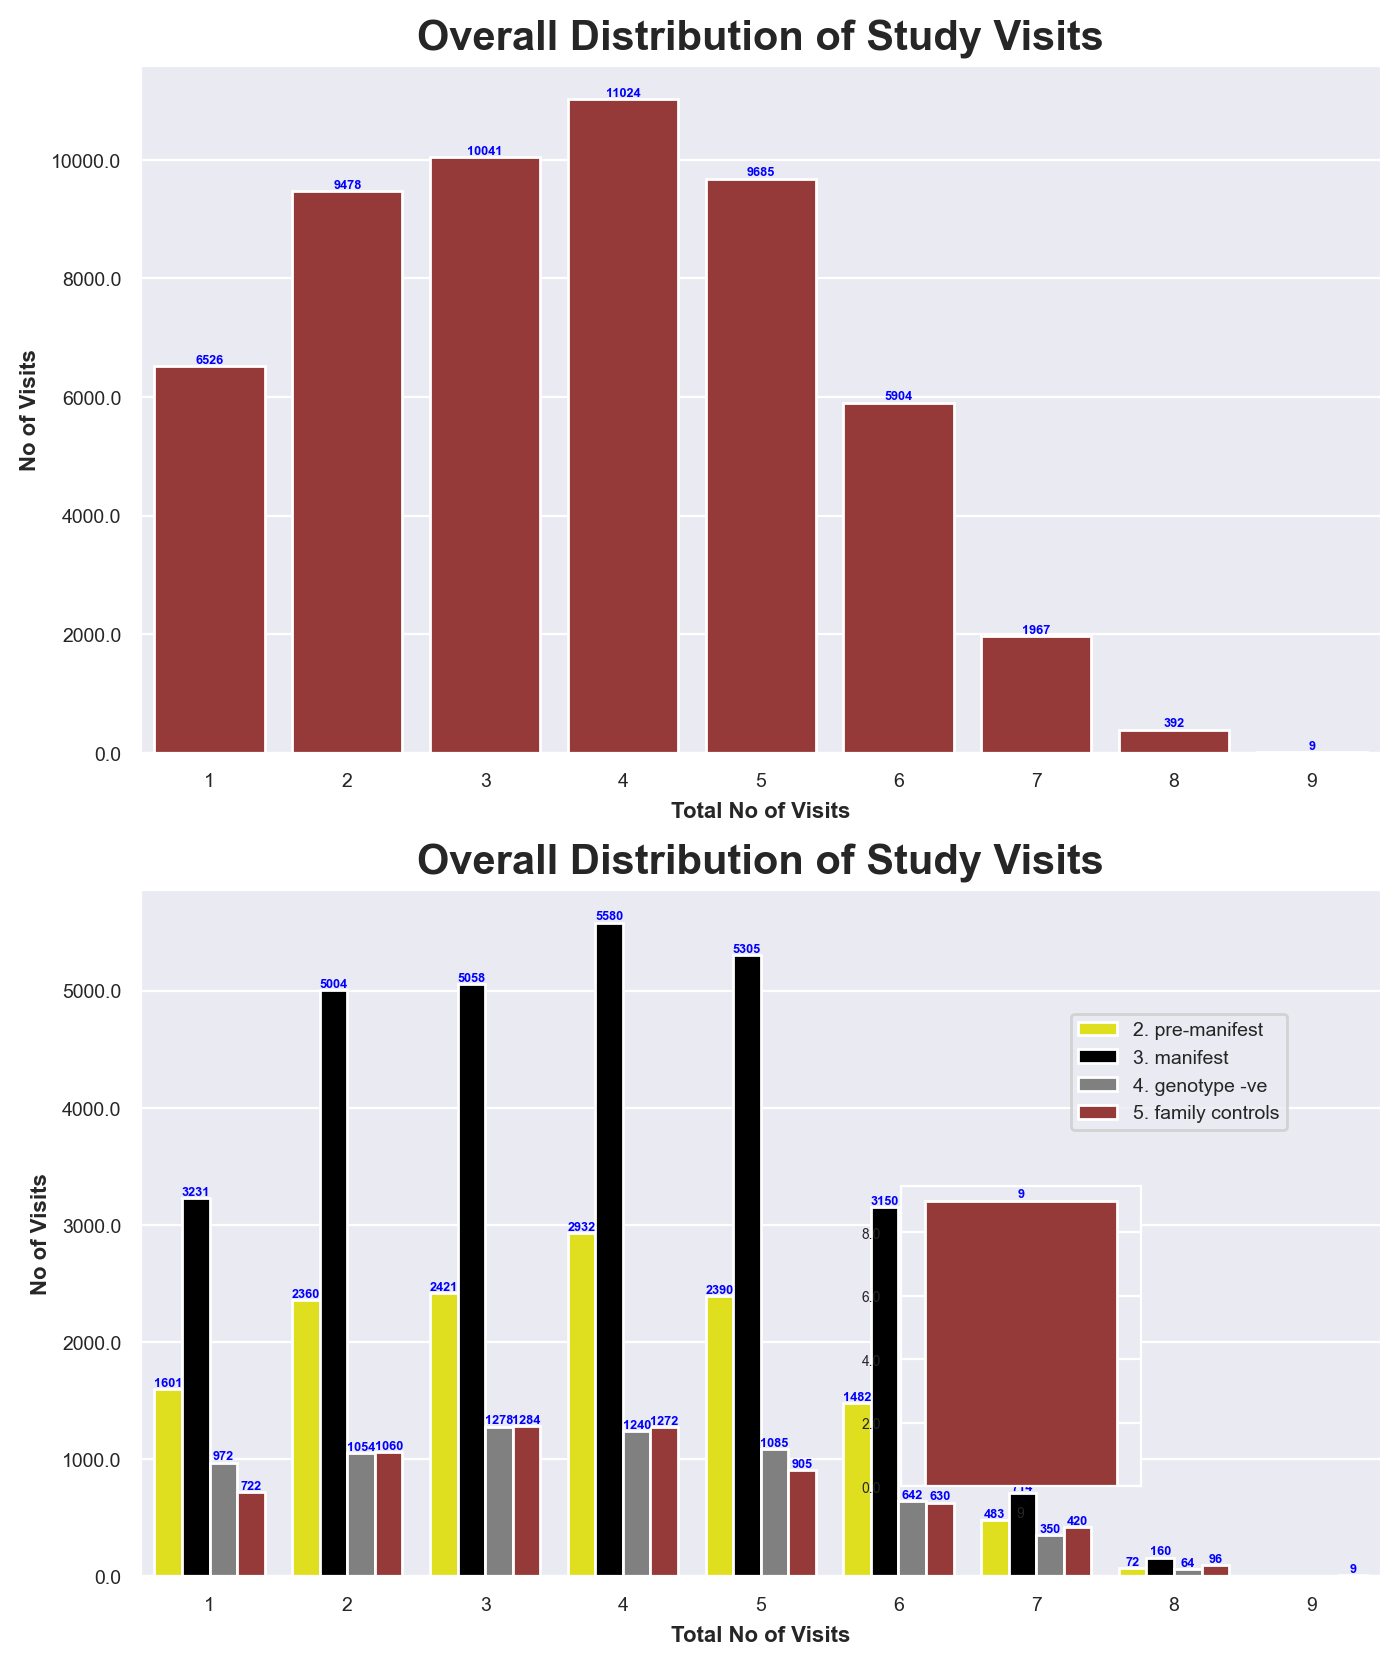

In [127]:
freq = proj.count_occurrences(main_df, ['visitnum'])
display(freq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(freq['visitnum'], freq['total_count'], axis=t,
                 plot_title='Overall Distribution of Study Visits', color='brown',
                 x_labe='Total No of Visits', y_labe='No of Visits', annot_size=4.6)

freq = proj.count_occurrences(main_df, ['visitnum', 'hd_status0'])
display(freq)

proj.plot_column(freq['visitnum'], freq['total_count'], freq['hd_status0'], axis=b,
                 plot_title='Overall Distribution of Study Visits', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Total No of Visits', y_labe='No of Visits', annot_size=4.6)

z = fig.add_axes([0.6, 0.17, 0.15, 0.15])
proj.plot_column(freq.loc[freq['visitnum'] >= 9, 'visitnum'], freq.loc[freq['visitnum'] >= 9, 'total_count'], 
                 freq.loc[freq['visitnum'] >= 9, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
                 plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum  total_count
0         1         6526
1         2         4739
2         3         3347
3         4         2756
4         5         1937
5         6          984
6         7          281
7         8           49
8         9            1

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


visitnum          hd_status0  total_count
0          1     2. pre-manifest         1601
1          1         3. manifest         3231
2          1     4. genotype -ve          972
3          1  5. family controls          722
4          2     2. pre-manifest         1180
5          2         3. manifest         2502
6          2     4. genotype -ve          527
7          2  5. family controls          530
8          3     2. pre-manifest          807
9          3         3. manifest         1686
10         3     4. genotype -ve          426
11         3  5. family controls          428
12         4     2. pre-manifest          733
13         4         3. manifest         1395
14         4     4. genotype -ve          310
15         4  5. family controls          318
16         5     2. pre-manifest          478
17         5         3. manifest         1061
18         5     4. genotype -ve          217
19         5  5. family controls          181
20         6     2. pre-manifest          247
21         6         3. manifest          525
22         6     4. genotype -ve          107
23         6  5. family controls          105
24         7     2. pre-manifest           69
25         7         3. manifest          102
26         7     4. genotype -ve           50
27         7  5. family controls           60
28         8     2. pre-manifest            9
29         8         3. manifest           20
30         8     4. genotype -ve            8
31         8  5. family controls           12
32         9  5. family controls            1

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<Axes:xlabel=' ', ylabel=' '>

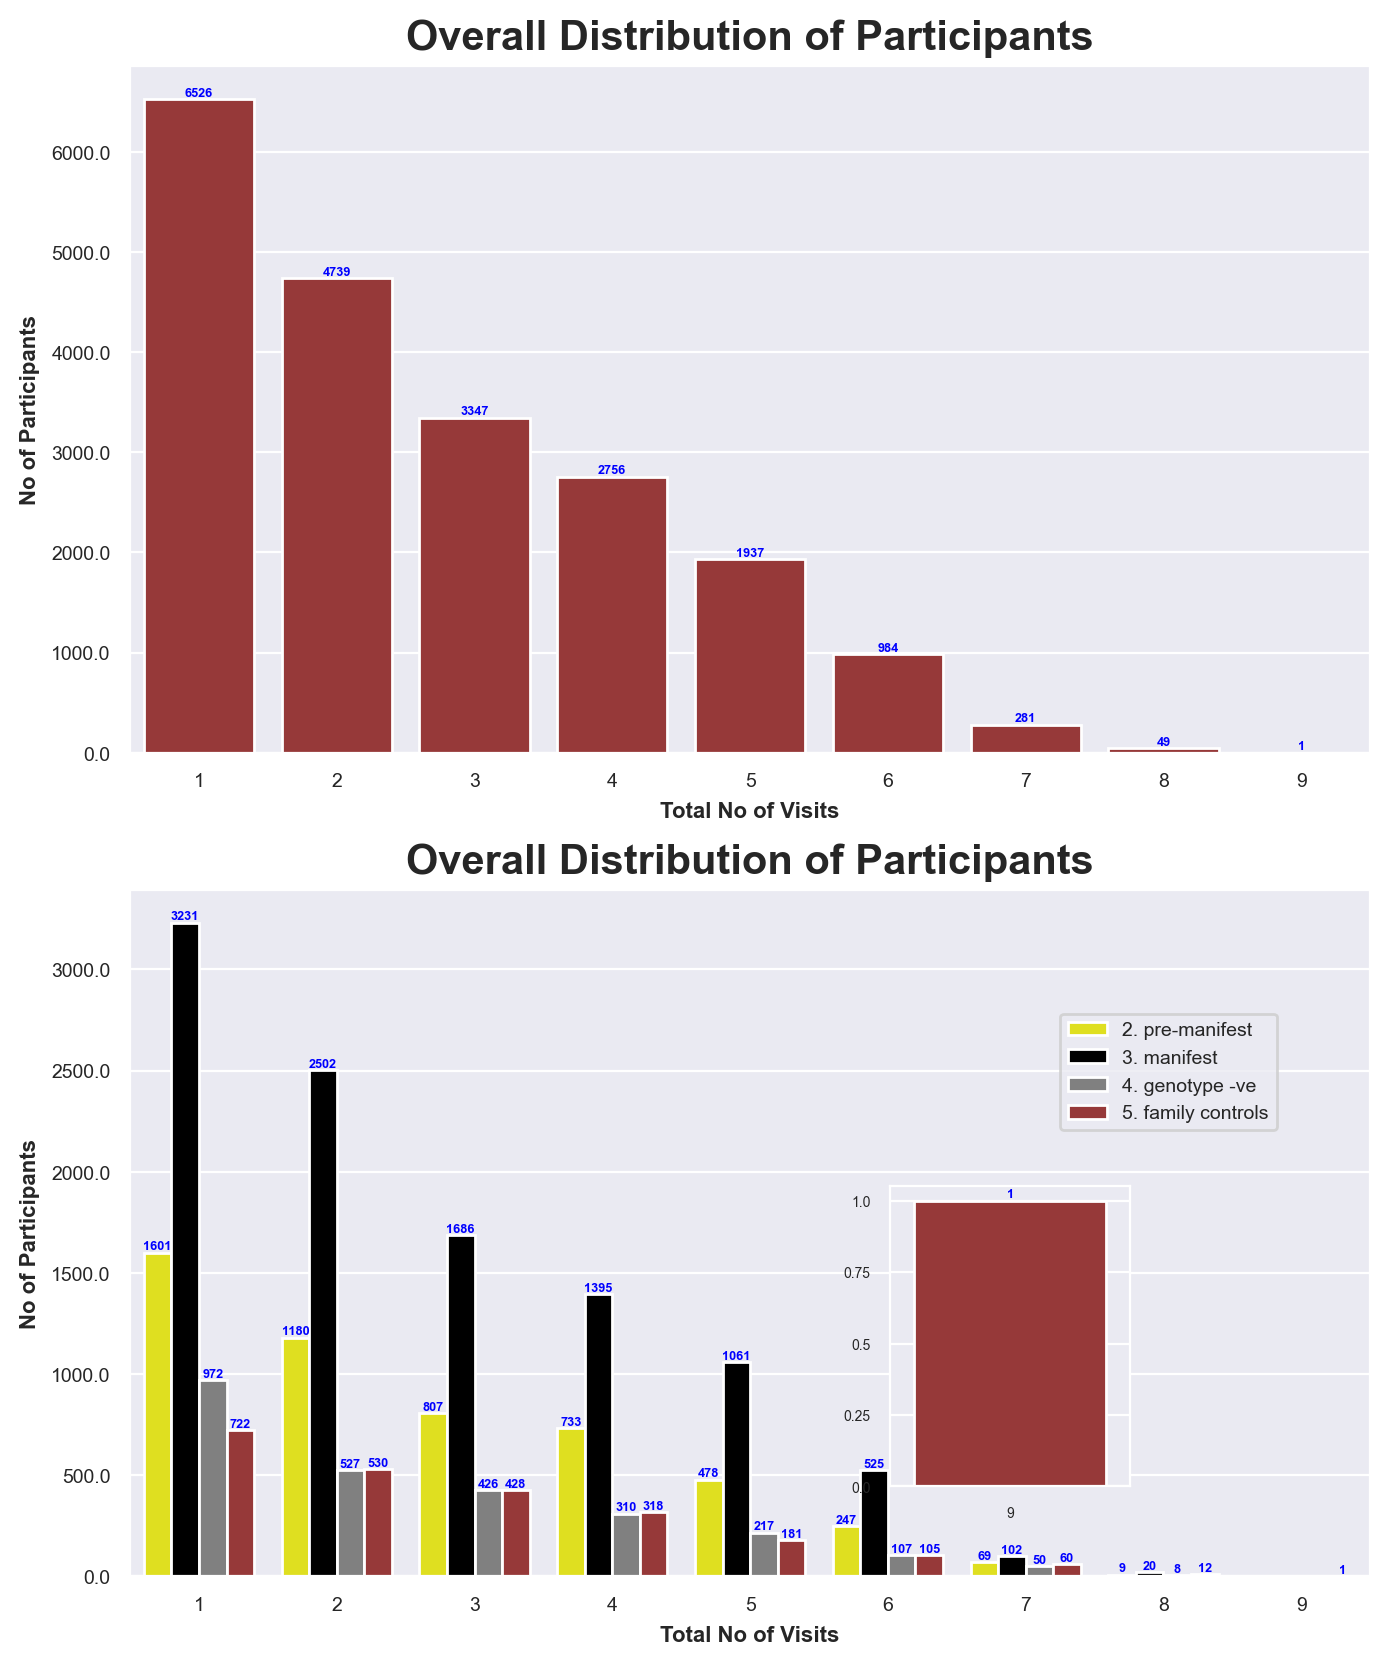

In [128]:
freq = proj.count_occurrences(all_vis, ['visitnum'])
display(freq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(freq['visitnum'], freq['total_count'], axis=t,
                 plot_title='Overall Distribution of Participants', color='brown',
                 x_labe='Total No of Visits', y_labe='No of Participants', annot_size=4.6)

freq = proj.count_occurrences(all_vis, ['visitnum', 'hd_status0'])
display(freq)

proj.plot_column(freq['visitnum'], freq['total_count'], freq['hd_status0'], axis=b,
                 plot_title='Overall Distribution of Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Total No of Visits', y_labe='No of Participants', annot_size=4.6)

z = fig.add_axes([0.6, 0.17, 0.15, 0.15])
proj.plot_column(freq.loc[freq['visitnum'] >= 9, 'visitnum'], freq.loc[freq['visitnum'] >= 9, 'total_count'], 
                 freq.loc[freq['visitnum'] >= 9, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
                 plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum  total_count
0         6          982
1         7          281
2         8           49
3         9            1

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


visitnum          hd_status0  total_count
0          6     2. pre-manifest          247
1          6         3. manifest          523
2          6     4. genotype -ve          107
3          6  5. family controls          105
4          7     2. pre-manifest           69
5          7         3. manifest          102
6          7     4. genotype -ve           50
7          7  5. family controls           60
8          8     2. pre-manifest            9
9          8         3. manifest           20
10         8     4. genotype -ve            8
11         8  5. family controls           12
12         9  5. family controls            1

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<Axes:xlabel=' ', ylabel=' '>

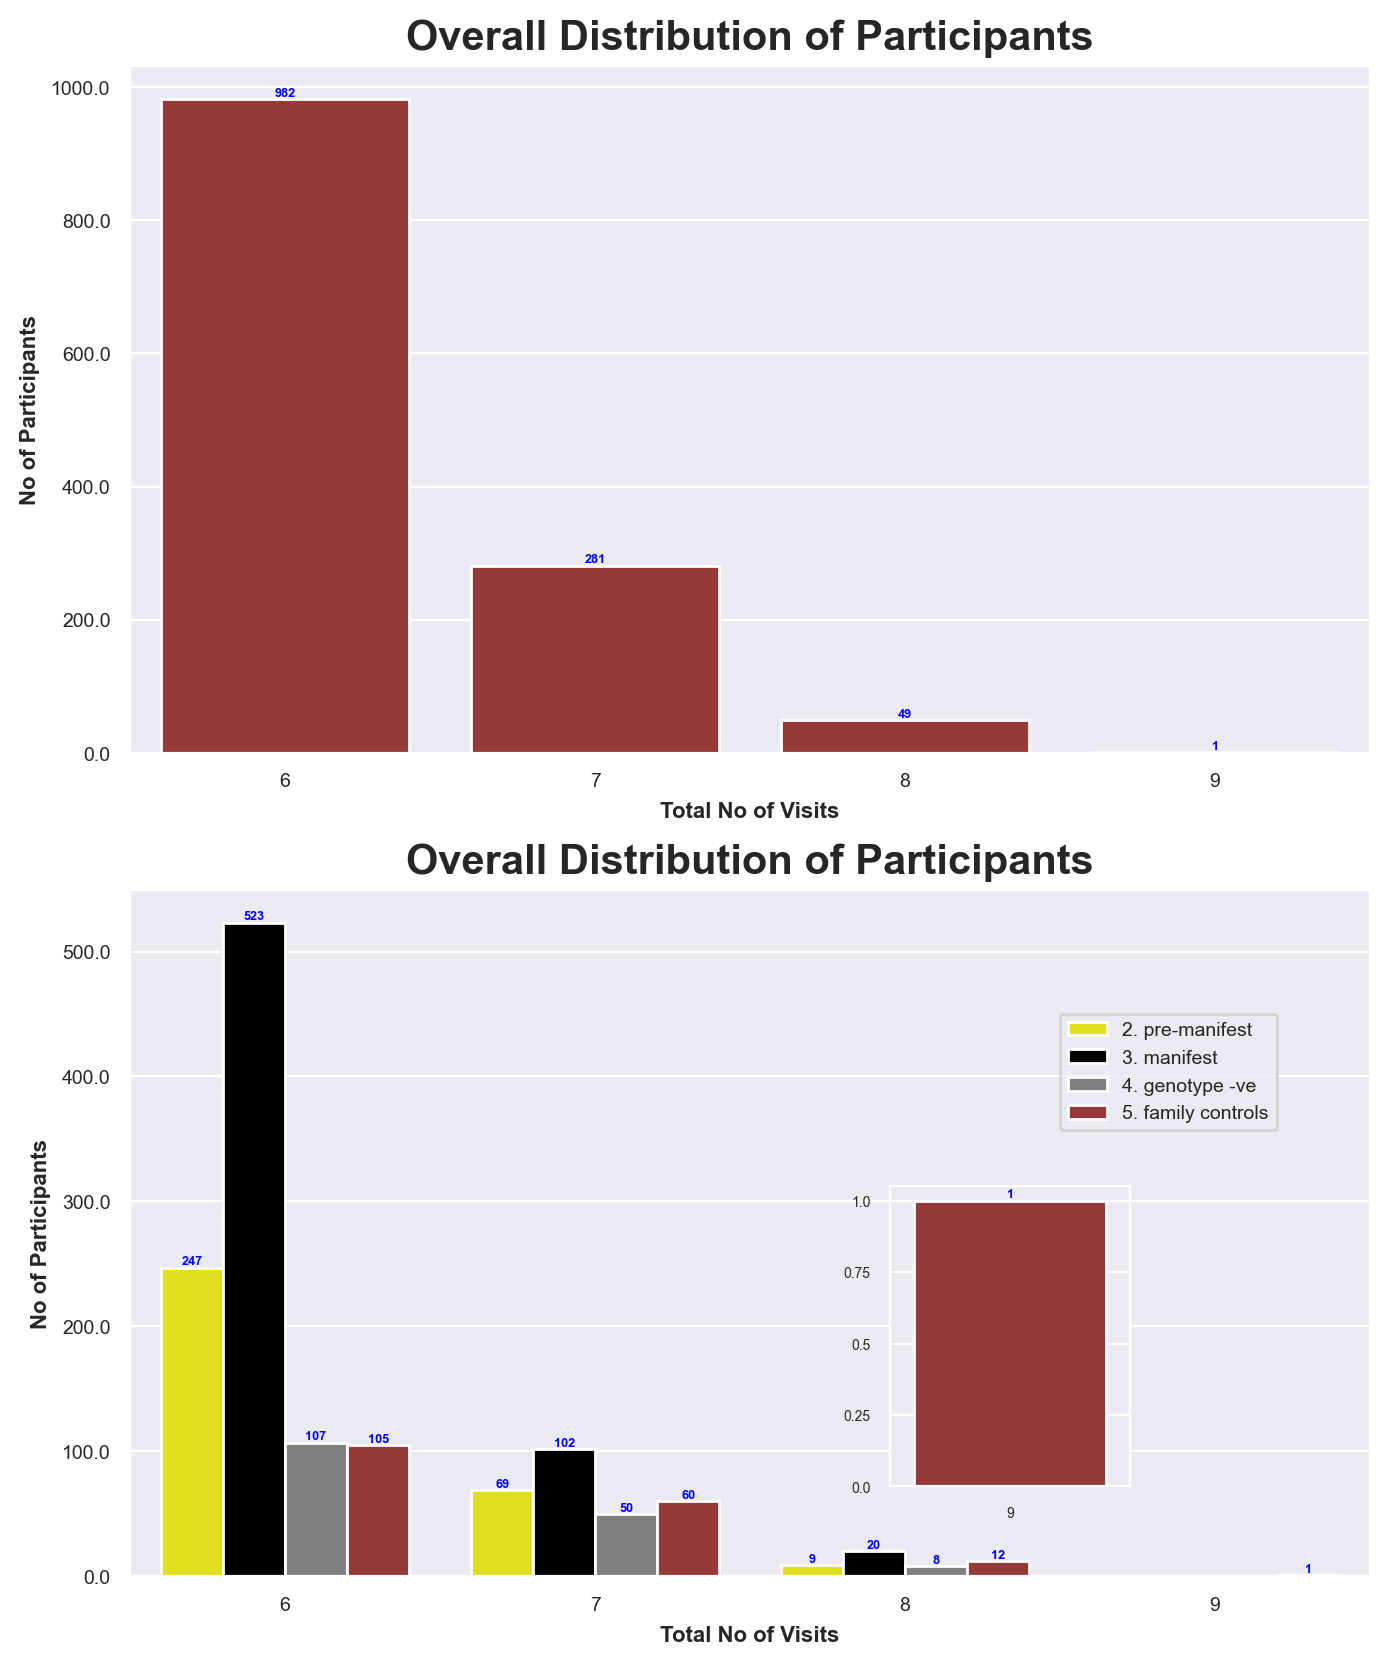

In [129]:
freq = proj.count_occurrences(first6_vis, ['visitnum'])
display(freq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(freq['visitnum'], freq['total_count'], axis=t,
                 plot_title='Overall Distribution of Participants', color='brown',
                 x_labe='Total No of Visits', y_labe='No of Participants', annot_size=4.6)

freq = proj.count_occurrences(first6_vis, ['visitnum', 'hd_status0'])
display(freq)

proj.plot_column(freq['visitnum'], freq['total_count'], freq['hd_status0'], axis=b,
                 plot_title='Overall Distribution of Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Total No of Visits', y_labe='No of Participants', annot_size=4.6)

z = fig.add_axes([0.6, 0.17, 0.15, 0.15])
proj.plot_column(freq.loc[freq['visitnum'] >= 9, 'visitnum'], freq.loc[freq['visitnum'] >= 9, 'total_count'], 
                 freq.loc[freq['visitnum'] >= 9, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
                 plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum  total_count
0         6          835
1         7          261
2         8           43
3         9            1

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


visitnum          hd_status0  total_count
0          6     2. pre-manifest          208
1          6         3. manifest          432
2          6     4. genotype -ve           91
3          6  5. family controls          104
4          7     2. pre-manifest           59
5          7         3. manifest           97
6          7     4. genotype -ve           45
7          7  5. family controls           60
8          8     2. pre-manifest            7
9          8         3. manifest           17
10         8     4. genotype -ve            8
11         8  5. family controls           11
12         9  5. family controls            1

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<Axes:xlabel=' ', ylabel=' '>

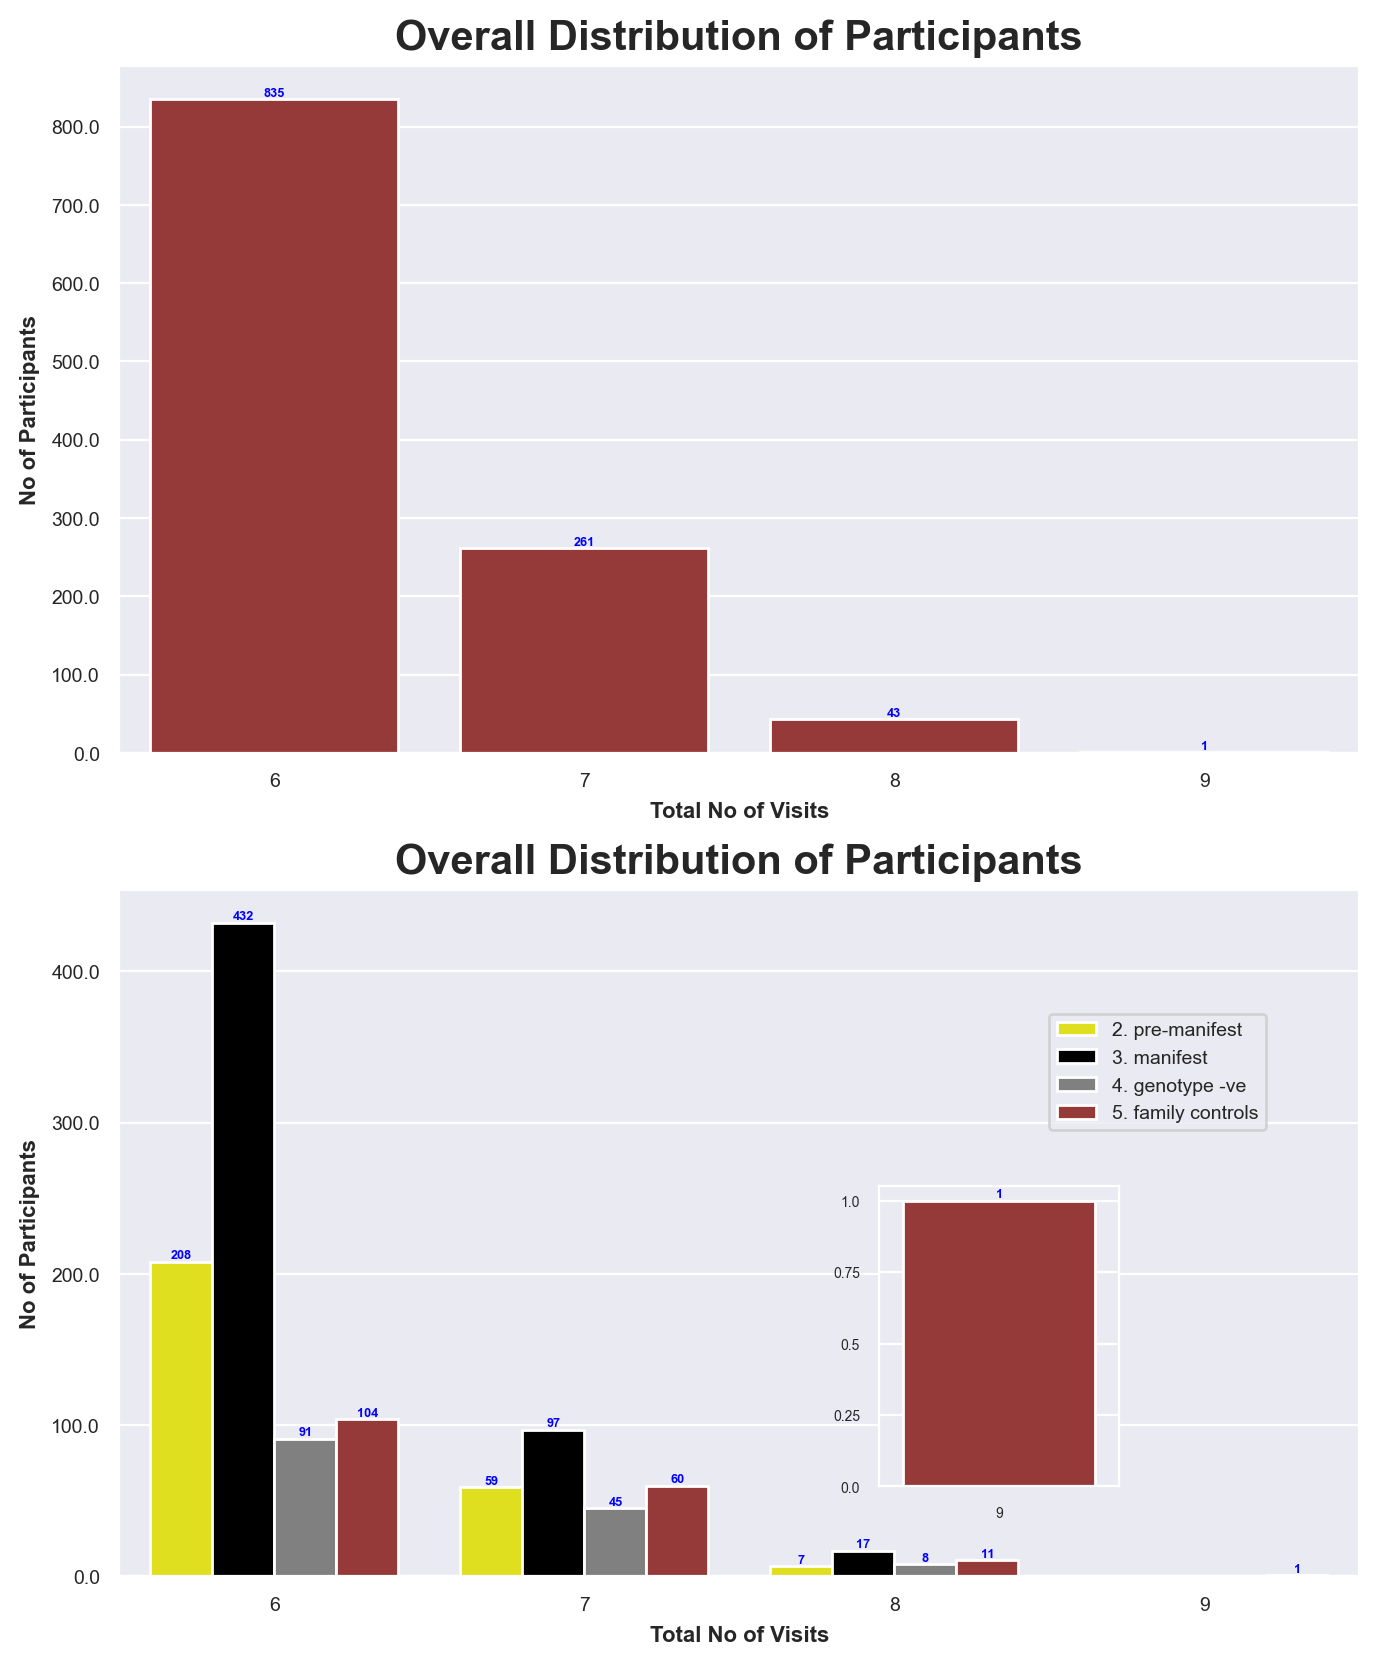

In [130]:
cond = ((first6_vis['is_high_calorie'] == 0) &
        (first6_vis['received_swallowing_therapy'] == 0) &
        (first6_vis['baseline_age_above29'] == 1))
freq = proj.count_occurrences(first6_vis.loc[cond], ['visitnum'])
display(freq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(freq['visitnum'], freq['total_count'], axis=t,
                 plot_title='Overall Distribution of Participants', color='brown',
                 x_labe='Total No of Visits', y_labe='No of Participants', annot_size=4.6)

freq = proj.count_occurrences(first6_vis.loc[cond], ['visitnum', 'hd_status0'])
display(freq)

proj.plot_column(freq['visitnum'], freq['total_count'], freq['hd_status0'], axis=b,
                 plot_title='Overall Distribution of Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Total No of Visits', y_labe='No of Participants', annot_size=4.6)

z = fig.add_axes([0.6, 0.17, 0.15, 0.15])
proj.plot_column(freq.loc[freq['visitnum'] >= 9, 'visitnum'], freq.loc[freq['visitnum'] >= 9, 'total_count'], 
                 freq.loc[freq['visitnum'] >= 9, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
                 plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

In [131]:
first6_vis.loc[cond, 'hd_status0'].value_counts().sort_index()

2. pre-manifest       274
3. manifest           546
4. genotype -ve       144
5. family controls    176
Name: hd_status0, dtype: int64

visitnum is_male  total_count
0          1       f         3615
1          1       m         2911
2          2       f         5286
3          2       m         4192
4          3       f         5682
5          3       m         4359
6          4       f         6164
7          4       m         4860
8          5       f         5500
9          5       m         4185
10         6       f         3144
11         6       m         2760
12         7       f         1148
13         7       m          819
14         8       f          208
15         8       m          184
16         9       f            9

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Overall Distribution of Visits'}, xlabel='Visit', ylabel='No of Visits'>

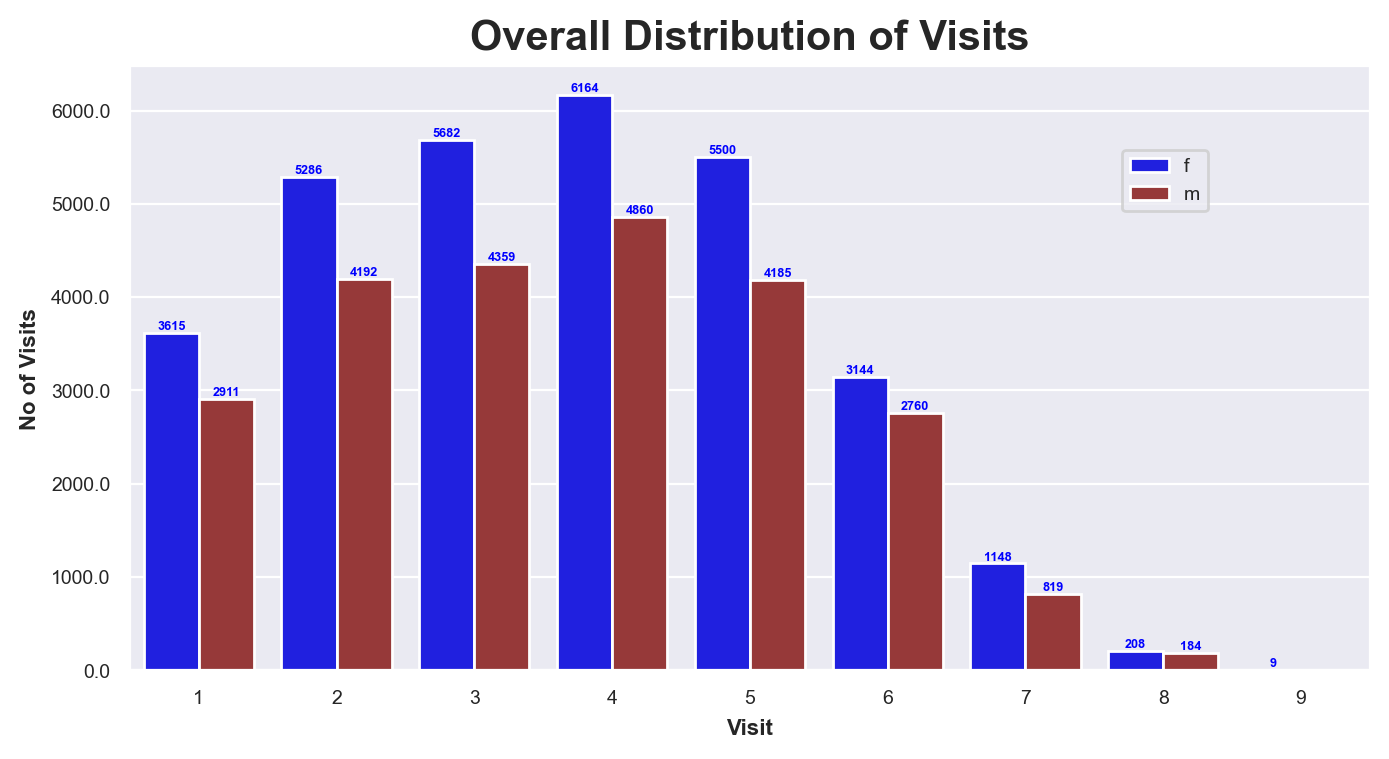

In [132]:
freq = proj.replace_value_with(proj.count_occurrences(main_df, ['visitnum', 'is_male']),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)

fig, ax1 = plt.subplots(figsize=[8, 4], dpi=200)
proj.plot_column(freq['visitnum'], freq['total_count'], freq['is_male'], axis=ax1, show_legend_at=[0.8, 0.76],
                 plot_title='Overall Distribution of Visits', paletter=proj.gender_cmap,
                 x_labe='Visit', y_labe='No of Visits', annot_size=4.6)

# z = fig.add_axes([0.75, 0.35, 0.15, 0.15])
# proj.plot_column(freq.loc[freq['visitnum'] >= 11, 'visitnum'], freq.loc[freq['visitnum'] >= 11, 'total_count'], 
#                  freq.loc[freq['visitnum'] >= 11, 'is_male'], 
#                  plot_title='Zoomed View', title_size=10, axis=z, paletter=proj.gender_cmap,
#                  x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum is_male  total_count
0          1       f         3615
1          1       m         2911
2          2       f         2643
3          2       m         2096
4          3       f         1894
5          3       m         1453
6          4       f         1541
7          4       m         1215
8          5       f         1100
9          5       m          837
10         6       f          524
11         6       m          460
12         7       f          164
13         7       m          117
14         8       f           26
15         8       m           23
16         9       f            1

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Distribution of Participants'}, xlabel='Visit', ylabel='No of Participants'>

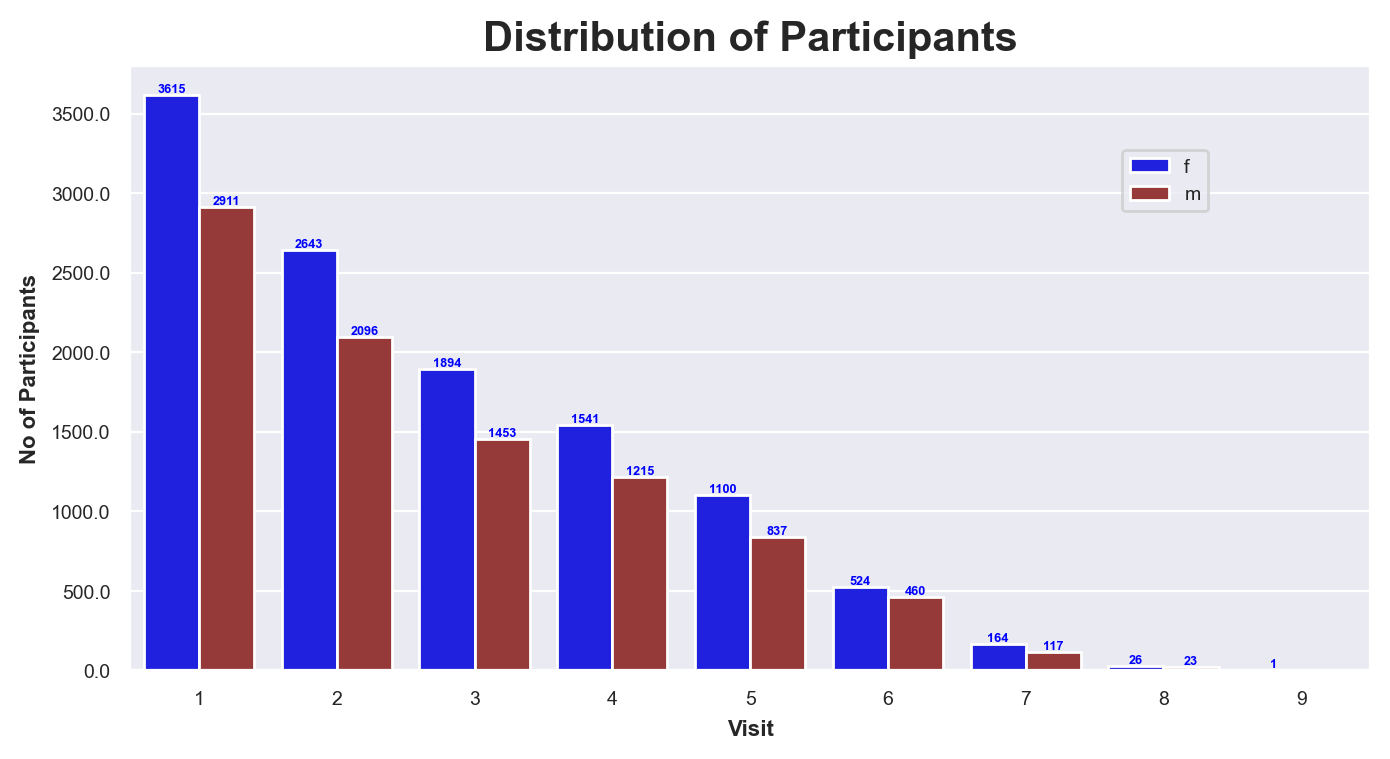

In [133]:
freq = proj.replace_value_with(proj.count_occurrences(all_vis, ['visitnum', 'is_male']),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)

fig, ax1 = plt.subplots(figsize=[8, 4], dpi=200)
proj.plot_column(freq['visitnum'], freq['total_count'], freq['is_male'], axis=ax1, show_legend_at=[0.8, 0.76],
                 plot_title='Distribution of Participants', paletter=proj.gender_cmap,
                 x_labe='Visit', y_labe='No of Participants', annot_size=4.6)

# z = fig.add_axes([0.75, 0.35, 0.15, 0.15])
# proj.plot_column(freq.loc[freq['visitnum'] >= 11, 'visitnum'], freq.loc[freq['visitnum'] >= 11, 'total_count'], 
#                  freq.loc[freq['visitnum'] >= 11, 'is_male'], 
#                  plot_title='Zoomed View', title_size=10, axis=z, paletter=proj.gender_cmap,
#                  x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum is_male          hd_status0  total_count
0          1       f     2. pre-manifest          969
1          1       f         3. manifest         1643
2          1       f     4. genotype -ve          594
3          1       f  5. family controls          409
4          1       m     2. pre-manifest          632
..       ...     ...                 ...          ...
60         8       m     2. pre-manifest           32
61         8       m         3. manifest           96
62         8       m     4. genotype -ve            8
63         8       m  5. family controls           48
64         9       f  5. family controls            9

[65 rows x 4 columns]

visitnum is_male          hd_status0  total_count
4          1       m     2. pre-manifest          632
5          1       m         3. manifest         1588
6          1       m     4. genotype -ve          378
7          1       m  5. family controls          313
12         2       m     2. pre-manifest          966
13         2       m         3. manifest         2410
14         2       m     4. genotype -ve          362
15         2       m  5. family controls          454
20         3       m     2. pre-manifest          984
21         3       m         3. manifest         2376
22         3       m     4. genotype -ve          405
23         3       m  5. family controls          594
28         4       m     2. pre-manifest         1212
29         4       m         3. manifest         2688
30         4       m     4. genotype -ve          424
31         4       m  5. family controls          536
36         5       m     2. pre-manifest          875
37         5       m         3. manifest         2615
38         5       m     4. genotype -ve          320
39         5       m  5. family controls          375
44         6       m     2. pre-manifest          642
45         6       m         3. manifest         1656
46         6       m     4. genotype -ve          210
47         6       m  5. family controls          252
52         7       m     2. pre-manifest          182
53         7       m         3. manifest          371
54         7       m     4. genotype -ve          105
55         7       m  5. family controls          161
60         8       m     2. pre-manifest           32
61         8       m         3. manifest           96
62         8       m     4. genotype -ve            8
63         8       m  5. family controls           48

visitnum is_male          hd_status0  total_count
0          1       f     2. pre-manifest          969
1          1       f         3. manifest         1643
2          1       f     4. genotype -ve          594
3          1       f  5. family controls          409
8          2       f     2. pre-manifest         1394
9          2       f         3. manifest         2594
10         2       f     4. genotype -ve          692
11         2       f  5. family controls          606
16         3       f     2. pre-manifest         1437
17         3       f         3. manifest         2682
18         3       f     4. genotype -ve          873
19         3       f  5. family controls          690
24         4       f     2. pre-manifest         1720
25         4       f         3. manifest         2892
26         4       f     4. genotype -ve          816
27         4       f  5. family controls          736
32         5       f     2. pre-manifest         1515
33         5       f         3. manifest         2690
34         5       f     4. genotype -ve          765
35         5       f  5. family controls          530
40         6       f     2. pre-manifest          840
41         6       f         3. manifest         1494
42         6       f     4. genotype -ve          432
43         6       f  5. family controls          378
48         7       f     2. pre-manifest          301
49         7       f         3. manifest          343
50         7       f     4. genotype -ve          245
51         7       f  5. family controls          259
56         8       f     2. pre-manifest           40
57         8       f         3. manifest           64
58         8       f     4. genotype -ve           56
59         8       f  5. family controls           48
64         9       f  5. family controls            9

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Overall Female Visits'}, xlabel='Visit', ylabel='No of Visits'>

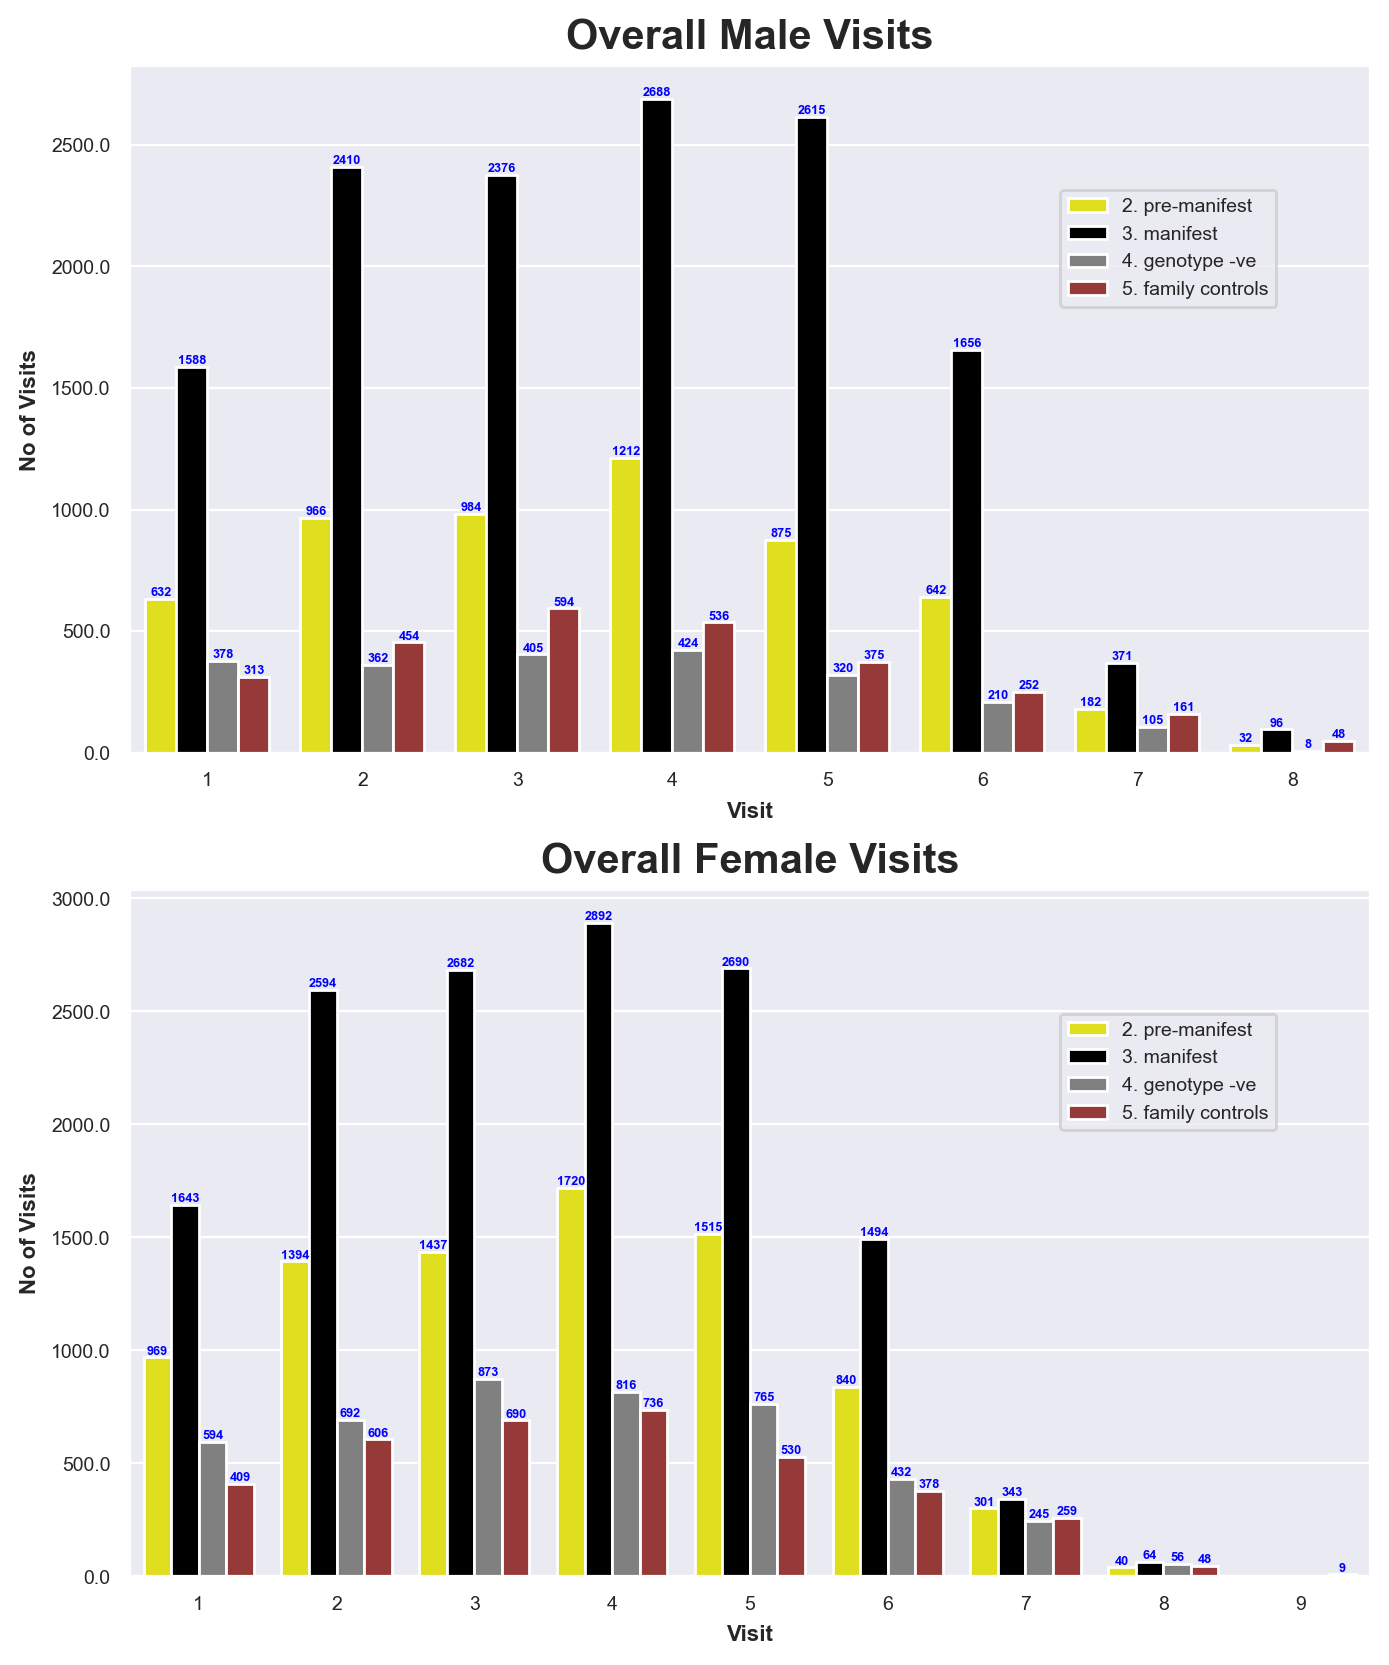

In [134]:
freq = proj.replace_value_with(proj.count_occurrences(main_df, ['visitnum', 'is_male', 'hd_status0']),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)

mfreq = freq.loc[freq['is_male'] == 'm']
ffreq = freq.loc[freq['is_male'] == 'f']
display(mfreq, ffreq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(mfreq['visitnum'], mfreq['total_count'], mfreq['hd_status0'], axis=t,
                 plot_title='Overall Male Visits', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Visit', y_labe='No of Visits', annot_size=4.6)

# z = fig.add_axes([0.73, 0.59, 0.15, 0.15])
# proj.plot_column(mfreq.loc[freq['visitnum'] >= 10, 'visitnum'], mfreq.loc[freq['visitnum'] >= 10, 'total_count'], 
#                  mfreq.loc[freq['visitnum'] >= 10, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
#                  plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

proj.plot_column(ffreq['visitnum'], ffreq['total_count'], ffreq['hd_status0'], axis=b,
                 plot_title='Overall Female Visits', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Visit', y_labe='No of Visits', annot_size=4.6)

# z = fig.add_axes([0.73, 0.19, 0.15, 0.15])
# proj.plot_column(ffreq.loc[freq['visitnum'] >= 10, 'visitnum'], ffreq.loc[freq['visitnum'] >= 10, 'total_count'], 
#                  ffreq.loc[freq['visitnum'] >= 10, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
#                  plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum is_male          hd_status0  total_count
0          1       f     2. pre-manifest          969
1          1       f         3. manifest         1643
2          1       f     4. genotype -ve          594
3          1       f  5. family controls          409
4          1       m     2. pre-manifest          632
..       ...     ...                 ...          ...
60         8       m     2. pre-manifest            4
61         8       m         3. manifest           12
62         8       m     4. genotype -ve            1
63         8       m  5. family controls            6
64         9       f  5. family controls            1

[65 rows x 4 columns]

visitnum is_male          hd_status0  total_count
4          1       m     2. pre-manifest          632
5          1       m         3. manifest         1588
6          1       m     4. genotype -ve          378
7          1       m  5. family controls          313
12         2       m     2. pre-manifest          483
13         2       m         3. manifest         1205
14         2       m     4. genotype -ve          181
15         2       m  5. family controls          227
20         3       m     2. pre-manifest          328
21         3       m         3. manifest          792
22         3       m     4. genotype -ve          135
23         3       m  5. family controls          198
28         4       m     2. pre-manifest          303
29         4       m         3. manifest          672
30         4       m     4. genotype -ve          106
31         4       m  5. family controls          134
36         5       m     2. pre-manifest          175
37         5       m         3. manifest          523
38         5       m     4. genotype -ve           64
39         5       m  5. family controls           75
44         6       m     2. pre-manifest          107
45         6       m         3. manifest          276
46         6       m     4. genotype -ve           35
47         6       m  5. family controls           42
52         7       m     2. pre-manifest           26
53         7       m         3. manifest           53
54         7       m     4. genotype -ve           15
55         7       m  5. family controls           23
60         8       m     2. pre-manifest            4
61         8       m         3. manifest           12
62         8       m     4. genotype -ve            1
63         8       m  5. family controls            6

visitnum is_male          hd_status0  total_count
0          1       f     2. pre-manifest          969
1          1       f         3. manifest         1643
2          1       f     4. genotype -ve          594
3          1       f  5. family controls          409
8          2       f     2. pre-manifest          697
9          2       f         3. manifest         1297
10         2       f     4. genotype -ve          346
11         2       f  5. family controls          303
16         3       f     2. pre-manifest          479
17         3       f         3. manifest          894
18         3       f     4. genotype -ve          291
19         3       f  5. family controls          230
24         4       f     2. pre-manifest          430
25         4       f         3. manifest          723
26         4       f     4. genotype -ve          204
27         4       f  5. family controls          184
32         5       f     2. pre-manifest          303
33         5       f         3. manifest          538
34         5       f     4. genotype -ve          153
35         5       f  5. family controls          106
40         6       f     2. pre-manifest          140
41         6       f         3. manifest          249
42         6       f     4. genotype -ve           72
43         6       f  5. family controls           63
48         7       f     2. pre-manifest           43
49         7       f         3. manifest           49
50         7       f     4. genotype -ve           35
51         7       f  5. family controls           37
56         8       f     2. pre-manifest            5
57         8       f         3. manifest            8
58         8       f     4. genotype -ve            7
59         8       f  5. family controls            6
64         9       f  5. family controls            1

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Overall Female Participants'}, xlabel='Visit', ylabel='No of Participants'>

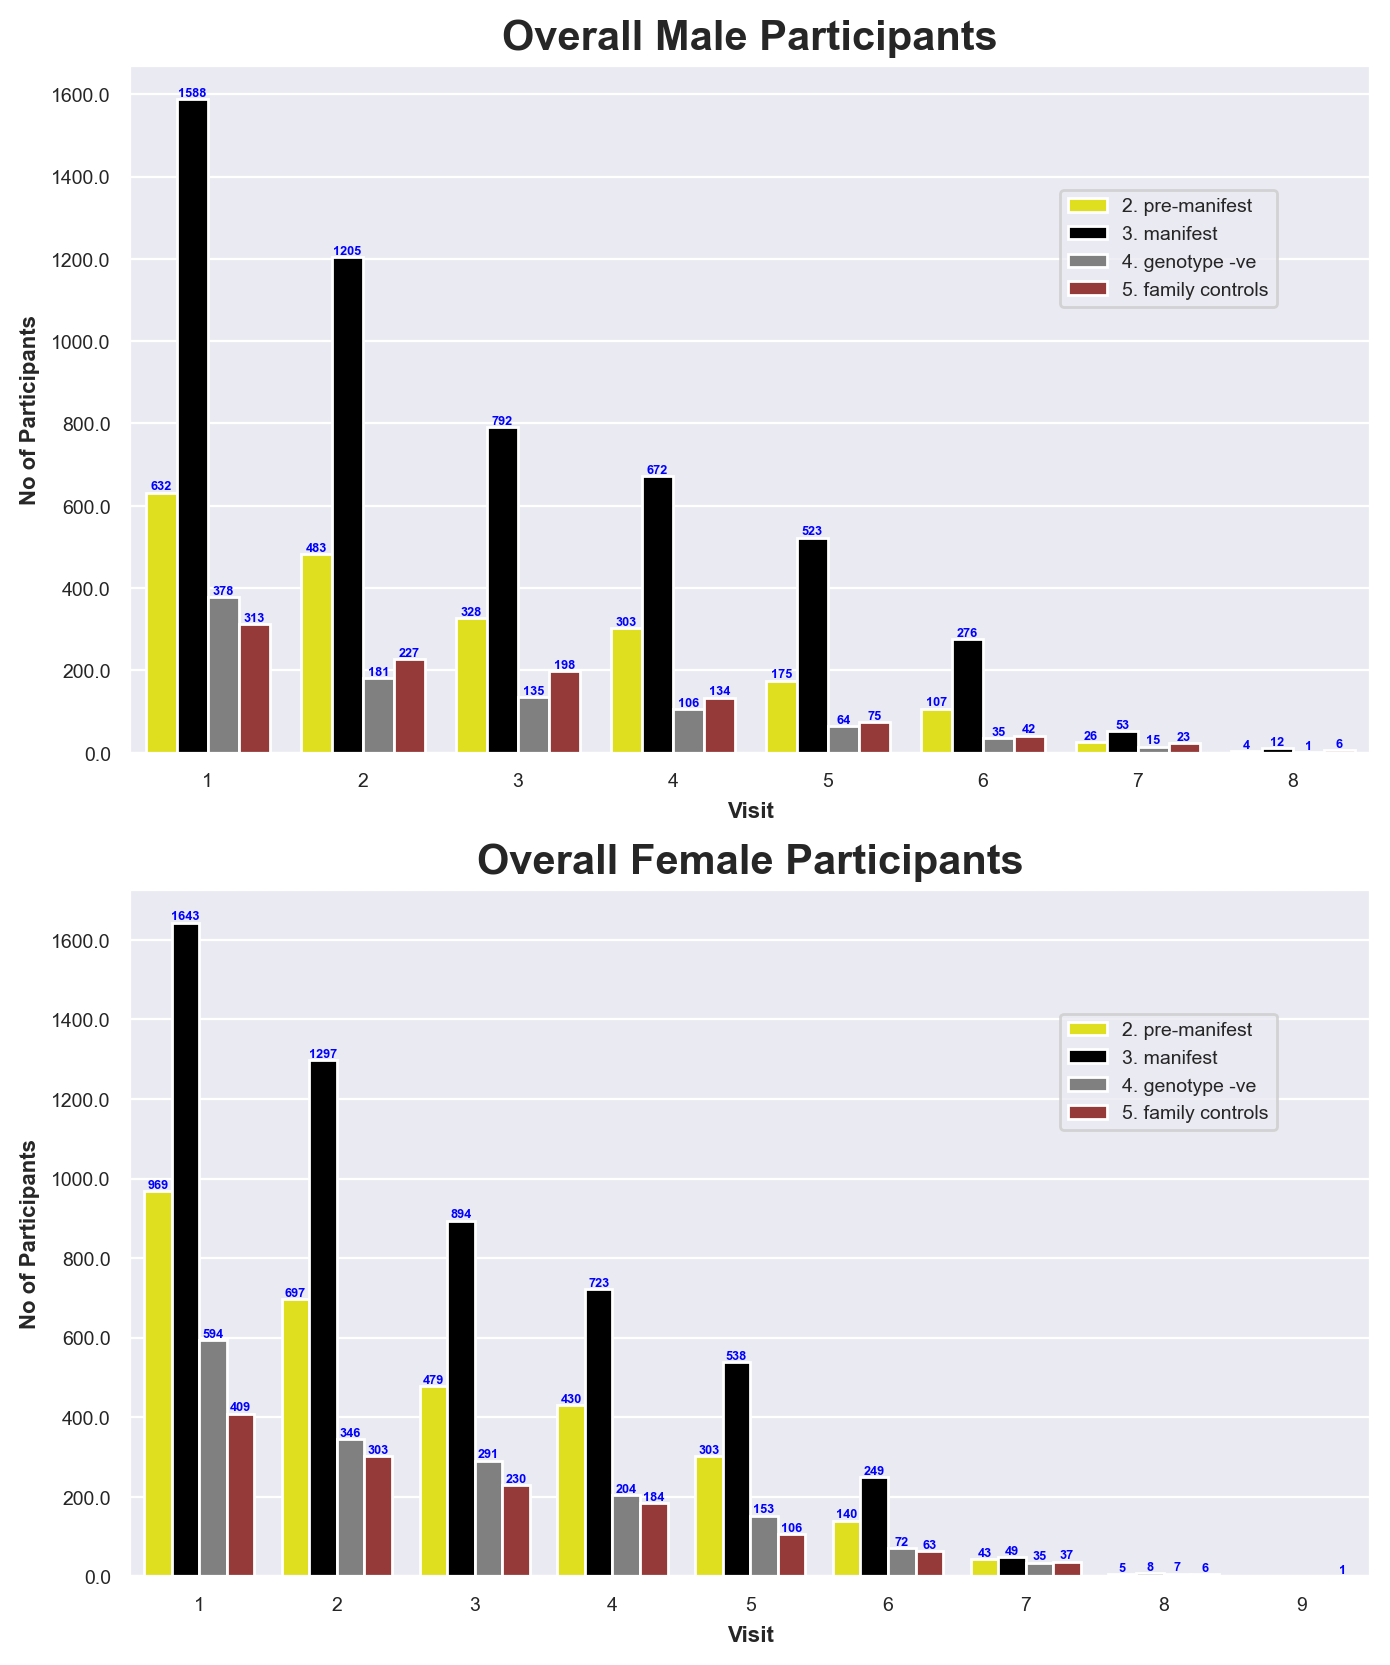

In [135]:
freq = proj.replace_value_with(proj.count_occurrences(all_vis, ['visitnum', 'is_male', 'hd_status0']),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)

mfreq = freq.loc[freq['is_male'] == 'm']
ffreq = freq.loc[freq['is_male'] == 'f']
display(mfreq, ffreq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(mfreq['visitnum'], mfreq['total_count'], mfreq['hd_status0'], axis=t,
                 plot_title='Overall Male Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Visit', y_labe='No of Participants', annot_size=4.6)

# z = fig.add_axes([0.73, 0.59, 0.15, 0.15])
# proj.plot_column(mfreq.loc[freq['visitnum'] >= 10, 'visitnum'], mfreq.loc[freq['visitnum'] >= 10, 'total_count'], 
#                  mfreq.loc[freq['visitnum'] >= 10, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
#                  plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

proj.plot_column(ffreq['visitnum'], ffreq['total_count'], ffreq['hd_status0'], axis=b,
                 plot_title='Overall Female Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.75, 0.65], x_labe='Visit', y_labe='No of Participants', annot_size=4.6)

# z = fig.add_axes([0.73, 0.19, 0.15, 0.15])
# proj.plot_column(ffreq.loc[freq['visitnum'] >= 10, 'visitnum'], ffreq.loc[freq['visitnum'] >= 10, 'total_count'], 
#                  ffreq.loc[freq['visitnum'] >= 10, 'hd_status0'], axis=z, paletter=proj.hd_status_cmap,
#                  plot_title=None, x_labe=' ', y_labe=' ', annot_size=4.6, xy_ticksize=5)

visitnum is_male          hd_status0  total_count
0          1       f     2. pre-manifest          969
1          1       f         3. manifest         1643
2          1       f     4. genotype -ve          594
3          1       f  5. family controls          409
4          1       m     2. pre-manifest          632
..       ...     ...                 ...          ...
60         8       m     2. pre-manifest            4
61         8       m         3. manifest           12
62         8       m     4. genotype -ve            1
63         8       m  5. family controls            6
64         9       f  5. family controls            1

[65 rows x 4 columns]

visitnum is_male          hd_status0  total_count  %total_count
0          1       m     2. pre-manifest          632          20.0
1          1       m         3. manifest         1588          50.0
2          1       m     4. genotype -ve          378          10.0
3          1       m  5. family controls          313          10.0
4          2       m     2. pre-manifest          483          20.0
5          2       m         3. manifest         1205          60.0
6          2       m     4. genotype -ve          181          10.0
7          2       m  5. family controls          227          10.0
8          3       m     2. pre-manifest          328          20.0
9          3       m         3. manifest          792          50.0
10         3       m     4. genotype -ve          135          10.0
11         3       m  5. family controls          198          10.0
12         4       m     2. pre-manifest          303          20.0
13         4       m         3. manifest          672          60.0
14         4       m     4. genotype -ve          106          10.0
15         4       m  5. family controls          134          10.0
16         5       m     2. pre-manifest          175          20.0
17         5       m         3. manifest          523          60.0
18         5       m     4. genotype -ve           64          10.0
19         5       m  5. family controls           75          10.0
20         6       m     2. pre-manifest          107          20.0
21         6       m         3. manifest          276          60.0
22         6       m     4. genotype -ve           35          10.0
23         6       m  5. family controls           42          10.0
24         7       m     2. pre-manifest           26          20.0
25         7       m         3. manifest           53          50.0
26         7       m     4. genotype -ve           15          10.0
27         7       m  5. family controls           23          20.0
28         8       m     2. pre-manifest            4          20.0
29         8       m         3. manifest           12          50.0
30         8       m     4. genotype -ve            1           0.0
31         8       m  5. family controls            6          30.0

visitnum is_male          hd_status0  total_count  %total_count
0          1       f     2. pre-manifest          969          30.0
1          1       f         3. manifest         1643          50.0
2          1       f     4. genotype -ve          594          20.0
3          1       f  5. family controls          409          10.0
4          2       f     2. pre-manifest          697          30.0
5          2       f         3. manifest         1297          50.0
6          2       f     4. genotype -ve          346          10.0
7          2       f  5. family controls          303          10.0
8          3       f     2. pre-manifest          479          30.0
9          3       f         3. manifest          894          50.0
10         3       f     4. genotype -ve          291          20.0
11         3       f  5. family controls          230          10.0
12         4       f     2. pre-manifest          430          30.0
13         4       f         3. manifest          723          50.0
14         4       f     4. genotype -ve          204          10.0
15         4       f  5. family controls          184          10.0
16         5       f     2. pre-manifest          303          30.0
17         5       f         3. manifest          538          50.0
18         5       f     4. genotype -ve          153          10.0
19         5       f  5. family controls          106          10.0
20         6       f     2. pre-manifest          140          30.0
21         6       f         3. manifest          249          50.0
22         6       f     4. genotype -ve           72          10.0
23         6       f  5. family controls           63          10.0
24         7       f     2. pre-manifest           43          30.0
25         7       f         3. manifest           49          30.0
26         7       f     4. genotype -ve           35          20.0
27         7       f  5. family controls           37          20.0
28         8       f     2. pre-manifest            5          20.0
29         8       f         3. manifest            8          30.0
30         8       f     4. genotype -ve            7          30.0
31         8       f  5. family controls            6          20.0
32         9       f  5. family controls            1         100.0

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Overall Female Participants'}, xlabel='Visit', ylabel='%No of Participants'>

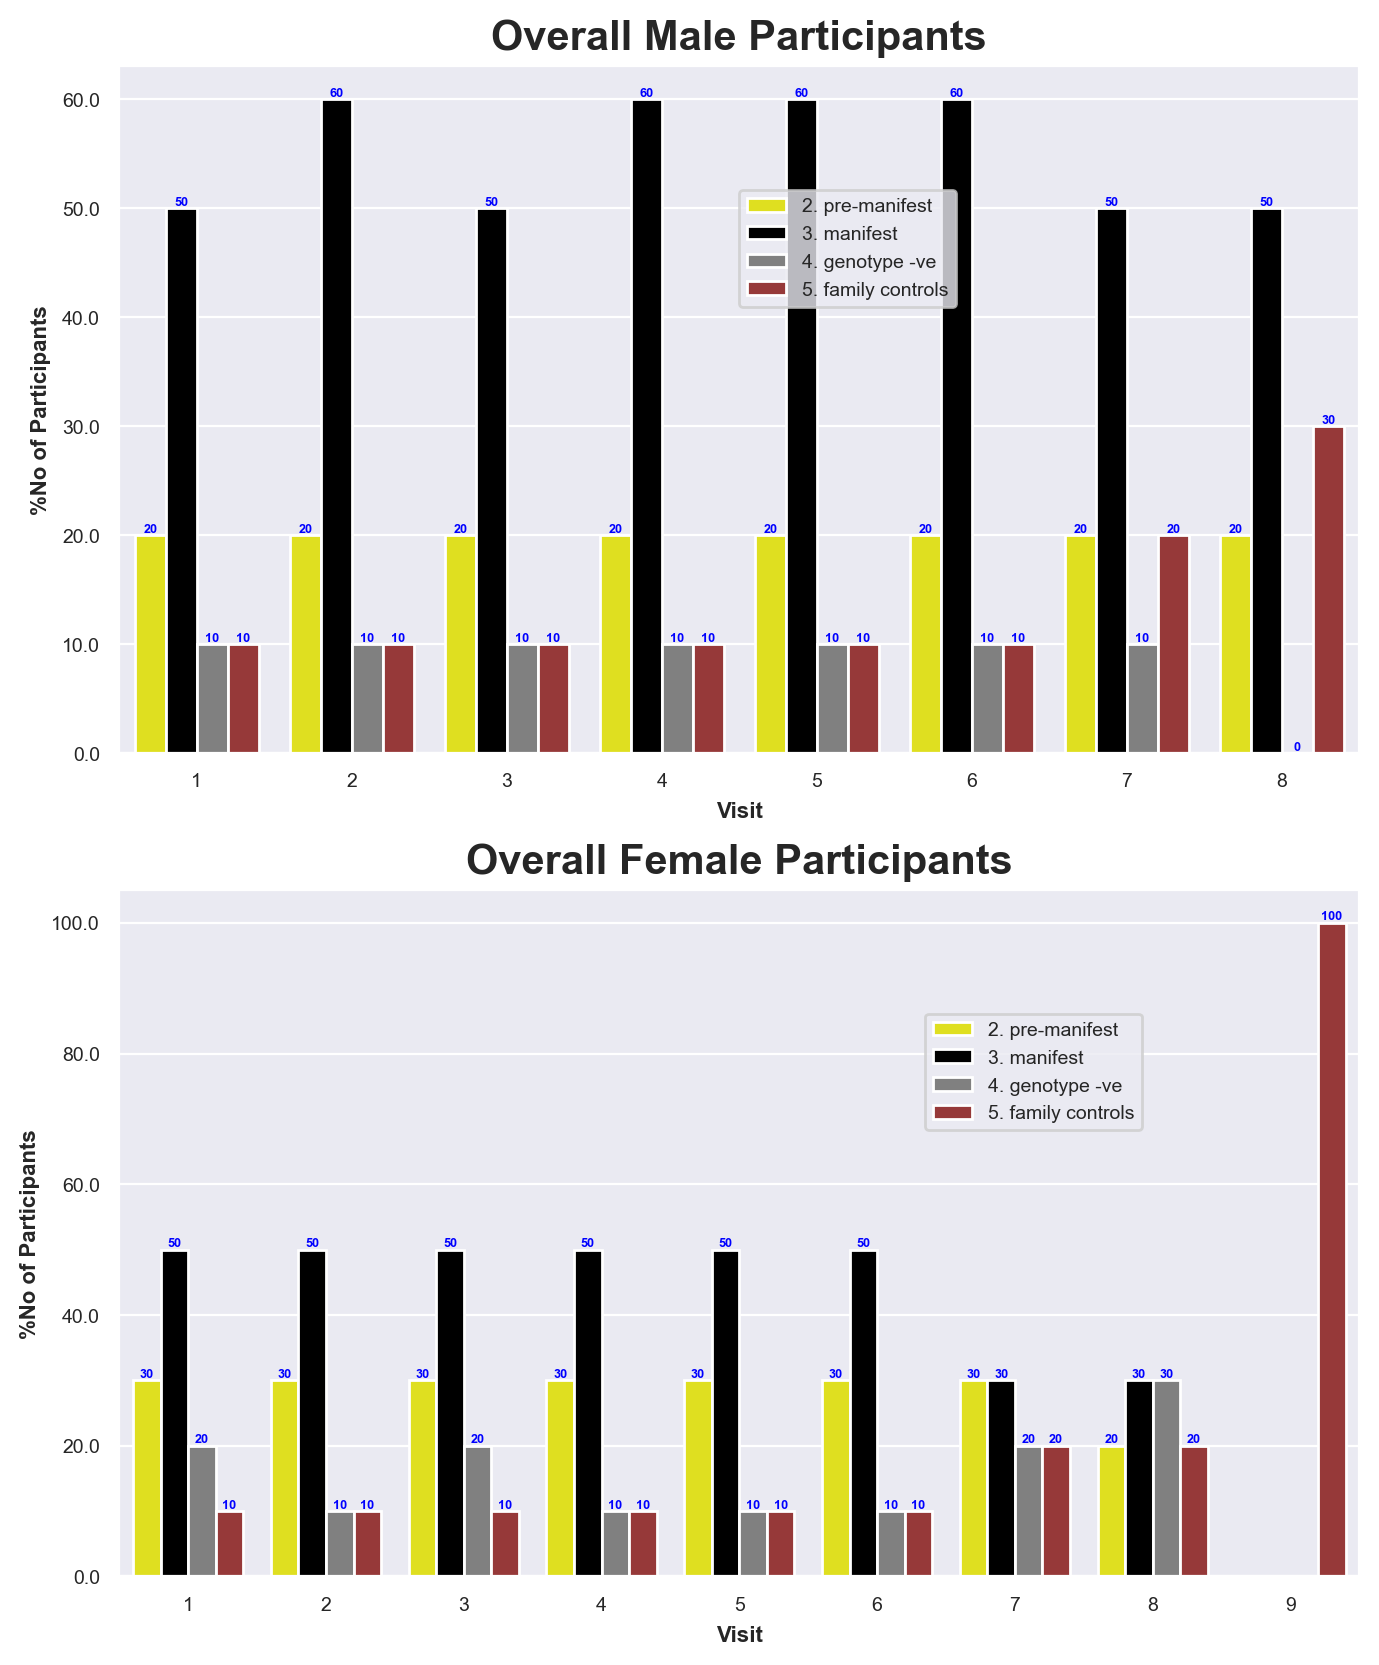

In [136]:
# in percentage
freq = proj.replace_value_with(proj.count_occurrences(all_vis, ['visitnum', 'is_male', 'hd_status0']),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)

mfreq = proj.get_subset_percentage(freq.loc[freq['is_male'] == 'm'], 'total_count', 'visitnum', precision=1)
ffreq = proj.get_subset_percentage(freq.loc[freq['is_male'] == 'f'], 'total_count', 'visitnum', precision=1)
display(mfreq, ffreq)

fig, (t, b) = plt.subplots(2, 1, figsize=[8, 10], dpi=200)
proj.plot_column(mfreq['visitnum'], mfreq['%total_count'], mfreq['hd_status0'], axis=t,
                 plot_title='Overall Male Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.5, 0.65], x_labe='Visit', y_labe='%No of Participants', annot_size=4.6)

proj.plot_column(ffreq['visitnum'], ffreq['%total_count'], ffreq['hd_status0'], axis=b,
                 plot_title='Overall Female Participants', paletter=proj.hd_status_cmap,
                 show_legend_at=[0.65, 0.65], x_labe='Visit', y_labe='%No of Participants', annot_size=4.6)

#### HD progression from pre-manifest to manifest

In [137]:
cond = (first6_vis['hd_status0'] == '2. pre-manifest') 
pre_manifest = first6_vis.loc[cond]

cond = ((first6_vis['hd_status0'] == '2. pre-manifest') &
        (first6_vis['hd_status_vis_6'] == '3. manifest'))
pre_to_manifest = first6_vis.loc[cond]
display(pre_manifest, pre_to_manifest)

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
5     R002330616      0       0.0      0       0.0      0       0.0      0   
6     R002593663      1      58.0      1      58.0      1      58.0      1   
10    R005895058      1      44.0      0       0.0      1      48.0      1   
12    R006748214      0       0.0      0       0.0      0       0.0      0   
14    R008085287      1      31.0      0       0.0      0       0.0      0   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1285  R974094197      0       0.0      0       0.0      0       0.0      1   
1304  R988240203      1      55.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
5          0.0           5.9      -2.3        -1.0              27   
6         52.0           5.0       0.0         0.0              30   
10        43.0           4.9       0.7         1.0              30   
12         0.0           5.0       0.3         1.0              30   
14         0.0           5.8       0.6         1.0              30   
...        ...           ...       ...         ...             ...   
1285      43.0           5.0       0.0         0.0              30   
1304      61.0           5.5       1.4         1.0              31   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum       hd_status0  \
5     [-3.0 to -2.0)                     1         7  2. pre-manifest   
6       [0.0 to 1.0)                     1         6  2. pre-manifest   
10      [0.0 to 1.0)                     1         6  2. pre-manifest   
12      [0.0 to 1.0)                     0         6  2. pre-manifest   
14      [0.0 to 1.0)                     1         7  2. pre-manifest   
...              ...                   ...       ...              ...   
1285    [0.0 to 1.0)                     1         6  2. pre-manifest   
1304    [1.0 to 2.0)                     1         7  2. pre-manifest   
1310    [1.0 to 2.0)                     1         6  2. pre-manifest   
1311    [1.0 to 2.0)                     1         6  2. pre-manifest   
1312    [1.0 to 2.0)                     0         6  2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
5                        0                0               0   
6                        0                0               1   
10                       0                0               0   
12                       0                0               0   
14                       0                0               0   
...                    ...              ...             ...   
1285                     0                0               0   
1304                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
5                     0                            0               0        1   
6                     0                            0               0        1   
10                    0                            0               0        1   
12                    0                            0               1        0   
14                    0                            0               0        1   
...                 ...                          ...             ...      ...   
1285                  0        

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
10    R005895058      1      44.0      0       0.0      1      48.0      1   
21    R014843402      1      58.0      0       0.0      1      57.0      1   
32    R028651497      1      42.0      1      53.0      1      44.0      1   
40    R034386594      1      25.0      1      40.0      1      40.0      1   
43    R036131699      0       0.0      0       0.0      0       0.0      1   
46    R036952009      1      29.0      0       0.0      1      29.0      1   
70    R056403427      1      50.0      1      54.0      1      57.0      1   
82    R063526152      0       0.0      1      37.0      0       0.0      1   
102   R076580399      1      45.0      1      60.0      0       0.0      1   
142   R110190734      1      46.0      1      47.0      1      48.0      1   
149   R115400624      1      50.0      1      40.0      1      40.0      1   
176   R133530459      1      41.0      1      53.0      1      53.0      1   
178   R133647462      1      41.0      1      41.0      1      41.0      1   
227   R164915780      0       0.0      0       0.0      0       0.0      1   
269   R193050169      1      45.0      0       0.0      0       0.0      1   
362   R25799597X      1      49.0      1      56.0      1      48.0      1   
364   R258500841      1      17.0      0       0.0      0       0.0      1   
462   R339835188      0       0.0      0       0.0      0       0.0      1   
513   R373519860      0       0.0      0       0.0      0       0.0      1   
527   R379903234      1      48.0      0       0.0      1      47.0      1   
533   R384414049      0       0.0      0       0.0      0       0.0      1   
610   R443231675      1      33.0      0       0.0      1      50.0      1   
611   R443502030      1      22.0      0       0.0      1      35.0      1   
624   R448716643      1      25.0      1      58.0      1      58.0      1   
650   R463466620      0       0.0      0       0.0      0       0.0      1   
730   R531830764      1      28.0      1      29.0      1      39.0      1   
754   R54925663X      1      36.0      0       0.0      0       0.0      1   
759   R552638151      1      48.0      0       0.0      1      50.0      1   
800   R594961385      1      38.0      1      46.0      1      48.0      1   
804   R597566621      0       0.0      0       0.0      0       0.0      1   
812   R603067444      0       0.0      1      60.0      0       0.0      1   
863   R640796760      1      46.0      0       0.0      1      46.0      1   
864   R641777909      1      12.0      0       0.0      1      22.0      1   
866   R642621382      0       0.0      1      60.0      0       0.0      1   
874   R648751870      1      41.0      0       0.0      0       0.0      1   
885   R657612841      1      15.0      0       0.0      1      15.0      1   
893   R661403370      1      40.0      0       0.0      1      38.0      1   
915   R679986496      1      39.0      0       0.0      1      40.0      1   
928   R68858480X      1      46.0      0       0.0      1      50.0      1   
965   R708717886      1      42.0      0       0.0      0       0.0      1   
1057  R781518623      1      33.0      1      31.0      1      32.0      1   
1083  R801171019      1      34.0      0       0.0      1      34.0      1   
1106  R819443918      1      17.0      1      30.0      1      32.0      1   
1108  R823491018      1      28.0      1      28.0      1      28.0      1   
1117  R82940809X      0       0.0      0       0.0      0       0.0      1   
1196  R897783663      1      38.0      1      38.0      1      40.0      1   
1213  R909382179      0       0.0      0       0.0      0       0.0      1   
1225  R92317069X      1      51.0      0       0.0      1      55.0      1   
1241  R935320182      1      42.0      0       0.0      1      45.0      1   
1250  R942423453      1      57.0      0       0.0      1      59.0      1   
1304  R988240203      1      55.

### VARIABLE ANALYSIS PER  VISIT

9       9
10     16
12     13
13      1
14     11
15    124
16     85
17    483
18    186
19    110
20     83
21     48
22     33
23     30
24     23
25     16
26     11
27     10
28      5
29     16
Name: caglow_num, dtype: int64

15      9
16      4
17     93
18     56
19     47
20     36
21     23
22     15
23     13
24     19
25      4
26      6
27      2
28      1
29      3
30      5
31      1
32      2
33      1
34      1
35      2
37      3
38     12
39     41
40     92
41    167
42    162
43    156
44     95
45     80
46     41
47     41
48     16
49     12
50     17
51      8
52      5
53      4
54      5
55      3
56      4
58      1
60      2
61      1
63      1
65      1
Name: caghigh_num, dtype: int64

[Text(0.5, 1.0, 'CAG-high Distribution')]

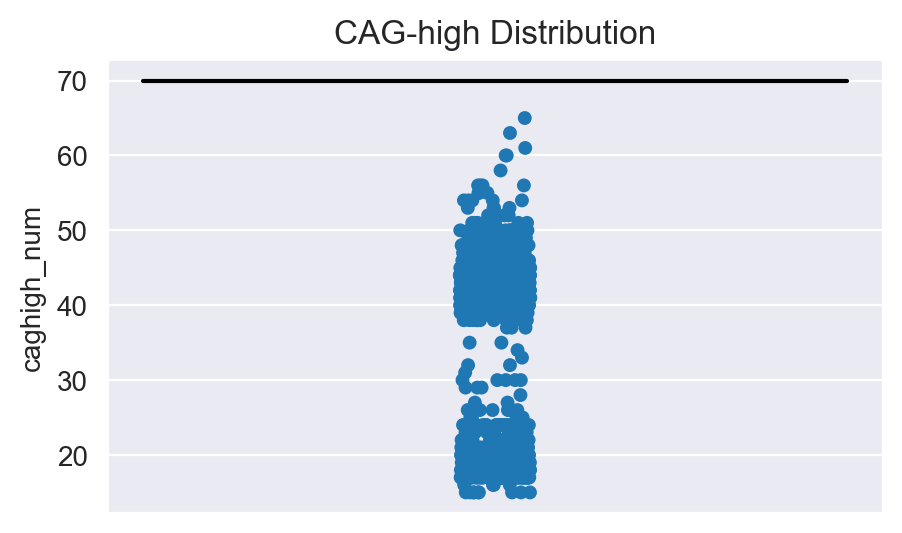

In [138]:
ch, cl = first6_vis['caghigh_num'].value_counts().sort_index(), first6_vis['caglow_num'].value_counts().sort_index()
display(cl, ch)

fig, ax1 = plt.subplots(figsize=[5, 3], dpi=200)
sns.stripplot(y=first6_vis['caghigh_num'], ax=ax1)
proj.plot_line(x=[-1, 1], y=[70, 70], color='black', axis=ax1)
plt.setp(ax1, title='CAG-high Distribution', )

#### TIME TAKEN PER PARTICIPANT FOR FIRST 6 VISITS

In [139]:
cols = ['subjid', 'seq', 'visdy']
display(vis6_main_df[cols])
vis6_yr = (vis6_main_df[cols[0::2]].groupby(cols[0]).sum()/5/365.167).round(1).reset_index().rename(columns={'visdy':'vis6_yr'})
overall_avg_time = vis6_yr['vis6_yr'].mean().round(1), vis6_yr['vis6_yr'].std().round(1)
display(overall_avg_time, vis6_yr)

subjid  seq  visdy
0     R000024542    1      0
1     R000024542    2    371
2     R000024542    3    734
3     R000024542    4   1098
4     R000024542    5   1469
...          ...  ...    ...
8267  R99871078X    2    288
8268  R99871078X    3    721
8269  R99871078X    4   1057
8270  R99871078X    5   1458
8271  R99871078X    6   1879

[8272 rows x 3 columns]

(3.4, 0.7)

subjid  vis6_yr
0     R000024542      3.1
1     R00010372X      3.0
2     R000458994      3.1
3     R001225384      3.3
4     R00170741X      4.1
...          ...      ...
1310  R994514445      3.4
1311  R995458444      2.9
1312  R996811185      3.0
1313  R996853063      3.0
1314  R99871078X      3.0

[1315 rows x 2 columns]

### BMI & BMI_diff

In [140]:
display(len(control),
        len(manifest),
        len(control) + len(manifest))

320

546

866

#### Mean

In [141]:
cols = proj.get_columns_with_pattern(control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

avg_bmi = proj.replace_value_with(pd.merge(ctl_avg, mnf_avg, on=['variable']), 
                                  replacement_guide={-999:0})
avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.4          6.6            0.4
1  bmi_vis_6         29.8          6.9            0.4

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          25.8           5.2             0.2
1  bmi_vis_6          25.4           5.4             0.2

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.4          6.6            0.4          25.8   
1  bmi_vis_6         29.8          6.9            0.4          25.4   

   manifest_std  manifest_sterr visit  
0           5.2             0.2     1  
1           5.4             0.2     6

seq       hd_status0   bmi
21       1  4. genotype -ve  34.5
22       2  4. genotype -ve  36.8
34       1  4. genotype -ve  30.0
60       1  4. genotype -ve  30.5
89       1  4. genotype -ve  22.5
...    ...              ...   ...
54965    1  4. genotype -ve  22.2
54989    1  4. genotype -ve  30.1
54990    1  4. genotype -ve  23.4
54991    2  4. genotype -ve  21.9
54992    3  4. genotype -ve  21.9

[6685 rows x 3 columns]

[Text(0.5, 0, 'visit'),
 Text(0, 0.5, 'average BMI'),
 Text(0.5, 1.0, 'Average BMI'),
 Text(0.5, 0, 'visit'),
 Text(0, 0.5, 'average BMI'),
 Text(0.5, 1.0, 'Average BMI')]

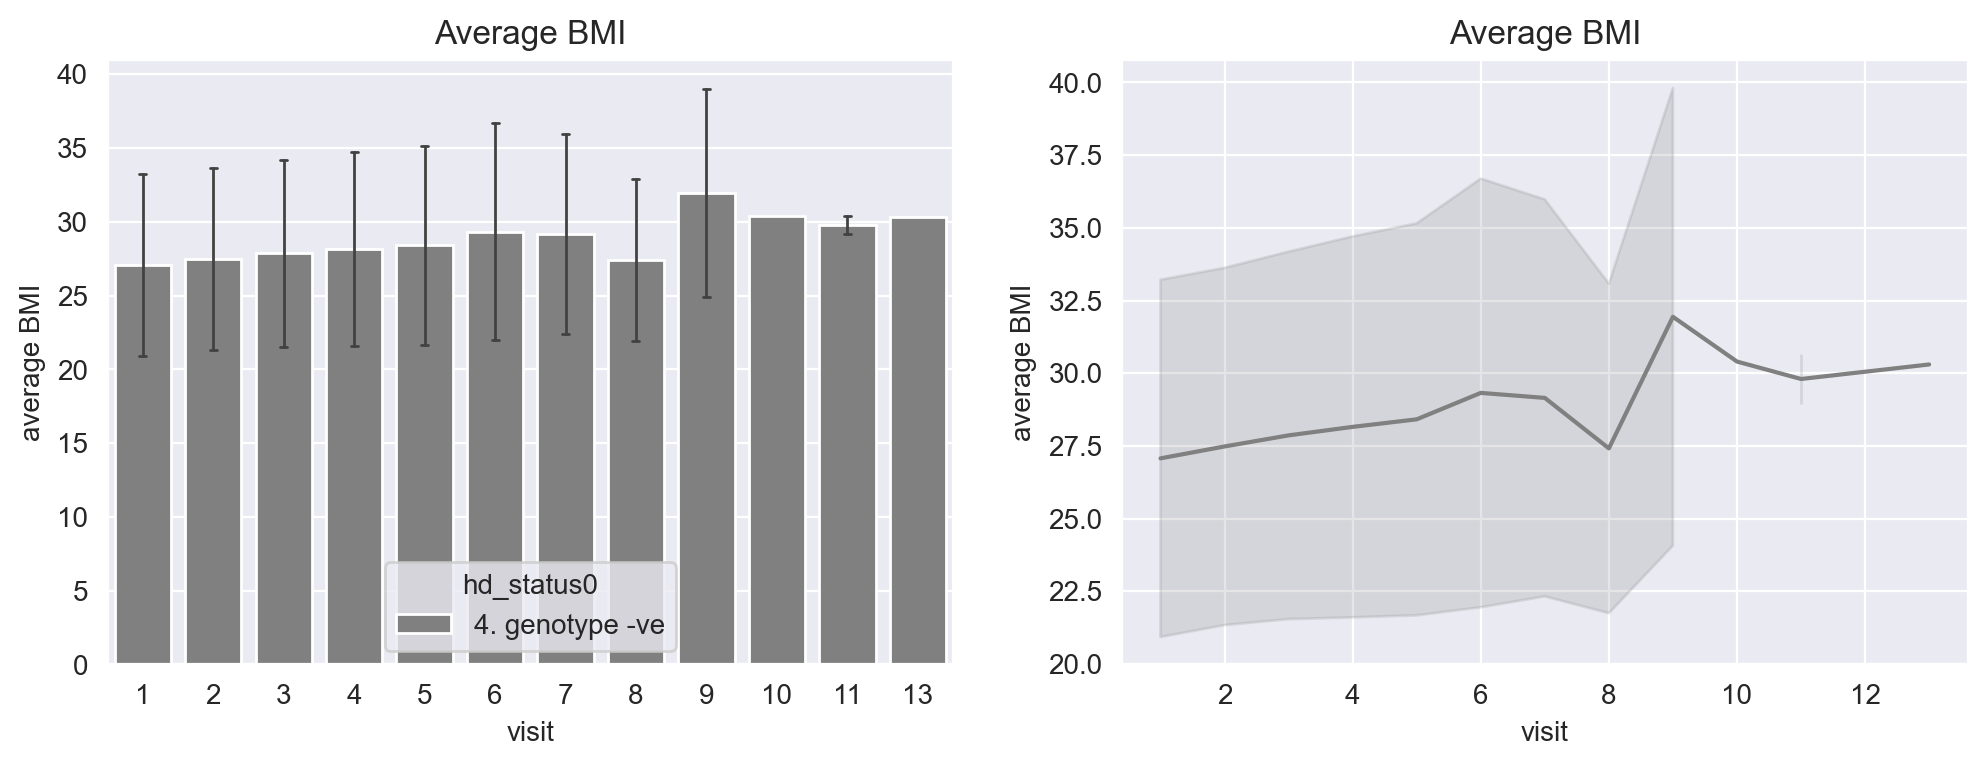

In [142]:
cols = ['seq', 'hd_status0', 'bmi']
cond = (main_df['hd_status0'].isin(['4. genotype -ve', 'manifest']))
df = main_df.loc[cond, cols]
display(df)

fig, (l, r) = plt.subplots(1, 2)
sns.barplot(data=df, x='seq', y='bmi', hue='hd_status0', palette=proj.hd_status_cmap, 
            ci='sd', capsize=0.1, errwidth=1, ax=l)
sns.lineplot(data=df, x='seq', y='bmi', hue='hd_status0', palette=proj.hd_status_cmap, 
             ci='sd', legend=False, ax=r)
plt.setp(fig, size_inches=[12, 4], dpi=200)
plt.setp([l, r], xlabel='visit', ylabel='average BMI', title='Average BMI')

In [143]:
# cols = ['control_avg', 'manifest_avg']
# scaler = s_prep.MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(rlshp[cols]), columns=cols)
# y = rlshp['visit']
# display(X, y)
# corrn = proj.corr_with_pearson(X, y, True)
# display(corrn)

In [144]:
# proj.plot_diff(left_side=avg_bm['control_avg'], right_side=avg_bm['manifest_avg'], 
#                common_catgs=avg_bm['variable'], precision=1, left_legend='control', right_legend='manifest',
#               plot_title='Average BMI', left_labe_shift=5.5, right_labe_shift=3,
#                lv_labe_shift=-2, rv_labe_shift=2, xlim=[-10, 5])

# proj.report_a_significance(X1_set=avg_bm['control_avg'], X2_set=avg_bm['manifest_avg'],
#                            X1_name='control average BMI', X2_name='manifest average BMI')

#### Gender Effect

In [145]:
# male participants
cols = proj.get_columns_with_pattern(male_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(male_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(male_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

male_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
male_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(male_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.5          5.5            0.5
1  bmi_vis_6         30.0          5.5            0.5

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          26.1           4.4             0.3
1  bmi_vis_6          25.4           4.7             0.3

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.5          5.5            0.5          26.1   
1  bmi_vis_6         30.0          5.5            0.5          25.4   

   manifest_std  manifest_sterr visit  
0           4.4             0.3     1  
1           4.7             0.3     6

In [146]:
# female participants
cols = proj.get_columns_with_pattern(female_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(female_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(female_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

female_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
female_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(female_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.3          7.2            0.5
1  bmi_vis_6         29.6          7.5            0.5

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          25.5           5.9             0.4
1  bmi_vis_6          25.3           6.1             0.4

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.3          7.2            0.5          25.5   
1  bmi_vis_6         29.6          7.5            0.5          25.3   

   manifest_std  manifest_sterr visit  
0           5.9             0.4     1  
1           6.1             0.4     6

{'variable': 'darkblue',
 'control_avg': 'green',
 'control_std': 'green',
 'control_sterr': 'green',
 'manifest_avg': 'darkblue',
 'manifest_std': 'darkblue',
 'manifest_sterr': 'darkblue',
 'visit': 'darkblue'}

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female Average BMI per Visit'}, xlabel='Visit', ylabel='Average BMI'>

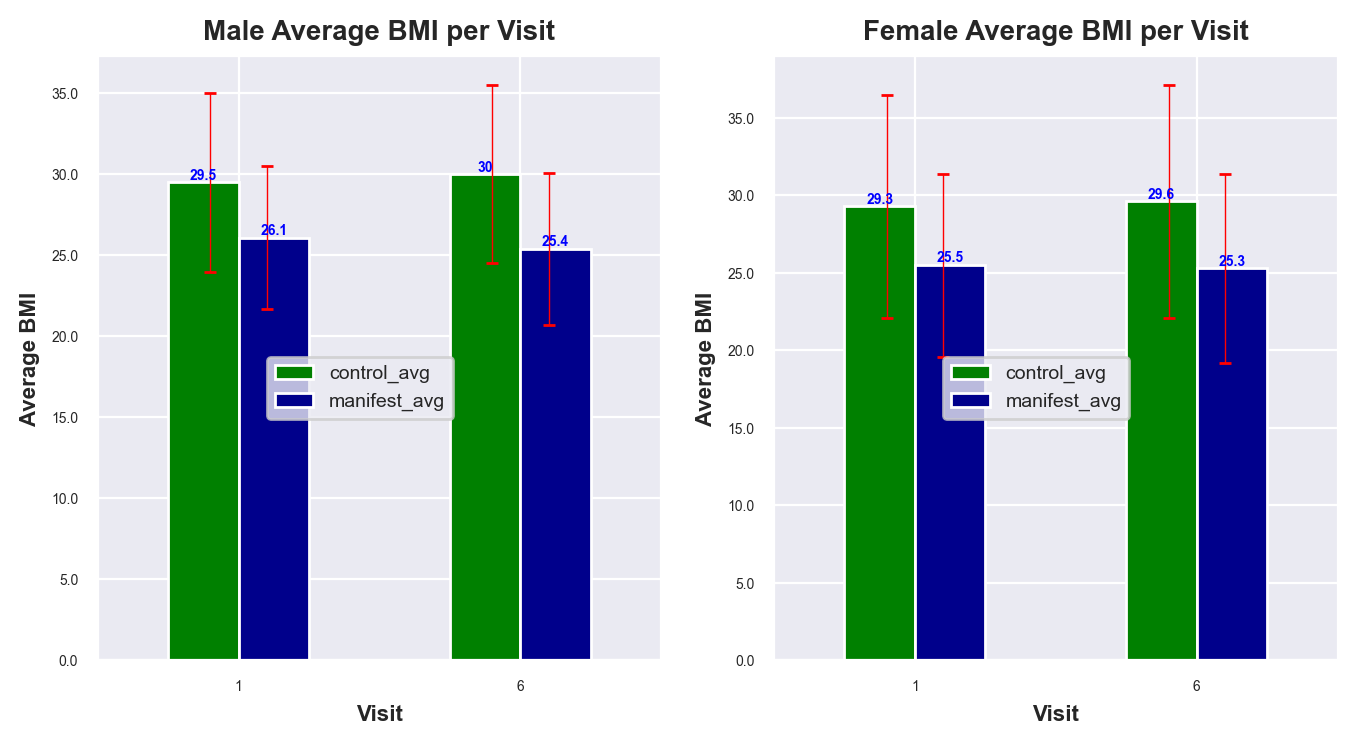

In [147]:
cols = ['visit', 'control_avg', 'manifest_avg']
color_map = {col:'green' if 'control' in col else 'darkblue' for col in male_avg_bmi.columns}
display(color_map)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
male_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=l)
proj.adjust_axis(l, plot_title='Male Average BMI per Visit', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(male_avg_bmi['visit'], male_avg_bmi['control_avg'], male_avg_bmi['control_std'], 
                    axis=l, errbar_color='red')
proj.plot_errorbars(male_avg_bmi['visit'], male_avg_bmi['manifest_avg'], male_avg_bmi['manifest_std'],
                    axis=l, shift=True, errbar_color='red')

female_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=r)
proj.adjust_axis(r, plot_title='Female Average BMI per Visit', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(female_avg_bmi['visit'], female_avg_bmi['control_avg'], female_avg_bmi['control_std'], 
                    axis=r, errbar_color='red')
proj.plot_errorbars(female_avg_bmi['visit'], female_avg_bmi['manifest_avg'], female_avg_bmi['manifest_std'],
                    axis=r, shift=True, errbar_color='red')

### Clinical Characteristics

#### CCMTR

In [148]:
cols = 'ccmtrage'
ccmtr1_control = control.loc[control[cols] == 1]
ccmtr0_control = control.loc[control[cols] == 0]

ccmtr1_manifest = manifest.loc[manifest[cols] == 1]
ccmtr0_manifest = manifest.loc[manifest[cols] == 0]
display(len(ccmtr0_control), len(ccmtr1_control),
       len(ccmtr0_manifest), len(ccmtr1_manifest))

314

0

3

0

In [149]:
# ccmtr1 participants
cols = proj.get_columns_with_pattern(ccmtr1_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(ccmtr1_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(ccmtr1_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

ccmtr1_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
ccmtr1_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ccmtr1_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1          NaN          NaN            NaN
1  bmi_vis_6          NaN          NaN            NaN

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1           NaN           NaN             NaN
1  bmi_vis_6           NaN           NaN             NaN

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1          NaN          NaN            NaN           NaN   
1  bmi_vis_6          NaN          NaN            NaN           NaN   

   manifest_std  manifest_sterr visit  
0           NaN             NaN     1  
1           NaN             NaN     6

In [150]:
# ccmtr0 participants
cols = proj.get_columns_with_pattern(ccmtr0_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(ccmtr0_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(ccmtr0_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

ccmtr0_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
ccmtr0_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ccmtr0_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.4          6.7            0.4
1  bmi_vis_6         29.8          6.9            0.4

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          24.1           2.5             1.4
1  bmi_vis_6          22.7           1.4             0.8

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.4          6.7            0.4          24.1   
1  bmi_vis_6         29.8          6.9            0.4          22.7   

   manifest_std  manifest_sterr visit  
0           2.5             1.4     1  
1           1.4             0.8     6

{'variable': 'darkblue',
 'control_avg': 'green',
 'control_std': 'green',
 'control_sterr': 'green',
 'manifest_avg': 'darkblue',
 'manifest_std': 'darkblue',
 'manifest_sterr': 'darkblue',
 'visit': 'darkblue'}

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
C:\Users\welcome\venv\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\welcome\venv\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Average BMI per Visit (Unimpaired Motor)'}, xlabel='Visit', ylabel='Average BMI'>

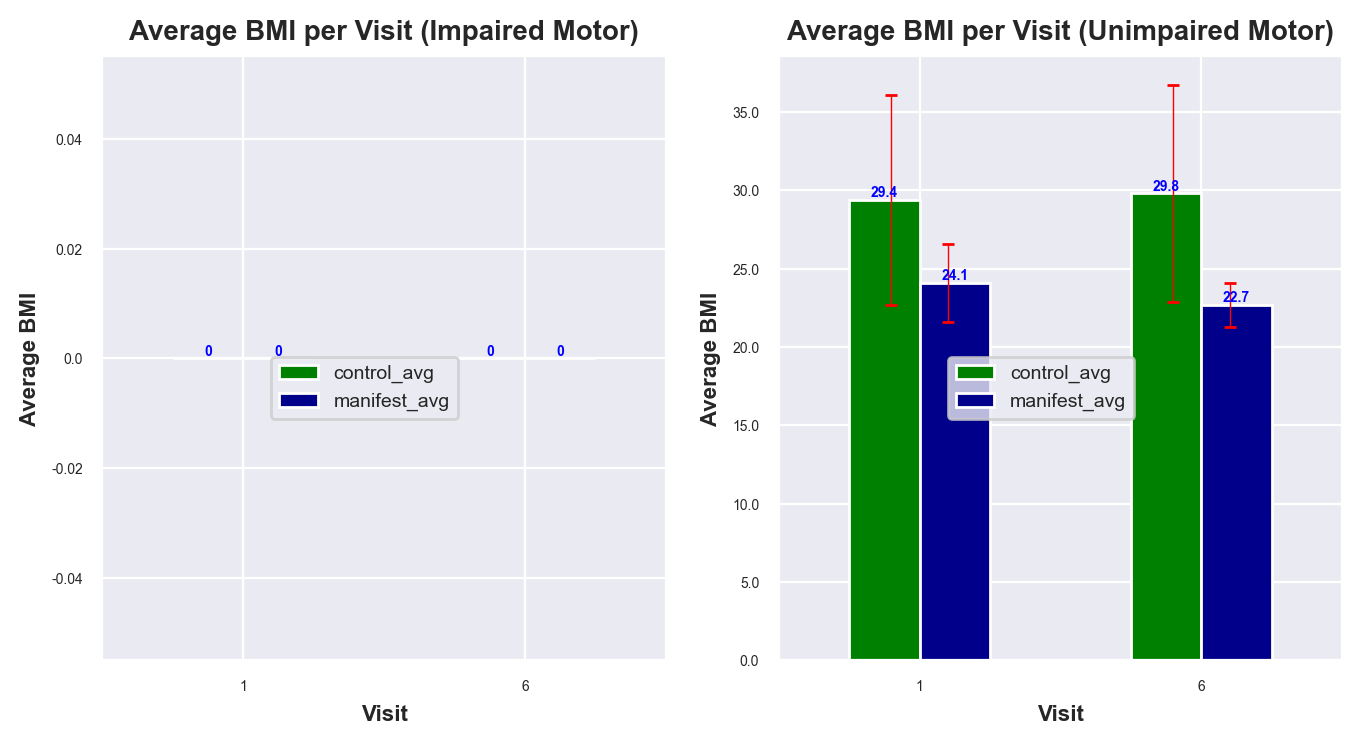

In [151]:
cols = ['visit', 'control_avg', 'manifest_avg']
color_map = {col:'green' if 'control' in col else 'darkblue' for col in ccmtr1_avg_bmi.columns}
display(color_map)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
ccmtr1_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=l)
proj.adjust_axis(l, plot_title='Average BMI per Visit (Impaired Motor)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(ccmtr1_avg_bmi['visit'], ccmtr1_avg_bmi['control_avg'], ccmtr1_avg_bmi['control_std'], 
                    axis=l, errbar_color='red')
proj.plot_errorbars(ccmtr1_avg_bmi['visit'], ccmtr1_avg_bmi['manifest_avg'], ccmtr1_avg_bmi['manifest_std'],
                    axis=l, shift=True, errbar_color='red')

ccmtr0_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=r)
proj.adjust_axis(r, plot_title='Average BMI per Visit (Unimpaired Motor)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(ccmtr0_avg_bmi['visit'], ccmtr0_avg_bmi['control_avg'], ccmtr0_avg_bmi['control_std'], 
                    axis=r, errbar_color='red')
proj.plot_errorbars(ccmtr0_avg_bmi['visit'], ccmtr0_avg_bmi['manifest_avg'], ccmtr0_avg_bmi['manifest_std'],
                    axis=r, shift=True, errbar_color='red')

#### CCCOG

In [152]:
cols = 'cccog'
cccog1_control = control.loc[control[cols] == 1]
cccog0_control = control.loc[control[cols] == 0]

cccog1_manifest = manifest.loc[manifest[cols] == 1]
cccog0_manifest = manifest.loc[manifest[cols] == 0]
display(len(cccog0_control), len(cccog1_control),
       len(cccog0_manifest), len(cccog1_manifest))

319

1

190

356

In [153]:
# cccog1 participants
cols = proj.get_columns_with_pattern(cccog1_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(cccog1_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(cccog1_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

cccog1_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
cccog1_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(cccog1_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         25.6          NaN            NaN
1  bmi_vis_6         26.5          NaN            NaN

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          25.9           5.1             0.3
1  bmi_vis_6          25.5           5.2             0.3

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         25.6          NaN            NaN          25.9   
1  bmi_vis_6         26.5          NaN            NaN          25.5   

   manifest_std  manifest_sterr visit  
0           5.1             0.3     1  
1           5.2             0.3     6

In [154]:
# cccog0 participants
cols = proj.get_columns_with_pattern(cccog0_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(cccog0_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(cccog0_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

cccog0_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
cccog0_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(cccog0_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.4          6.7            0.4
1  bmi_vis_6         29.8          6.9            0.4

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          25.6           5.4             0.4
1  bmi_vis_6          25.0           5.8             0.4

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.4          6.7            0.4          25.6   
1  bmi_vis_6         29.8          6.9            0.4          25.0   

   manifest_std  manifest_sterr visit  
0           5.4             0.4     1  
1           5.8             0.4     6

{'variable': 'darkblue',
 'control_avg': 'green',
 'control_std': 'green',
 'control_sterr': 'green',
 'manifest_avg': 'darkblue',
 'manifest_std': 'darkblue',
 'manifest_sterr': 'darkblue',
 'visit': 'darkblue'}

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
C:\Users\welcome\venv\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Average BMI per Visit (Unimpaired Cognition)'}, xlabel='Visit', ylabel='Average BMI'>

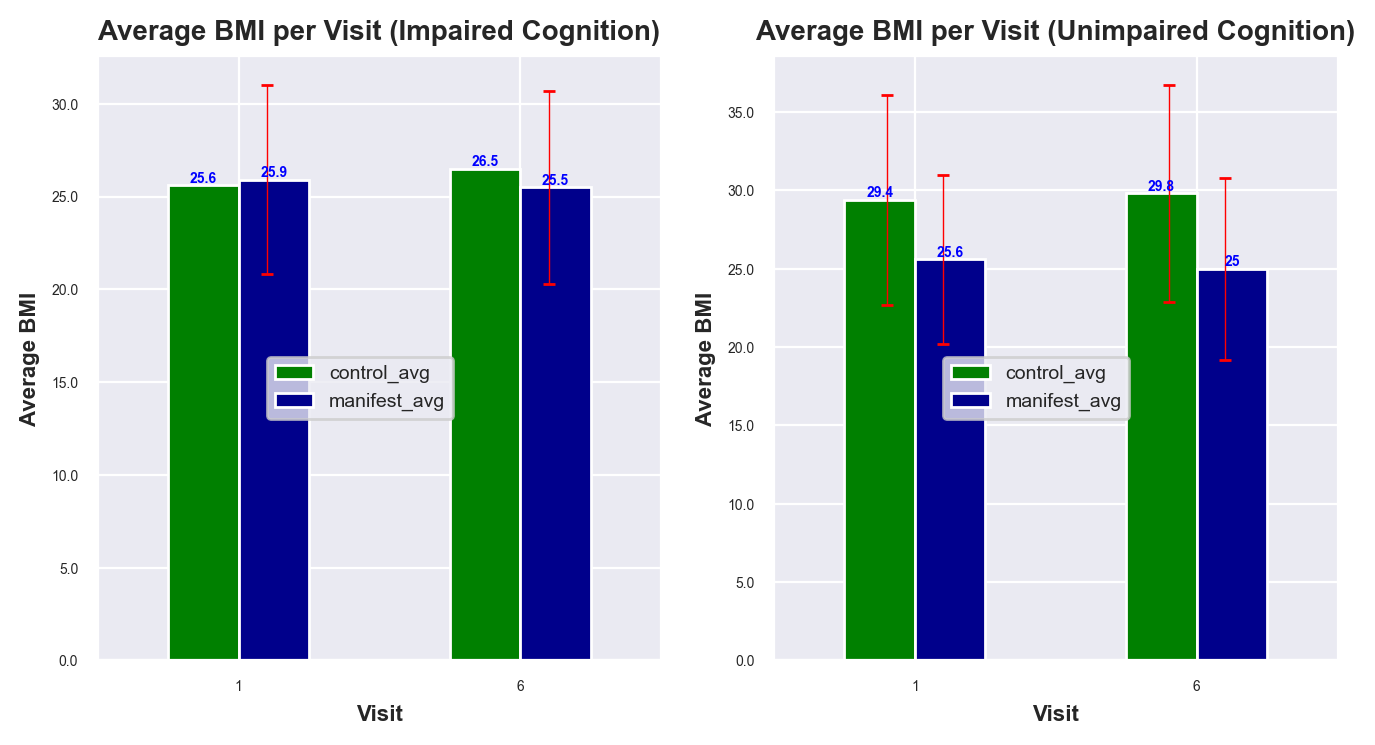

In [155]:
cols = ['visit', 'control_avg', 'manifest_avg']
color_map = {col:'green' if 'control' in col else 'darkblue' for col in cccog1_avg_bmi.columns}
display(color_map)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
cccog1_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=l)
proj.adjust_axis(l, plot_title='Average BMI per Visit (Impaired Cognition)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(cccog1_avg_bmi['visit'], cccog1_avg_bmi['control_avg'], cccog1_avg_bmi['control_std'], 
                    axis=l, errbar_color='red')
proj.plot_errorbars(cccog1_avg_bmi['visit'], cccog1_avg_bmi['manifest_avg'], cccog1_avg_bmi['manifest_std'],
                    axis=l, shift=True, errbar_color='red')

cccog0_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=r)
proj.adjust_axis(r, plot_title='Average BMI per Visit (Unimpaired Cognition)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(cccog0_avg_bmi['visit'], cccog0_avg_bmi['control_avg'], cccog0_avg_bmi['control_std'], 
                    axis=r, errbar_color='red')
proj.plot_errorbars(cccog0_avg_bmi['visit'], cccog0_avg_bmi['manifest_avg'], cccog0_avg_bmi['manifest_std'],
                    axis=r, shift=True, errbar_color='red')

#### CCDEP

In [156]:
cols = 'ccdep'
ccdep1_control = control.loc[control[cols] == 1]
ccdep0_control = control.loc[control[cols] == 0]

ccdep1_manifest = manifest.loc[manifest[cols] == 1]
ccdep0_manifest = manifest.loc[manifest[cols] == 0]
display(len(ccdep0_control), len(ccdep1_control),
       len(ccdep0_manifest), len(ccdep1_manifest))

81

239

115

431

In [157]:
# ccdep1 participants
cols = proj.get_columns_with_pattern(ccdep1_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(ccdep1_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(ccdep1_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

ccdep1_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
ccdep1_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ccdep1_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.3          6.2            0.4
1  bmi_vis_6         29.6          6.4            0.4

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          26.3           5.3             0.3
1  bmi_vis_6          25.8           5.6             0.3

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.3          6.2            0.4          26.3   
1  bmi_vis_6         29.6          6.4            0.4          25.8   

   manifest_std  manifest_sterr visit  
0           5.3             0.3     1  
1           5.6             0.3     6

In [158]:
# ccdep0 participants
cols = proj.get_columns_with_pattern(ccdep0_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(ccdep0_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(ccdep0_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

ccdep0_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
ccdep0_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ccdep0_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.7          7.8            0.9
1  bmi_vis_6         30.3          8.2            0.9

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          24.1           4.2             0.4
1  bmi_vis_6          23.6           4.3             0.4

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.7          7.8            0.9          24.1   
1  bmi_vis_6         30.3          8.2            0.9          23.6   

   manifest_std  manifest_sterr visit  
0           4.2             0.4     1  
1           4.3             0.4     6

{'variable': 'darkblue',
 'control_avg': 'green',
 'control_std': 'green',
 'control_sterr': 'green',
 'manifest_avg': 'darkblue',
 'manifest_std': 'darkblue',
 'manifest_sterr': 'darkblue',
 'visit': 'darkblue'}

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Average BMI per Visit (Not Depressed)'}, xlabel='Visit', ylabel='Average BMI'>

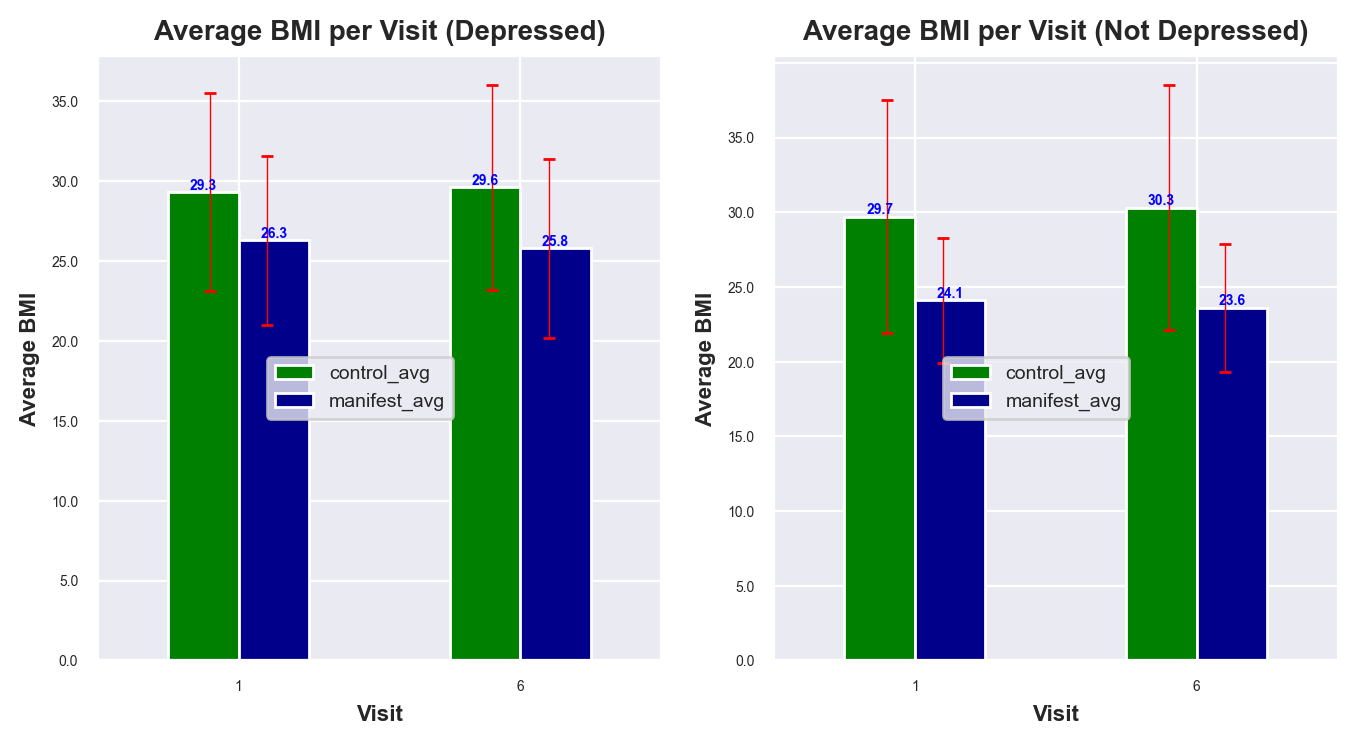

In [159]:
cols = ['visit', 'control_avg', 'manifest_avg']
color_map = {col:'green' if 'control' in col else 'darkblue' for col in ccdep1_avg_bmi.columns}
display(color_map)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
ccdep1_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=l)
proj.adjust_axis(l, plot_title='Average BMI per Visit (Depressed)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(ccdep1_avg_bmi['visit'], ccdep1_avg_bmi['control_avg'], ccdep1_avg_bmi['control_std'], 
                    axis=l, errbar_color='red')
proj.plot_errorbars(ccdep1_avg_bmi['visit'], ccdep1_avg_bmi['manifest_avg'], ccdep1_avg_bmi['manifest_std'],
                    axis=l, shift=True, errbar_color='red')

ccdep0_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=r)
proj.adjust_axis(r, plot_title='Average BMI per Visit (Not Depressed)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(ccdep0_avg_bmi['visit'], ccdep0_avg_bmi['control_avg'], ccdep0_avg_bmi['control_std'], 
                    axis=r, errbar_color='red')
proj.plot_errorbars(ccdep0_avg_bmi['visit'], ccdep0_avg_bmi['manifest_avg'], ccdep0_avg_bmi['manifest_std'],
                    axis=r, shift=True, errbar_color='red')

#### CCAPT

In [160]:
cols = 'ccapt'
ccapt1_control = control.loc[control[cols] == 1]
ccapt0_control = control.loc[control[cols] == 0]

ccapt1_manifest = manifest.loc[manifest[cols] == 1]
ccapt0_manifest = manifest.loc[manifest[cols] == 0]
display(len(ccapt0_control), len(ccapt1_control),
       len(ccapt0_manifest), len(ccapt1_manifest))

305

15

165

381

In [161]:
# ccapt1 participants
cols = proj.get_columns_with_pattern(ccapt1_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(ccapt1_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(ccapt1_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

ccapt1_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
ccapt1_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ccapt1_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         27.1          4.3            1.1
1  bmi_vis_6         27.7          5.2            1.3

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          26.3           5.4             0.3
1  bmi_vis_6          25.7           5.6             0.3

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         27.1          4.3            1.1          26.3   
1  bmi_vis_6         27.7          5.2            1.3          25.7   

   manifest_std  manifest_sterr visit  
0           5.4             0.3     1  
1           5.6             0.3     6

In [162]:
# ccapt0 participants
cols = proj.get_columns_with_pattern(ccapt0_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(ccapt0_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(ccapt0_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

ccapt0_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
ccapt0_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ccapt0_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         29.5          6.7            0.4
1  bmi_vis_6         29.9          6.9            0.4

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          24.8           4.4             0.3
1  bmi_vis_6          24.5           4.7             0.4

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         29.5          6.7            0.4          24.8   
1  bmi_vis_6         29.9          6.9            0.4          24.5   

   manifest_std  manifest_sterr visit  
0           4.4             0.3     1  
1           4.7             0.4     6

{'variable': 'darkblue',
 'control_avg': 'green',
 'control_std': 'green',
 'control_sterr': 'green',
 'manifest_avg': 'darkblue',
 'manifest_std': 'darkblue',
 'manifest_sterr': 'darkblue',
 'visit': 'darkblue'}

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Average BMI per Visit (Not Apathetic)'}, xlabel='Visit', ylabel='Average BMI'>

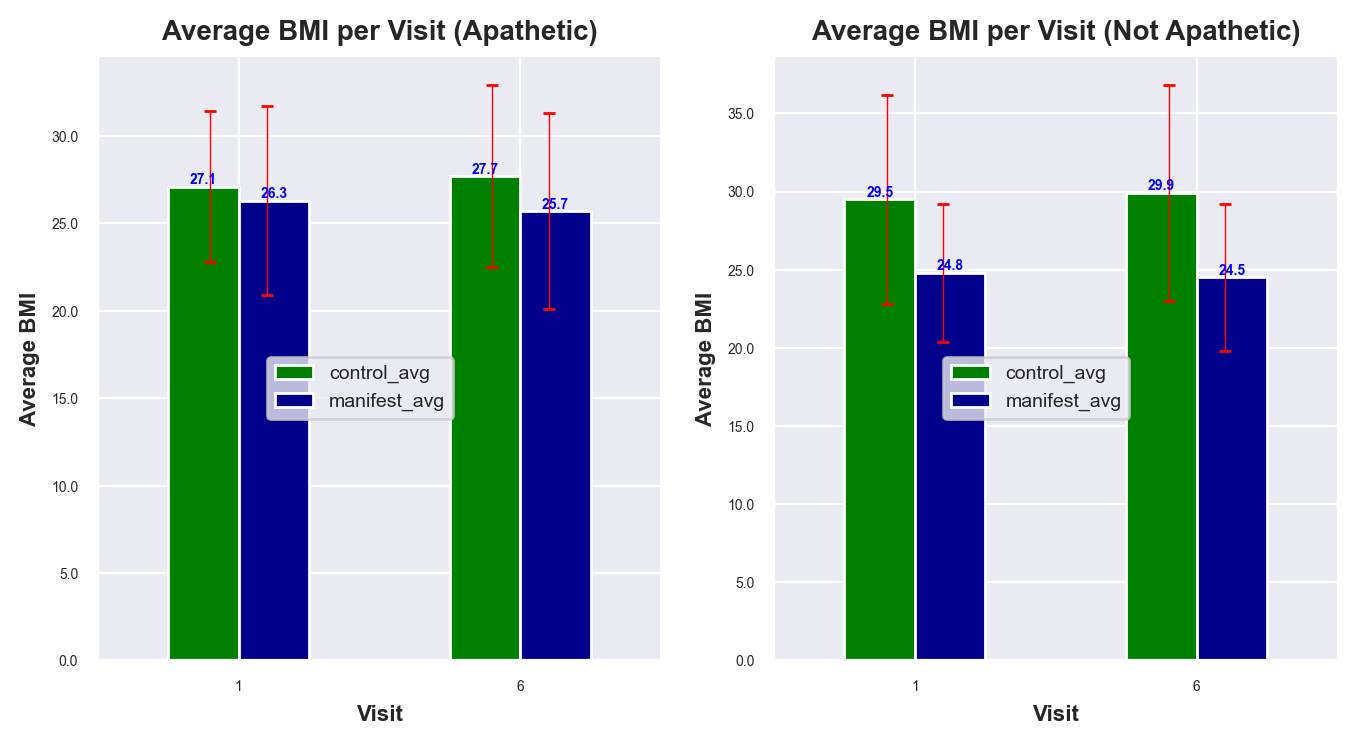

In [163]:
cols = ['visit', 'control_avg', 'manifest_avg']
color_map = {col:'green' if 'control' in col else 'darkblue' for col in ccapt1_avg_bmi.columns}
display(color_map)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
ccapt1_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=l)
proj.adjust_axis(l, plot_title='Average BMI per Visit (Apathetic)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(ccapt1_avg_bmi['visit'], ccapt1_avg_bmi['control_avg'], ccapt1_avg_bmi['control_std'], 
                    axis=l, errbar_color='red')
proj.plot_errorbars(ccapt1_avg_bmi['visit'], ccapt1_avg_bmi['manifest_avg'], ccapt1_avg_bmi['manifest_std'],
                    axis=l, shift=True, errbar_color='red')

ccapt0_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=r)
proj.adjust_axis(r, plot_title='Average BMI per Visit (Not Apathetic)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(ccapt0_avg_bmi['visit'], ccapt0_avg_bmi['control_avg'], ccapt0_avg_bmi['control_std'], 
                    axis=r, errbar_color='red')
proj.plot_errorbars(ccapt0_avg_bmi['visit'], ccapt0_avg_bmi['manifest_avg'], ccapt0_avg_bmi['manifest_std'],
                    axis=r, shift=True, errbar_color='red')

#### BMI CHANGE

In [164]:
cols = 'v1v6_bmi_change'
bmdrop_control = control.loc[control[cols] == '-1. decrease']
bmrise_control = control.loc[control[cols] == '1. increase']
display(len(bmdrop_control), len(bmrise_control))

bmdrop_manifest = manifest.loc[manifest[cols] == '-1. decrease']
bmrise_manifest = manifest.loc[manifest[cols] == '1. increase']
display(len(bmdrop_manifest), len(bmrise_manifest))

128

173

279

228

In [165]:
# bmrise participants
cols = proj.get_columns_with_pattern(bmrise_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(bmrise_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(bmrise_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

bmrise_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
bmrise_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(bmrise_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         28.8          6.1            0.5
1  bmi_vis_6         31.2          7.0            0.5

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          25.0           4.9             0.3
1  bmi_vis_6          27.0           5.4             0.4

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         28.8          6.1            0.5          25.0   
1  bmi_vis_6         31.2          7.0            0.5          27.0   

   manifest_std  manifest_sterr visit  
0           4.9             0.3     1  
1           5.4             0.4     6

In [166]:
# bmdrop participants
cols = proj.get_columns_with_pattern(bmdrop_control, 'bmi_vis').columns

col_rename = {0:'control_avg', 'index':'variable'}
ctl_avg = proj.compute_mean_std_sterr(bmdrop_control[cols], 'control', 1).reset_index().rename(columns=col_rename)

col_rename = {0:'manifest_avg', 'index':'variable'}
mnf_avg = proj.compute_mean_std_sterr(bmdrop_manifest[cols], 'manifest', 1).reset_index().rename(columns=col_rename)

display(ctl_avg, mnf_avg)

bmdrop_avg_bmi = pd.merge(ctl_avg, mnf_avg, on=['variable'])
bmdrop_avg_bmi.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(bmdrop_avg_bmi)

variable  control_avg  control_std  control_sterr
0  bmi_vis_1         30.3          7.2            0.6
1  bmi_vis_6         28.0          6.1            0.5

variable  manifest_avg  manifest_std  manifest_sterr
0  bmi_vis_1          26.4           5.3             0.3
1  bmi_vis_6          23.9           4.9             0.3

variable  control_avg  control_std  control_sterr  manifest_avg  \
0  bmi_vis_1         30.3          7.2            0.6          26.4   
1  bmi_vis_6         28.0          6.1            0.5          23.9   

   manifest_std  manifest_sterr visit  
0           5.3             0.3     1  
1           4.9             0.3     6

{'variable': 'darkblue',
 'control_avg': 'green',
 'control_std': 'green',
 'control_sterr': 'green',
 'manifest_avg': 'darkblue',
 'manifest_std': 'darkblue',
 'manifest_sterr': 'darkblue',
 'visit': 'darkblue'}

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Average BMI per Visit (BMI Decreased)'}, xlabel='Visit', ylabel='Average BMI'>

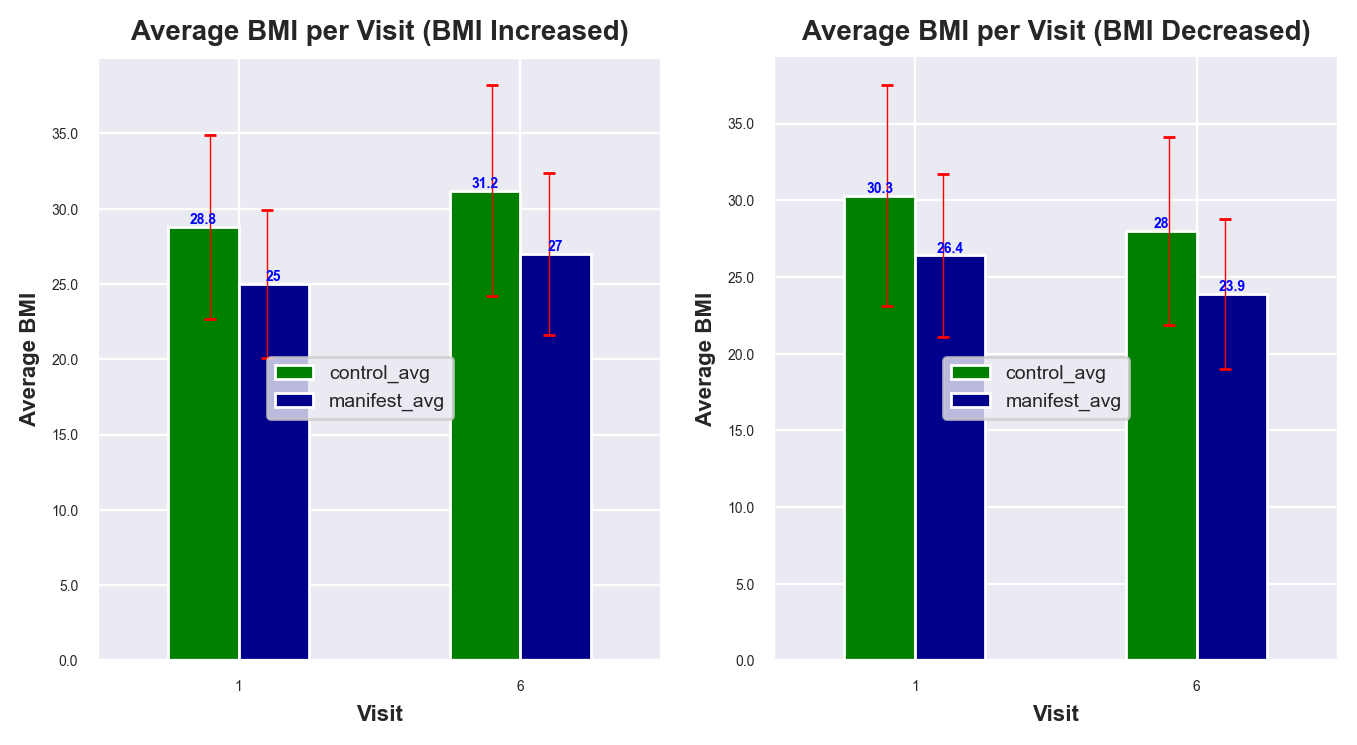

In [167]:
cols = ['visit', 'control_avg', 'manifest_avg']
color_map = {col:'green' if 'control' in col else 'darkblue' for col in bmrise_avg_bmi.columns}
display(color_map)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 4], dpi=200)
bmrise_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=l)
proj.adjust_axis(l, plot_title='Average BMI per Visit (BMI Increased)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(bmrise_avg_bmi['visit'], bmrise_avg_bmi['control_avg'], bmrise_avg_bmi['control_std'], 
                    axis=l, errbar_color='red')
proj.plot_errorbars(bmrise_avg_bmi['visit'], bmrise_avg_bmi['manifest_avg'], bmrise_avg_bmi['manifest_std'],
                    axis=l, shift=True, errbar_color='red')

bmdrop_avg_bmi[cols].plot(kind='bar', x='visit', color=color_map, ax=r)
proj.adjust_axis(r, plot_title='Average BMI per Visit (BMI Decreased)', title_size=10,
                 x_labe='Visit', y_labe='Average BMI', annotate=True, annot_size=5, rotate_xticklabe=False,
                show_legend_at=[0.3, 0.4])
proj.plot_errorbars(bmdrop_avg_bmi['visit'], bmdrop_avg_bmi['control_avg'], bmdrop_avg_bmi['control_std'], 
                    axis=r, errbar_color='red')
proj.plot_errorbars(bmdrop_avg_bmi['visit'], bmdrop_avg_bmi['manifest_avg'], bmdrop_avg_bmi['manifest_std'],
                    axis=r, shift=True, errbar_color='red')

In [168]:
stopt

NameError: name 'stopt' is not defined